## **CSS385 Project 1 - Neural Networks**
> #### PIMA Indian Diabetes Prediction

#### Group Member
*   Ms. Apinya     Sriyota         6322771534

*   Mr. Thanakit   Mettarikanon    6322772045

*   Ms. Isariya    Kerdkla         6322773092

*   Mr. Chanawong  Karoon-ngampun  6322774025

### Import and Load

#### Import neccessary libraries

In [ ]:
from numpy import loadtxt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import pandas as pd
import optuna

#### Prepare data for training

In [ ]:
# download diabetes datasest and its description
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names"

--2023-09-24 13:41:53--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2023-09-24 13:41:53 (34.0 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]

--2023-09-24 13:41:53--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting

#### Load the dataset
**Input Variables (X):**
1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

**Output Variables (y):**
9. Class variable (0 or 1)

In [ ]:
dataset = loadtxt('/content/pima-indians-diabetes.data.csv', delimiter=',')
X = dataset[:, :8]
y = dataset[:, -1]

In [ ]:
column_names = ["Preg", "Glu", "BP", "Skin", "Ins", "BMI", "DPF", "Age"]
df = pd.DataFrame(dataset, columns=column_names+["Outcome"])

### Introduction and data analysis
> ##### Exploratory Data Analysis (EDA)

Which column can be 0?
1. Number of times pregnant ✔️
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test ❌
3. Diastolic blood pressure (mm Hg) ❌
4. Triceps skin fold thickness (mm) ❌
5. 2-hour serum insulin (mu U/ml) ❌
6. Body mass index (weight in kg/(height in m)^2) ❌
7. Diabetes pedigree function ✔️
8. Age (years) ✔️

#### Data Overview

In [ ]:
df.iloc[:,1:6] = df.iloc[:,1:6].replace(0,np.nan)

In [ ]:
df.describe()

Preg         Glu          BP        Skin         Ins         BMI  \
count  768.000000  763.000000  733.000000  541.000000  394.000000  757.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.535641   12.382158   10.476982  118.775855    6.924988   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   64.000000   22.000000   76.250000   27.500000   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      6.000000  141.000000   80.000000   36.000000  190.000000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              DPF         Age     Outcome  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

#### Visualizations

##### Column Analysis

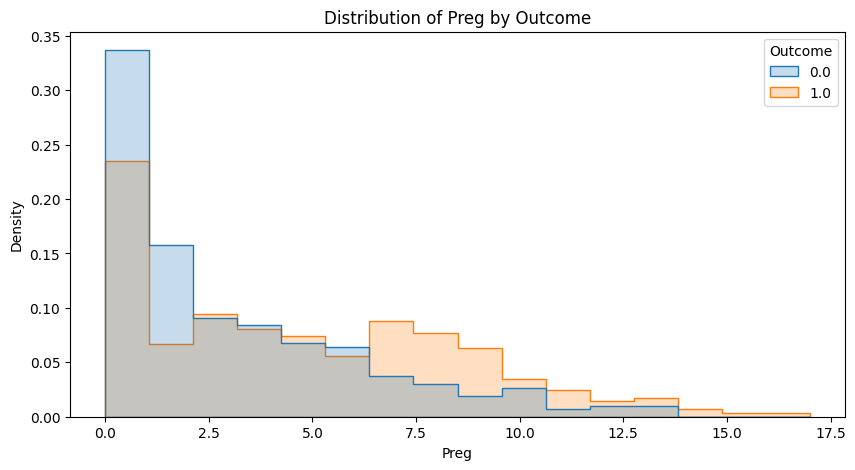

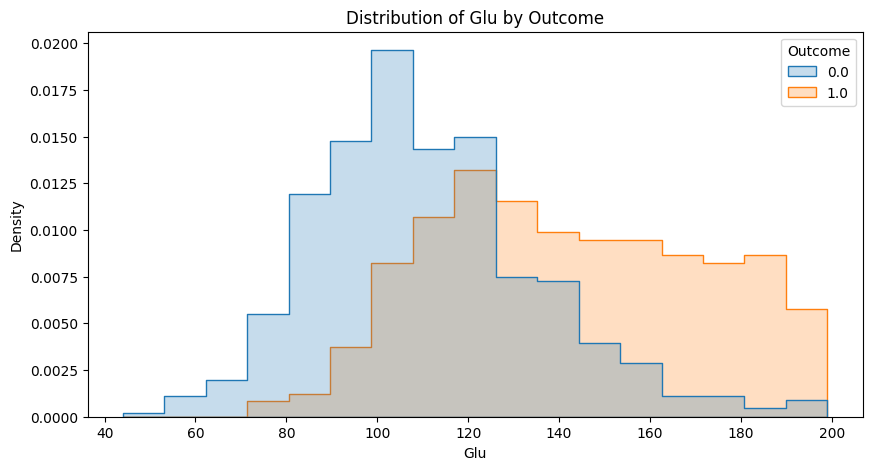

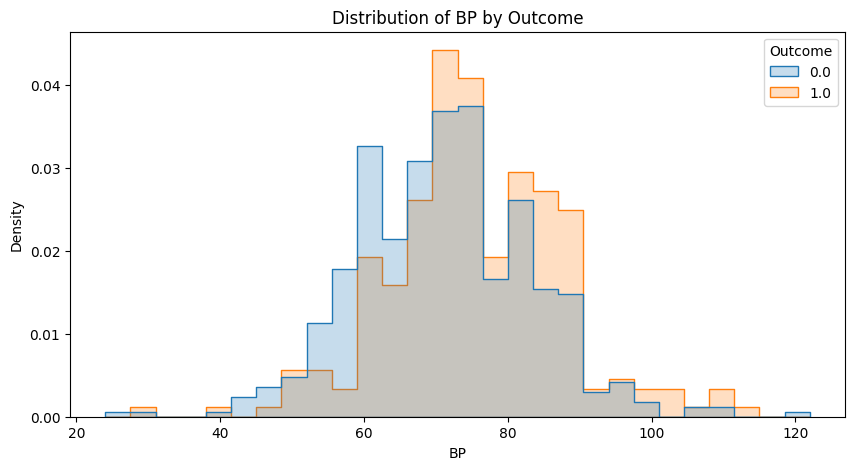

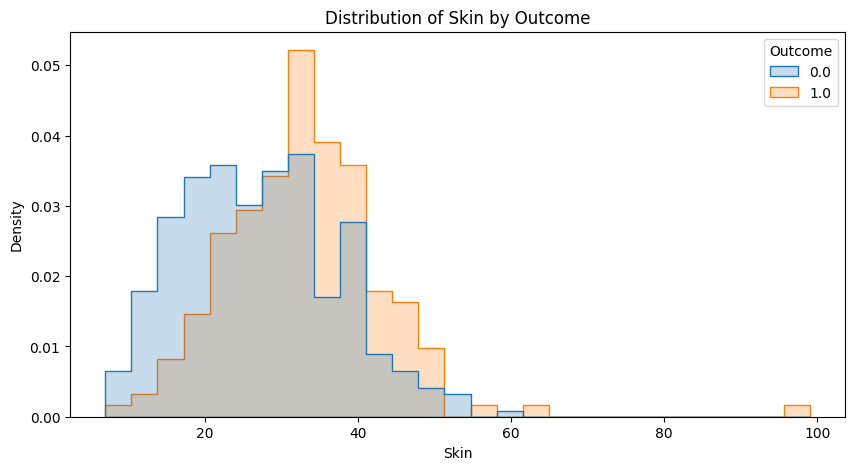

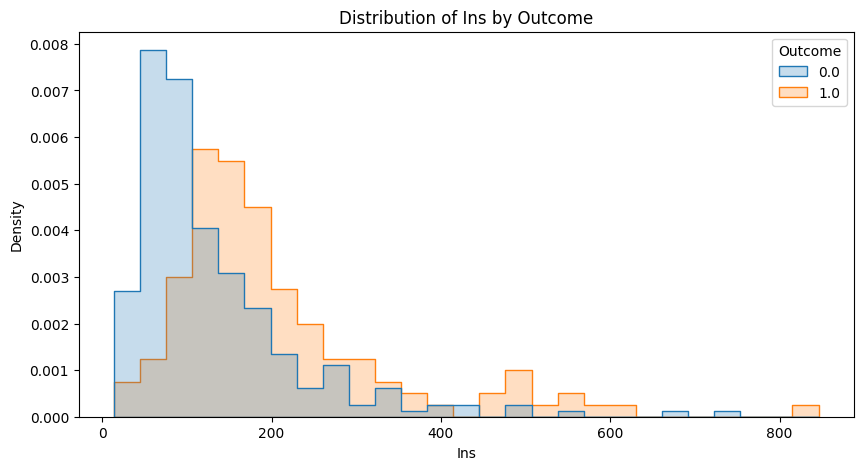

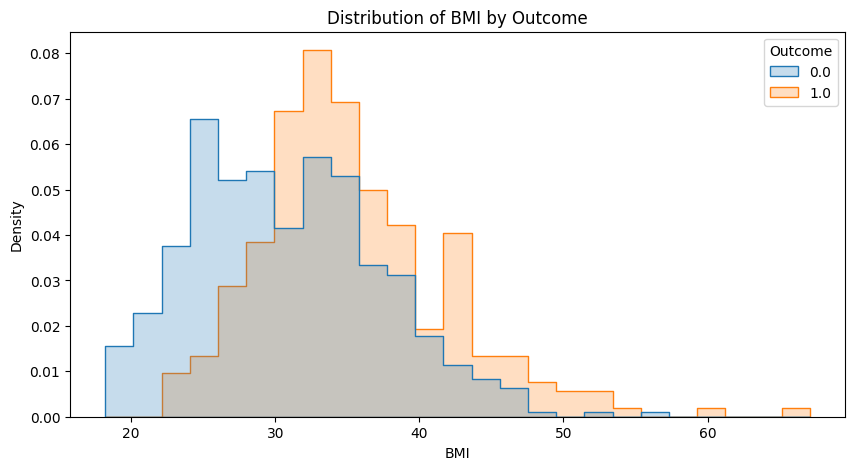

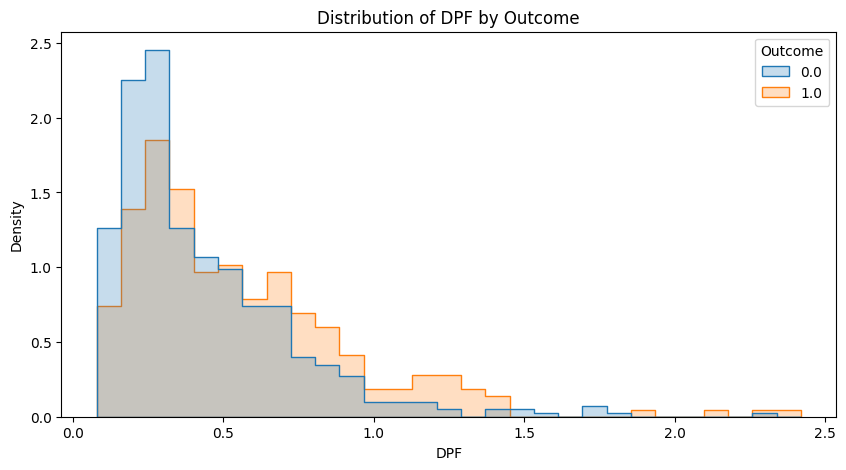

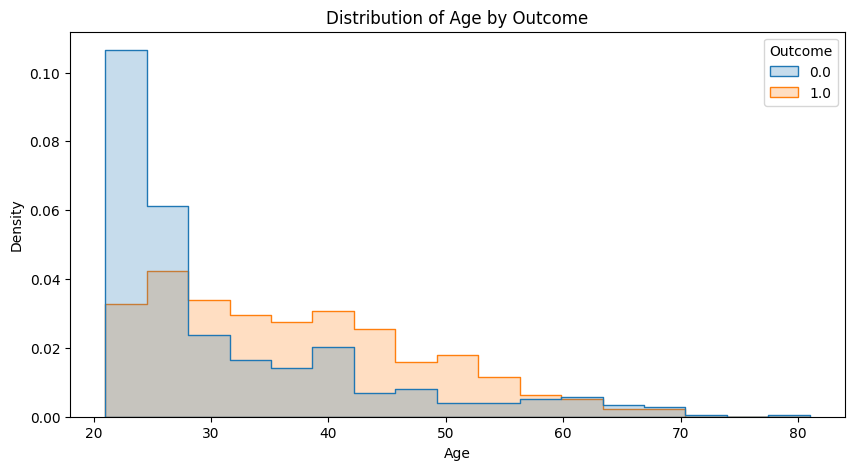

In [ ]:
for column in column_names:
    plt.figure(figsize=(10, 5))
    sns.histplot(df, x=column, hue='Outcome', element='step', stat="density", common_norm=False)
    plt.title(f'Distribution of {column} by Outcome')
    plt.show()

##### Multicollinearity Detection

##### Pairplot

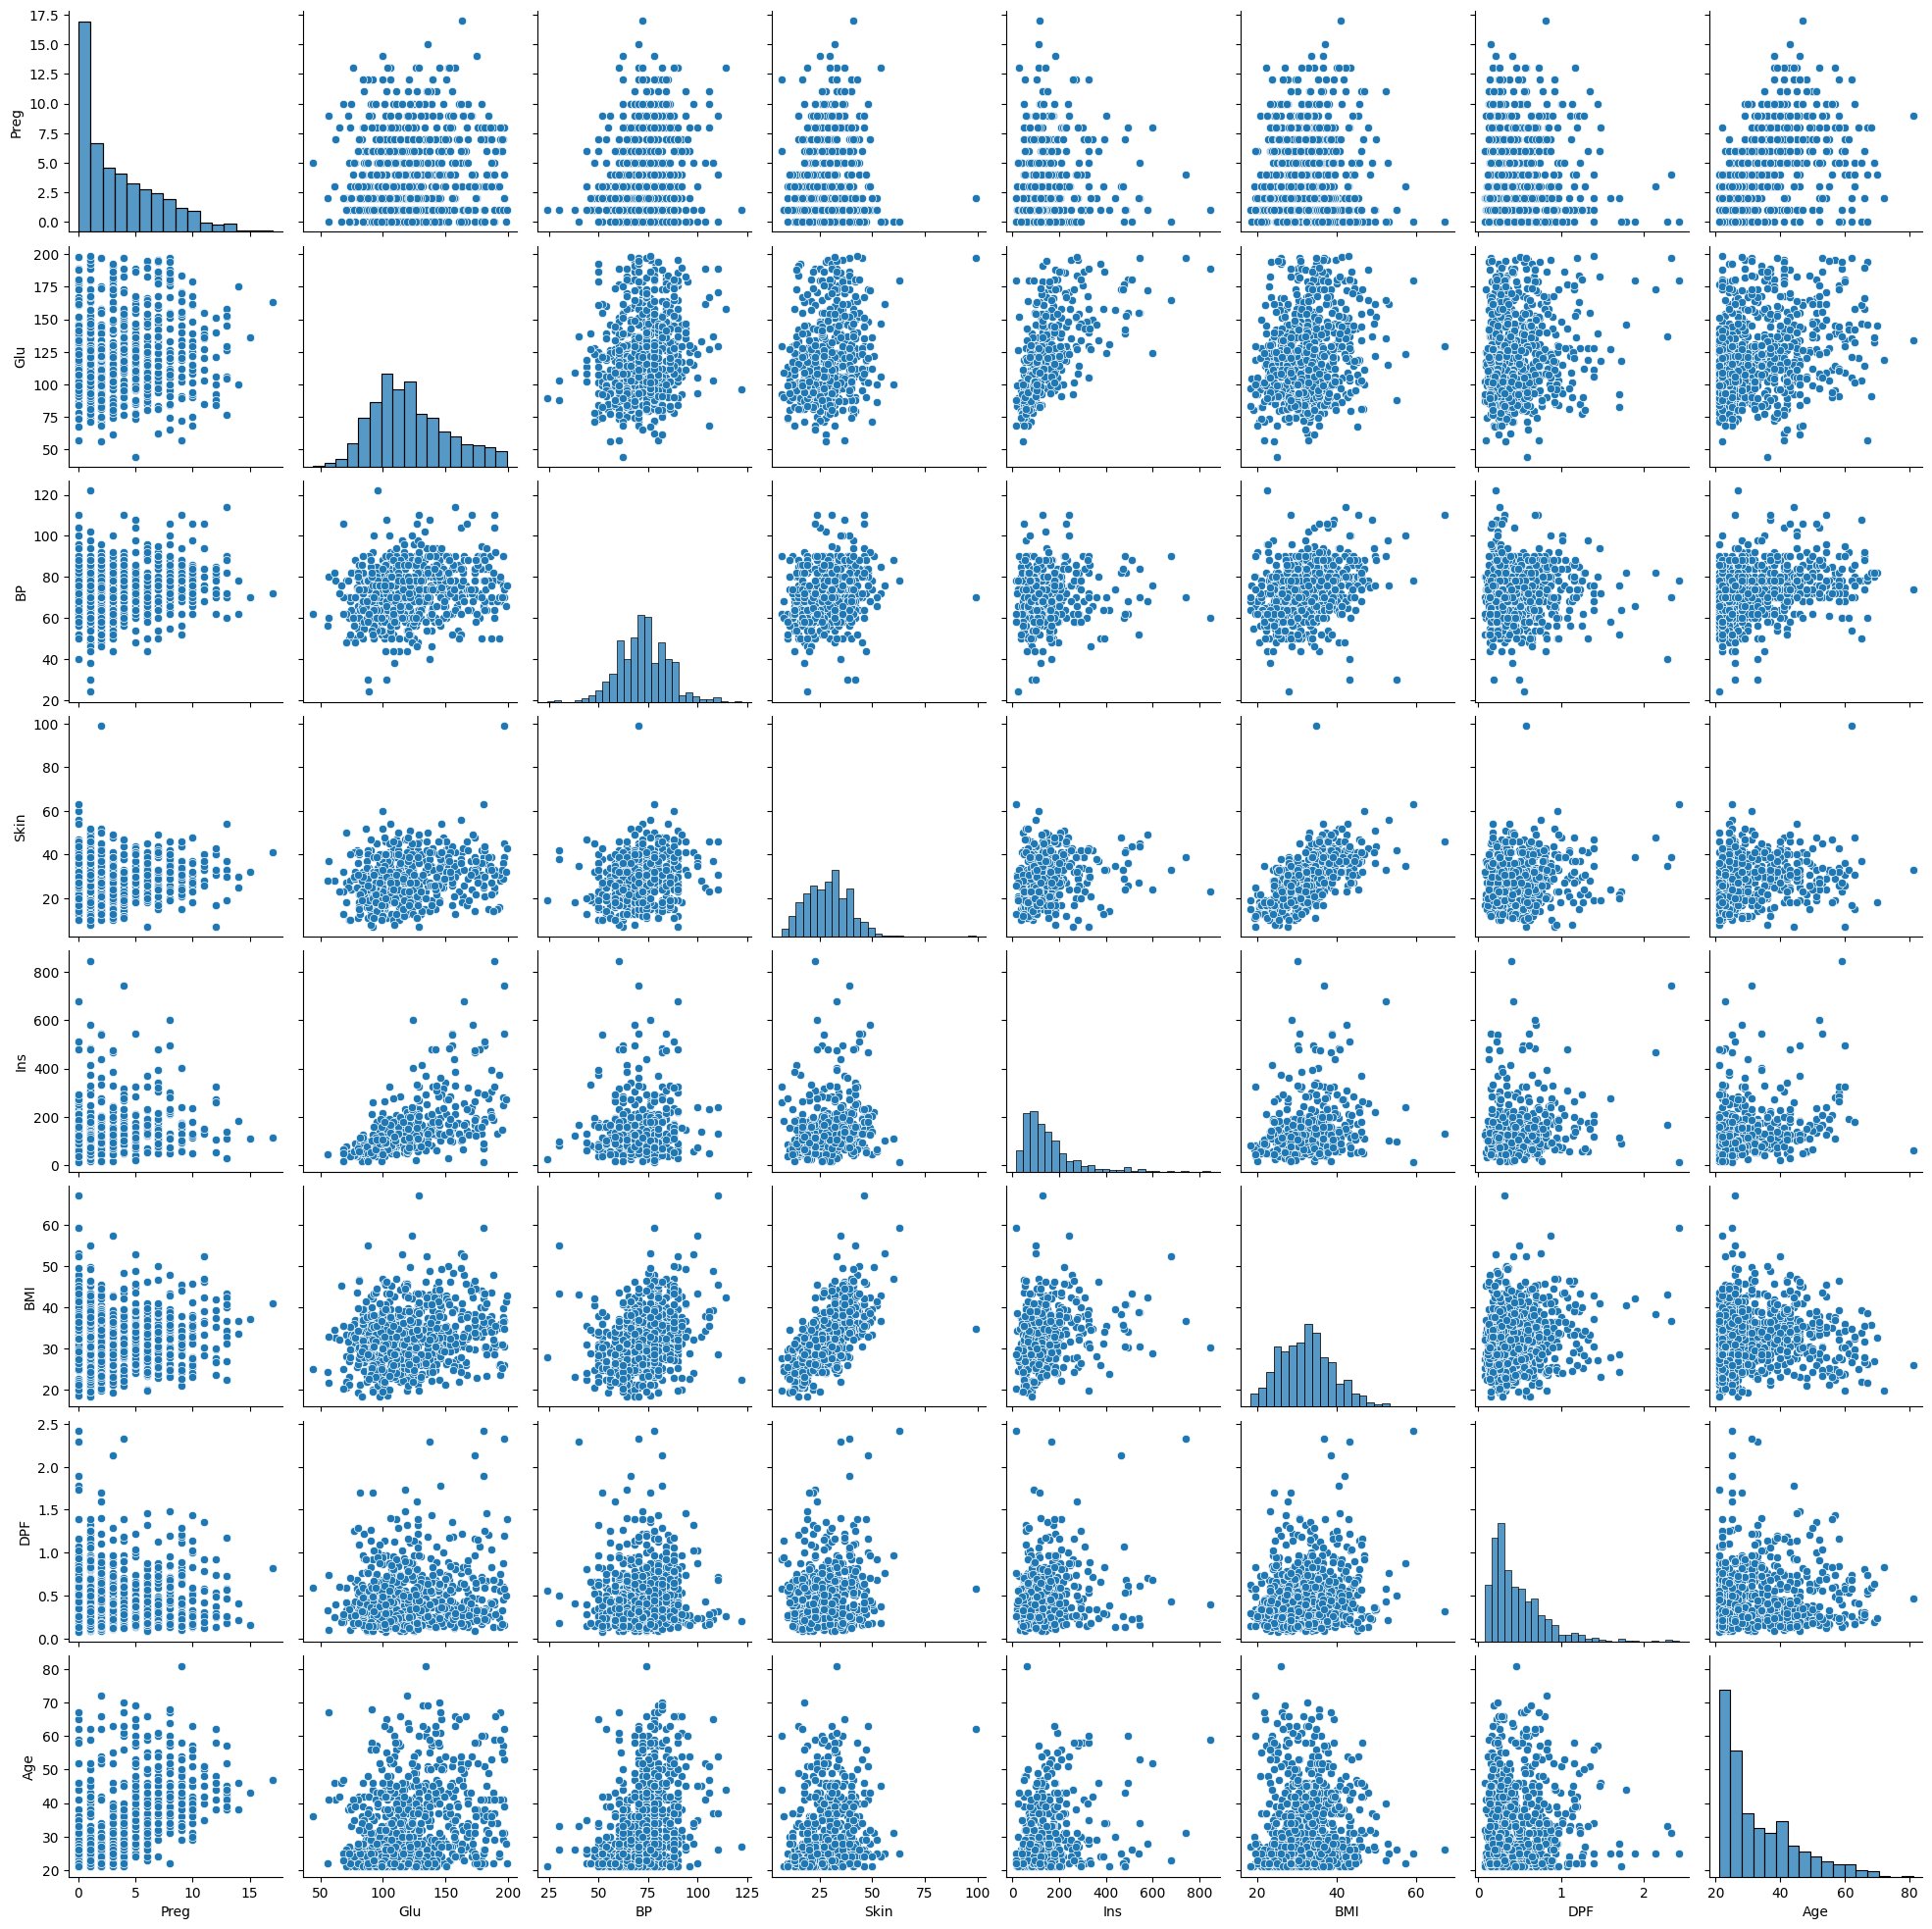

In [ ]:
sns.pairplot(df[column_names])
plt.show()

##### Correlation Matrix

<Axes: >

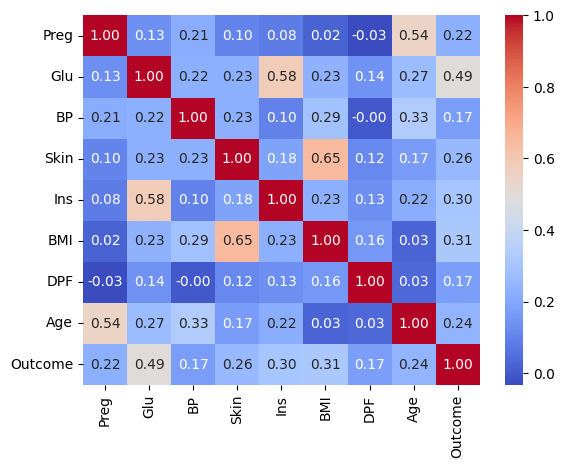

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

##### Target Distribution

In [ ]:
df['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

### Algorithm Design

#### Feature Selecting

In [ ]:
# Remove column 5 (2-hour serum insulin (mu U/ml)) due to many missing data (48.7% missing)
column_names.remove("Ins")

In [ ]:
column_names

['Preg', 'Glu', 'BP', 'Skin', 'BMI', 'DPF', 'Age']

In [ ]:
df = df[column_names+["Outcome"]]

In [ ]:
df.describe()

Preg         Glu          BP        Skin         BMI         DPF  \
count  768.000000  763.000000  733.000000  541.000000  757.000000  768.000000   
mean     3.845052  121.686763   72.405184   29.153420   32.457464    0.471876   
std      3.369578   30.535641   12.382158   10.476982    6.924988    0.331329   
min      0.000000   44.000000   24.000000    7.000000   18.200000    0.078000   
25%      1.000000   99.000000   64.000000   22.000000   27.500000    0.243750   
50%      3.000000  117.000000   72.000000   29.000000   32.300000    0.372500   
75%      6.000000  141.000000   80.000000   36.000000   36.600000    0.626250   
max     17.000000  199.000000  122.000000   99.000000   67.100000    2.420000   

              Age     Outcome  
count  768.000000  768.000000  
mean    33.240885    0.348958  
std     11.760232    0.476951  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
max     81.000000    1.000000

<Axes: >

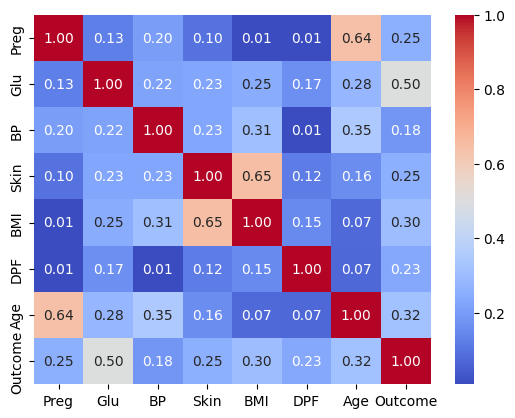

In [ ]:
corr_matrix = df.dropna().corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

#### Feature Engineering


*   Glu - According to WHO and ADA, there is diagnostic criteria of the relationship between the 2-hour plasma glucose concentration in an OGTT and diabetes.
*   BMI - According to
[Obesity and Type 2 Diabetes](https://www.ncbi.nlm.nih.gov/books/NBK592412/), BMI >= 27.5 kg/m in the Asian population considered obesity which relating to Type 2 Diabetes



##### Encode

In [ ]:
# Glu

def encode_glu(glu):
    if glu < 140:
        return 0
    elif 140 <= glu < 200:
        return 0.5
    else:
        return 1

In [ ]:
# BMI

def encode_bmi(bmi):
    if bmi < 18.5:
        return -1
    elif 18.5 <= bmi < 23:
        return 0
    elif 23 <= bmi < 27.5:
        return 0.5
    else: # bmi >= 27.5
        return 1

##### Scale

In [ ]:
# Glu

def scale_glu(glu):
    return glu-140/(200-140)

In [ ]:
# BMI

def scale_bmi(bmi):
    return bmi-18.5/(27.5-18.5)

#### Outlier Detection


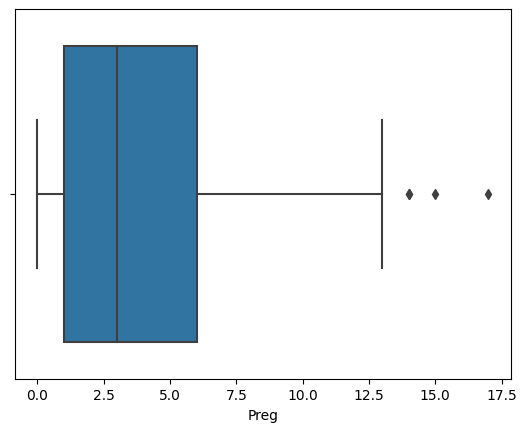

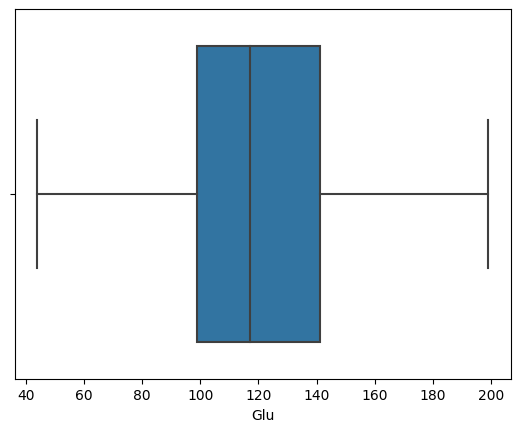

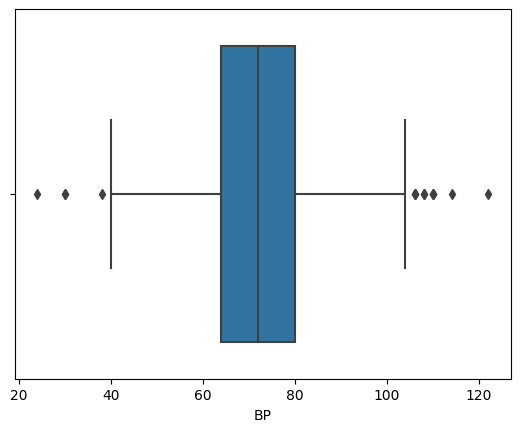

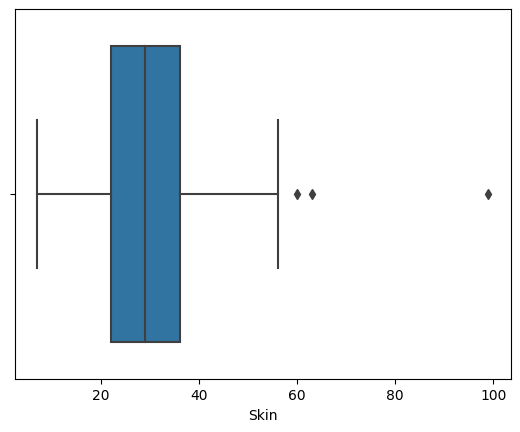

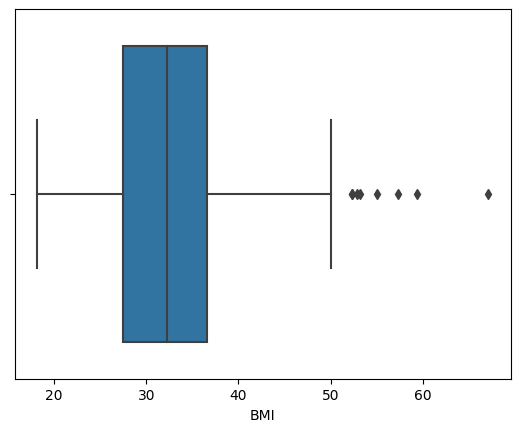

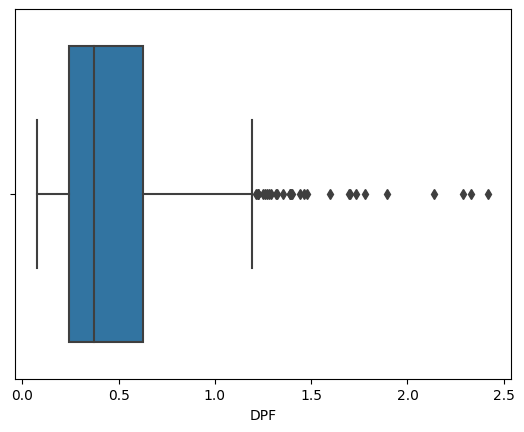

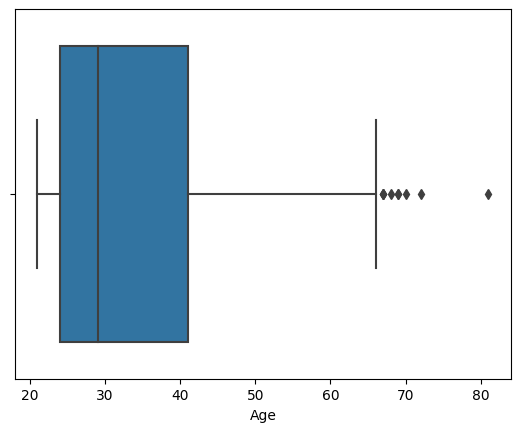

In [ ]:
for i in range(7):
  sns.boxplot(x=df[column_names[i]])
  plt.show()

#### Outlier Treatment

In [ ]:
for i in range(7):
  Q1 = df[column_names[i]].quantile(0.25)
  Q3 = df[column_names[i]].quantile(0.75)
  IQR = Q3 - Q1

  df = df[~((df[column_names[i]] < (Q1 - 1.5 * IQR)) | (df[column_names[i]] > (Q3 + 1.5 * IQR)))]

In [ ]:
df

Preg    Glu    BP  Skin   BMI    DPF   Age  Outcome
0     6.0  148.0  72.0  35.0  33.6  0.627  50.0      1.0
1     1.0   85.0  66.0  29.0  26.6  0.351  31.0      0.0
2     8.0  183.0  64.0   NaN  23.3  0.672  32.0      1.0
3     1.0   89.0  66.0  23.0  28.1  0.167  21.0      0.0
5     5.0  116.0  74.0   NaN  25.6  0.201  30.0      0.0
..    ...    ...   ...   ...   ...    ...   ...      ...
763  10.0  101.0  76.0  48.0  32.9  0.171  63.0      0.0
764   2.0  122.0  70.0  27.0  36.8  0.340  27.0      0.0
765   5.0  121.0  72.0  23.0  26.2  0.245  30.0      0.0
766   1.0  126.0  60.0   NaN  30.1  0.349  47.0      1.0
767   1.0   93.0  70.0  31.0  30.4  0.315  23.0      0.0

[698 rows x 8 columns]

#### Imputation

##### MissForest

In [ ]:
!apt-get install r-base
!pip install rpy2
%load_ext rpy2.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.3.1-4.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
%%R
install.packages("missForest")
library(missForest)

(as ‘lib’ is unspecified)







































	‘/tmp/RtmpfxEGXx/downloaded_packages’



In [ ]:
%%R -i df
MissForest_df <- missForest(df) $ximp

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [ ]:
%%R -o MissForest_df

NULL


In [ ]:
MissForest_df

Preg    Glu    BP       Skin   BMI    DPF   Age  Outcome
0     6.0  148.0  72.0  35.000000  33.6  0.627  50.0      1.0
1     1.0   85.0  66.0  29.000000  26.6  0.351  31.0      0.0
2     8.0  183.0  64.0  25.860000  23.3  0.672  32.0      1.0
3     1.0   89.0  66.0  23.000000  28.1  0.167  21.0      0.0
5     5.0  116.0  74.0  25.113333  25.6  0.201  30.0      0.0
..    ...    ...   ...        ...   ...    ...   ...      ...
763  10.0  101.0  76.0  48.000000  32.9  0.171  63.0      0.0
764   2.0  122.0  70.0  27.000000  36.8  0.340  27.0      0.0
765   5.0  121.0  72.0  23.000000  26.2  0.245  30.0      0.0
766   1.0  126.0  60.0  25.780000  30.1  0.349  47.0      1.0
767   1.0   93.0  70.0  31.000000  30.4  0.315  23.0      0.0

[698 rows x 8 columns]

##### KNN

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10)
knn = knn_imputer.fit_transform(df)

In [ ]:
knn_df = pd.DataFrame(knn,columns=column_names+["Outcome"])

In [ ]:
knn_df

Preg    Glu    BP  Skin   BMI    DPF   Age  Outcome
0     6.0  148.0  72.0  35.0  33.6  0.627  50.0      1.0
1     1.0   85.0  66.0  29.0  26.6  0.351  31.0      0.0
2     8.0  183.0  64.0  27.7  23.3  0.672  32.0      1.0
3     1.0   89.0  66.0  23.0  28.1  0.167  21.0      0.0
4     5.0  116.0  74.0  23.6  25.6  0.201  30.0      0.0
..    ...    ...   ...   ...   ...    ...   ...      ...
693  10.0  101.0  76.0  48.0  32.9  0.171  63.0      0.0
694   2.0  122.0  70.0  27.0  36.8  0.340  27.0      0.0
695   5.0  121.0  72.0  23.0  26.2  0.245  30.0      0.0
696   1.0  126.0  60.0  32.0  30.1  0.349  47.0      1.0
697   1.0   93.0  70.0  31.0  30.4  0.315  23.0      0.0

[698 rows x 8 columns]

##### IterativeImputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform imputation
iter = imputer.fit_transform(df)

In [ ]:
iter_df = pd.DataFrame(iter,columns=column_names+["Outcome"])

In [ ]:
iter_df

Preg    Glu    BP       Skin   BMI    DPF   Age  Outcome
0     6.0  148.0  72.0  35.000000  33.6  0.627  50.0      1.0
1     1.0   85.0  66.0  29.000000  26.6  0.351  31.0      0.0
2     8.0  183.0  64.0  21.047004  23.3  0.672  32.0      1.0
3     1.0   89.0  66.0  23.000000  28.1  0.167  21.0      0.0
4     5.0  116.0  74.0  22.256407  25.6  0.201  30.0      0.0
..    ...    ...   ...        ...   ...    ...   ...      ...
693  10.0  101.0  76.0  48.000000  32.9  0.171  63.0      0.0
694   2.0  122.0  70.0  27.000000  36.8  0.340  27.0      0.0
695   5.0  121.0  72.0  23.000000  26.2  0.245  30.0      0.0
696   1.0  126.0  60.0  25.895013  30.1  0.349  47.0      1.0
697   1.0   93.0  70.0  31.000000  30.4  0.315  23.0      0.0

[698 rows x 8 columns]

In [ ]:
iter_df.Outcome.value_counts()

0.0    466
1.0    232
Name: Outcome, dtype: int64

#### Handle Unbalanced Data

##### MissForest

###### Up-sampling the Minority Class (1)

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = MissForest_df.loc[MissForest_df.Outcome==0,column_names]
df_minority = MissForest_df.loc[MissForest_df.Outcome==1,column_names]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)

# Combine majority class with upsampled minority class
df_minority_upsampled["Outcome"] = 1
df_majority["Outcome"] = 0
MissForest_upsampled_df = pd.concat([df_majority, df_minority_upsampled])

###### Down-sampling the Majority Class (0)

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=42)

# Combine minority class with downsampled majority class
df_minority_upsampled["Outcome"] = 1
df_minority["Outcome"] = 1
MissForest_downsampled_df = pd.concat([df_majority_downsampled, df_minority])

###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(MissForest_df[column_names], MissForest_df["Outcome"])

In [ ]:
MissForest_SMOTE_df = pd.concat([X, pd.DataFrame(y, columns=['Outcome'])], axis=1)

In [ ]:
MissForest_SMOTE_df

Preg         Glu         BP       Skin        BMI       DPF  \
0    6.000000  148.000000  72.000000  35.000000  33.600000  0.627000   
1    1.000000   85.000000  66.000000  29.000000  26.600000  0.351000   
2    8.000000  183.000000  64.000000  25.860000  23.300000  0.672000   
3    1.000000   89.000000  66.000000  23.000000  28.100000  0.167000   
4    5.000000  116.000000  74.000000  25.113333  25.600000  0.201000   
..        ...         ...        ...        ...        ...       ...   
927  0.875456  168.167275  74.251131  29.478451  32.591819  0.652236   
928  8.518333  131.445001  70.963334  33.182200  33.573833  0.468003   
929  2.511950  111.488050  63.244025  37.267926  34.431573  0.532038   
930  8.705084  101.410169  75.410169  37.884747  34.816952  0.663820   
931  2.989793  126.994897  62.487242  27.635482  31.119769  0.424363   

           Age  Outcome  
0    50.000000      1.0  
1    31.000000      0.0  
2    32.000000      1.0  
3    21.000000      0.0  
4    30.000000      0.0  
..         ...      ...  
927  28.249087      1.0  
928  42.109998      1.0  
929  22.511950      1.0  
930  45.115253      1.0  
931  46.502552      1.0  

[932 rows x 8 columns]

##### KNN

###### Up-sampling the Minority Class (1)

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = knn_df.loc[knn_df.Outcome==0,column_names]
df_minority = knn_df.loc[knn_df.Outcome==1,column_names]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)

# Combine majority class with upsampled minority class
df_minority_upsampled["Outcome"] = 1
df_majority["Outcome"] = 0
knn_upsampled_df = pd.concat([df_majority, df_minority_upsampled])

###### Down-sampling the Majority Class (0)

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=42)

# Combine minority class with downsampled majority class
df_minority_upsampled["Outcome"] = 1
df_minority["Outcome"] = 1
knn_downsampled_df = pd.concat([df_majority_downsampled, df_minority])

###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(knn_df[column_names], knn_df["Outcome"])

In [ ]:
knn_SMOTE_df = pd.concat([X, pd.DataFrame(y, columns=['Outcome'])], axis=1)

In [ ]:
knn_SMOTE_df

Preg         Glu         BP       Skin        BMI       DPF  \
0    6.000000  148.000000  72.000000  35.000000  33.600000  0.627000   
1    1.000000   85.000000  66.000000  29.000000  26.600000  0.351000   
2    8.000000  183.000000  64.000000  27.700000  23.300000  0.672000   
3    1.000000   89.000000  66.000000  23.000000  28.100000  0.167000   
4    5.000000  116.000000  74.000000  23.600000  25.600000  0.201000   
..        ...         ...        ...        ...        ...       ...   
927  0.875456  168.167275  69.167275  28.892549  32.591819  0.652236   
928  8.518333  131.445001  70.963334  32.940833  33.573833  0.468003   
929  2.511950  111.488050  63.244025  37.267926  34.431573  0.532038   
930  8.705084  101.410169  75.410169  37.884747  34.816952  0.663820   
931  3.238517  125.751276  62.487242  30.507655  30.348724  0.313184   

           Age  Outcome  
0    50.000000      1.0  
1    31.000000      0.0  
2    32.000000      1.0  
3    21.000000      0.0  
4    30.000000      0.0  
..         ...      ...  
927  28.249087      1.0  
928  42.109998      1.0  
929  22.511950      1.0  
930  45.115253      1.0  
931  45.507655      1.0  

[932 rows x 8 columns]

##### IterativeImputer

###### Up-sampling the Minority Class (1)

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = iter_df.loc[iter_df.Outcome==0,column_names]
df_minority = iter_df.loc[iter_df.Outcome==1,column_names]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)

# Combine majority class with upsampled minority class
df_minority_upsampled["Outcome"] = 1
df_majority["Outcome"] = 0
iter_upsampled_df = pd.concat([df_majority, df_minority_upsampled])

###### Down-sampling the Majority Class (0)

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=42)

# Combine minority class with downsampled majority class
df_minority_upsampled["Outcome"] = 1
df_minority["Outcome"] = 1
iter_downsampled_df = pd.concat([df_majority_downsampled, df_minority])

###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(iter_df[column_names], iter_df["Outcome"])

In [ ]:
iter_SMOTE_df = pd.concat([X, pd.DataFrame(y, columns=['Outcome'])], axis=1)

In [ ]:
iter_SMOTE_df

Preg         Glu         BP       Skin        BMI       DPF  \
0    6.000000  148.000000  72.000000  35.000000  33.600000  0.627000   
1    1.000000   85.000000  66.000000  29.000000  26.600000  0.351000   
2    8.000000  183.000000  64.000000  21.047004  23.300000  0.672000   
3    1.000000   89.000000  66.000000  23.000000  28.100000  0.167000   
4    5.000000  116.000000  74.000000  22.256407  25.600000  0.201000   
..        ...         ...        ...        ...        ...       ...   
927  0.875456  168.167275  72.444991  29.155932  32.591819  0.652236   
928  8.518333  131.445001  70.963334  31.615085  33.573833  0.468003   
929  2.511950  111.488050  63.244025  37.267926  34.431573  0.532038   
930  8.705084  101.410169  75.410169  37.884747  34.816952  0.663820   
931  2.989793  126.994897  62.487242  27.515395  31.119769  0.424363   

           Age  Outcome  
0    50.000000      1.0  
1    31.000000      0.0  
2    32.000000      1.0  
3    21.000000      0.0  
4    30.000000      0.0  
..         ...      ...  
927  28.249087      1.0  
928  42.109998      1.0  
929  22.511950      1.0  
930  45.115253      1.0  
931  46.502552      1.0  

[932 rows x 8 columns]

#### Train and Test Split

We have 27 distinct datasets:
* MissForest_upsampled_df
* MissForest_SMOTE_df
* MissForest_downsampled_df
* knn_upsampled_df
* knn_SMOTE_df
* knn_downsampled_df
* iter_upsampled_df
* iter_SMOTE_df
* iter_downsampled_df

##### and each one have
  - original
  - encoded
  - scaled

In [ ]:
from sklearn.model_selection import train_test_split

X_train_MissForest_upsampled, X_test_MissForest_upsampled, y_train_MissForest_upsampled, y_test_MissForest_upsampled = train_test_split(MissForest_upsampled_df[column_names], MissForest_upsampled_df["Outcome"], random_state=42, train_size = 0.8)
X_train_MissForest_SMOTE, X_test_MissForest_SMOTE, y_train_MissForest_SMOTE, y_test_MissForest_SMOTE = train_test_split(MissForest_SMOTE_df[column_names], MissForest_SMOTE_df["Outcome"], random_state=42, train_size = 0.8)
X_train_MissForest_downsampled, X_test_MissForest_downsampled, y_train_MissForest_downsampled, y_test_MissForest_downsampled = train_test_split(MissForest_downsampled_df[column_names], MissForest_downsampled_df["Outcome"], random_state=42, train_size = 0.8)

X_train_knn_upsampled, X_test_knn_upsampled, y_train_knn_upsampled, y_test_knn_upsampled = train_test_split(knn_upsampled_df[column_names], knn_upsampled_df["Outcome"], random_state=42, train_size = 0.8)
X_train_knn_SMOTE, X_test_knn_SMOTE, y_train_knn_SMOTE, y_test_knn_SMOTE = train_test_split(knn_SMOTE_df[column_names], knn_SMOTE_df["Outcome"], random_state=42, train_size = 0.8)
X_train_knn_downsampled, X_test_knn_downsampled, y_train_knn_downsampled, y_test_knn_downsampled = train_test_split(knn_downsampled_df[column_names], knn_downsampled_df["Outcome"], random_state=42, train_size = 0.8)

X_train_iter_upsampled, X_test_iter_upsampled, y_train_iter_upsampled, y_test_iter_upsampled = train_test_split(iter_upsampled_df[column_names], iter_upsampled_df["Outcome"], random_state=42, train_size = 0.8)
X_train_iter_SMOTE, X_test_iter_SMOTE, y_train_iter_SMOTE, y_test_iter_SMOTE = train_test_split(iter_SMOTE_df[column_names], iter_SMOTE_df["Outcome"], random_state=42, train_size = 0.8)
X_train_iter_downsampled, X_test_iter_downsampled, y_train_iter_downsampled, y_test_iter_downsampled = train_test_split(iter_downsampled_df[column_names], iter_downsampled_df["Outcome"], random_state=42, train_size = 0.8)

##### MissForest

In [ ]:
X_train_MissForest_upsampled_encoded = X_train_MissForest_upsampled.copy()
X_test_MissForest_upsampled_encoded = X_test_MissForest_upsampled.copy()
X_train_MissForest_upsampled_scaled = X_train_MissForest_upsampled.copy()
X_test_MissForest_upsampled_scaled = X_test_MissForest_upsampled.copy()

X_train_MissForest_SMOTE_encoded = X_train_MissForest_SMOTE.copy()
X_test_MissForest_SMOTE_encoded = X_test_MissForest_SMOTE.copy()
X_train_MissForest_SMOTE_scaled = X_train_MissForest_SMOTE.copy()
X_test_MissForest_SMOTE_scaled = X_test_MissForest_SMOTE.copy()

X_train_MissForest_downsampled_encoded = X_train_MissForest_downsampled.copy()
X_test_MissForest_downsampled_encoded = X_test_MissForest_downsampled.copy()
X_train_MissForest_downsampled_scaled = X_train_MissForest_downsampled.copy()
X_test_MissForest_downsampled_scaled = X_test_MissForest_downsampled.copy()

In [ ]:
X_train_MissForest_upsampled_encoded['Glu'] = X_train_MissForest_upsampled_encoded['Glu'].apply(encode_glu)
X_train_MissForest_upsampled_encoded['BMI'] = X_train_MissForest_upsampled_encoded['BMI'].apply(encode_bmi)
X_test_MissForest_upsampled_encoded['Glu'] = X_test_MissForest_upsampled_encoded['Glu'].apply(encode_glu)
X_test_MissForest_upsampled_encoded['BMI'] = X_test_MissForest_upsampled_encoded['BMI'].apply(encode_bmi)
X_train_MissForest_upsampled_scaled['Glu'] = X_train_MissForest_upsampled_scaled['Glu'].apply(scale_glu)
X_train_MissForest_upsampled_scaled['BMI'] = X_train_MissForest_upsampled_scaled['BMI'].apply(scale_bmi)
X_test_MissForest_upsampled_scaled['Glu'] = X_test_MissForest_upsampled_scaled['Glu'].apply(scale_glu)
X_test_MissForest_upsampled_scaled['BMI'] = X_test_MissForest_upsampled_scaled['BMI'].apply(scale_bmi)

X_train_MissForest_SMOTE_encoded['Glu'] = X_train_MissForest_SMOTE_encoded['Glu'].apply(encode_glu)
X_train_MissForest_SMOTE_encoded['BMI'] = X_train_MissForest_SMOTE_encoded['BMI'].apply(encode_bmi)
X_test_MissForest_SMOTE_encoded['Glu'] = X_test_MissForest_SMOTE_encoded['Glu'].apply(encode_glu)
X_test_MissForest_SMOTE_encoded['BMI'] = X_test_MissForest_SMOTE_encoded['BMI'].apply(encode_bmi)
X_train_MissForest_SMOTE_scaled['Glu'] = X_train_MissForest_SMOTE_scaled['Glu'].apply(scale_glu)
X_train_MissForest_SMOTE_scaled['BMI'] = X_train_MissForest_SMOTE_scaled['BMI'].apply(scale_bmi)
X_test_MissForest_SMOTE_scaled['Glu'] = X_test_MissForest_SMOTE_scaled['Glu'].apply(scale_glu)
X_test_MissForest_SMOTE_scaled['BMI'] = X_test_MissForest_SMOTE_scaled['BMI'].apply(scale_bmi)

X_train_MissForest_downsampled_encoded['Glu'] = X_train_MissForest_downsampled_encoded['Glu'].apply(encode_glu)
X_train_MissForest_downsampled_encoded['BMI'] = X_train_MissForest_downsampled_encoded['BMI'].apply(encode_bmi)
X_test_MissForest_downsampled_encoded['Glu'] = X_test_MissForest_downsampled_encoded['Glu'].apply(encode_glu)
X_test_MissForest_downsampled_encoded['BMI'] = X_test_MissForest_downsampled_encoded['BMI'].apply(encode_bmi)
X_train_MissForest_downsampled_scaled['Glu'] = X_train_MissForest_downsampled_scaled['Glu'].apply(scale_glu)
X_train_MissForest_downsampled_scaled['BMI'] = X_train_MissForest_downsampled_scaled['BMI'].apply(scale_bmi)
X_test_MissForest_downsampled_scaled['Glu'] = X_test_MissForest_downsampled_scaled['Glu'].apply(scale_glu)
X_test_MissForest_downsampled_scaled['BMI'] = X_test_MissForest_downsampled_scaled['BMI'].apply(scale_bmi)


##### knn

In [ ]:
X_train_knn_upsampled_encoded = X_train_knn_upsampled.copy()
X_test_knn_upsampled_encoded = X_test_knn_upsampled.copy()
X_train_knn_upsampled_scaled = X_train_knn_upsampled.copy()
X_test_knn_upsampled_scaled = X_test_knn_upsampled.copy()

X_train_knn_SMOTE_encoded = X_train_knn_SMOTE.copy()
X_test_knn_SMOTE_encoded = X_test_knn_SMOTE.copy()
X_train_knn_SMOTE_scaled = X_train_knn_SMOTE.copy()
X_test_knn_SMOTE_scaled = X_test_knn_SMOTE.copy()

X_train_knn_downsampled_encoded = X_train_knn_downsampled.copy()
X_test_knn_downsampled_encoded = X_test_knn_downsampled.copy()
X_train_knn_downsampled_scaled = X_train_knn_downsampled.copy()
X_test_knn_downsampled_scaled = X_test_knn_downsampled.copy()

In [ ]:
X_train_knn_upsampled_encoded['Glu'] = X_train_knn_upsampled_encoded['Glu'].apply(encode_glu)
X_train_knn_upsampled_encoded['BMI'] = X_train_knn_upsampled_encoded['BMI'].apply(encode_bmi)
X_test_knn_upsampled_encoded['Glu'] = X_test_knn_upsampled_encoded['Glu'].apply(encode_glu)
X_test_knn_upsampled_encoded['BMI'] = X_test_knn_upsampled_encoded['BMI'].apply(encode_bmi)
X_train_knn_upsampled_scaled['Glu'] = X_train_knn_upsampled_scaled['Glu'].apply(scale_glu)
X_train_knn_upsampled_scaled['BMI'] = X_train_knn_upsampled_scaled['BMI'].apply(scale_bmi)
X_test_knn_upsampled_scaled['Glu'] = X_test_knn_upsampled_scaled['Glu'].apply(scale_glu)
X_test_knn_upsampled_scaled['BMI'] = X_test_knn_upsampled_scaled['BMI'].apply(scale_bmi)

X_train_knn_SMOTE_encoded['Glu'] = X_train_knn_SMOTE_encoded['Glu'].apply(encode_glu)
X_train_knn_SMOTE_encoded['BMI'] = X_train_knn_SMOTE_encoded['BMI'].apply(encode_bmi)
X_test_knn_SMOTE_encoded['Glu'] = X_test_knn_SMOTE_encoded['Glu'].apply(encode_glu)
X_test_knn_SMOTE_encoded['BMI'] = X_test_knn_SMOTE_encoded['BMI'].apply(encode_bmi)
X_train_knn_SMOTE_scaled['Glu'] = X_train_knn_SMOTE_scaled['Glu'].apply(scale_glu)
X_train_knn_SMOTE_scaled['BMI'] = X_train_knn_SMOTE_scaled['BMI'].apply(scale_bmi)
X_test_knn_SMOTE_scaled['Glu'] = X_test_knn_SMOTE_scaled['Glu'].apply(scale_glu)
X_test_knn_SMOTE_scaled['BMI'] = X_test_knn_SMOTE_scaled['BMI'].apply(scale_bmi)

X_train_knn_downsampled_encoded['Glu'] = X_train_knn_downsampled_encoded['Glu'].apply(encode_glu)
X_train_knn_downsampled_encoded['BMI'] = X_train_knn_downsampled_encoded['BMI'].apply(encode_bmi)
X_test_knn_downsampled_encoded['Glu'] = X_test_knn_downsampled_encoded['Glu'].apply(encode_glu)
X_test_knn_downsampled_encoded['BMI'] = X_test_knn_downsampled_encoded['BMI'].apply(encode_bmi)
X_train_knn_downsampled_scaled['Glu'] = X_train_knn_downsampled_scaled['Glu'].apply(scale_glu)
X_train_knn_downsampled_scaled['BMI'] = X_train_knn_downsampled_scaled['BMI'].apply(scale_bmi)
X_test_knn_downsampled_scaled['Glu'] = X_test_knn_downsampled_scaled['Glu'].apply(scale_glu)
X_test_knn_downsampled_scaled['BMI'] = X_test_knn_downsampled_scaled['BMI'].apply(scale_bmi)


##### IterativeImputer

In [ ]:
X_train_iter_upsampled_encoded = X_train_iter_upsampled.copy()
X_test_iter_upsampled_encoded = X_test_iter_upsampled.copy()
X_train_iter_upsampled_scaled = X_train_iter_upsampled.copy()
X_test_iter_upsampled_scaled = X_test_iter_upsampled.copy()

X_train_iter_SMOTE_encoded = X_train_iter_SMOTE.copy()
X_test_iter_SMOTE_encoded = X_test_iter_SMOTE.copy()
X_train_iter_SMOTE_scaled = X_train_iter_SMOTE.copy()
X_test_iter_SMOTE_scaled = X_test_iter_SMOTE.copy()

X_train_iter_downsampled_encoded = X_train_iter_downsampled.copy()
X_test_iter_downsampled_encoded = X_test_iter_downsampled.copy()
X_train_iter_downsampled_scaled = X_train_iter_downsampled.copy()
X_test_iter_downsampled_scaled = X_test_iter_downsampled.copy()

In [ ]:
X_train_iter_upsampled_encoded['Glu'] = X_train_iter_upsampled_encoded['Glu'].apply(encode_glu)
X_train_iter_upsampled_encoded['BMI'] = X_train_iter_upsampled_encoded['BMI'].apply(encode_bmi)
X_test_iter_upsampled_encoded['Glu'] = X_test_iter_upsampled_encoded['Glu'].apply(encode_glu)
X_test_iter_upsampled_encoded['BMI'] = X_test_iter_upsampled_encoded['BMI'].apply(encode_bmi)
X_train_iter_upsampled_scaled['Glu'] = X_train_iter_upsampled_scaled['Glu'].apply(scale_glu)
X_train_iter_upsampled_scaled['BMI'] = X_train_iter_upsampled_scaled['BMI'].apply(scale_bmi)
X_test_iter_upsampled_scaled['Glu'] = X_test_iter_upsampled_scaled['Glu'].apply(scale_glu)
X_test_iter_upsampled_scaled['BMI'] = X_test_iter_upsampled_scaled['BMI'].apply(scale_bmi)

X_train_iter_SMOTE_encoded['Glu'] = X_train_iter_SMOTE_encoded['Glu'].apply(encode_glu)
X_train_iter_SMOTE_encoded['BMI'] = X_train_iter_SMOTE_encoded['BMI'].apply(encode_bmi)
X_test_iter_SMOTE_encoded['Glu'] = X_test_iter_SMOTE_encoded['Glu'].apply(encode_glu)
X_test_iter_SMOTE_encoded['BMI'] = X_test_iter_SMOTE_encoded['BMI'].apply(encode_bmi)
X_train_iter_SMOTE_scaled['Glu'] = X_train_iter_SMOTE_scaled['Glu'].apply(scale_glu)
X_train_iter_SMOTE_scaled['BMI'] = X_train_iter_SMOTE_scaled['BMI'].apply(scale_bmi)
X_test_iter_SMOTE_scaled['Glu'] = X_test_iter_SMOTE_scaled['Glu'].apply(scale_glu)
X_test_iter_SMOTE_scaled['BMI'] = X_test_iter_SMOTE_scaled['BMI'].apply(scale_bmi)

X_train_iter_downsampled_encoded['Glu'] = X_train_iter_downsampled_encoded['Glu'].apply(encode_glu)
X_train_iter_downsampled_encoded['BMI'] = X_train_iter_downsampled_encoded['BMI'].apply(encode_bmi)
X_test_iter_downsampled_encoded['Glu'] = X_test_iter_downsampled_encoded['Glu'].apply(encode_glu)
X_test_iter_downsampled_encoded['BMI'] = X_test_iter_downsampled_encoded['BMI'].apply(encode_bmi)
X_train_iter_downsampled_scaled['Glu'] = X_train_iter_downsampled_scaled['Glu'].apply(scale_glu)
X_train_iter_downsampled_scaled['BMI'] = X_train_iter_downsampled_scaled['BMI'].apply(scale_bmi)
X_test_iter_downsampled_scaled['Glu'] = X_test_iter_downsampled_scaled['Glu'].apply(scale_glu)
X_test_iter_downsampled_scaled['BMI'] = X_test_iter_downsampled_scaled['BMI'].apply(scale_bmi)


### Proposed Classification Model

#### LogisticRegression

In [ ]:
from numpy import loadtxt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
%matplotlib inline

#####MissForest_upsampled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_upsampled)
y_train_pred = best_model.predict(X_train_MissForest_upsampled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7610738255033557
testing accuracy: 0.7593582887700535


In [ ]:
y_pred = best_model.predict(X_test_MissForest_upsampled)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7593582887700535
Precision: 0.7391304347826086
Recall: 0.7640449438202247
F1-Score: 0.7513812154696133
Confusion Matrix:
[[74 24]
 [21 68]]


#####MissForest_upsampled_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_upsampled_encoded)
y_train_pred = best_model.predict(X_train_MissForest_upsampled_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7395973154362416
testing accuracy: 0.7807486631016043


In [ ]:
y_pred = best_model.predict(X_test_MissForest_upsampled_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7807486631016043
Precision: 0.7608695652173914
Recall: 0.7865168539325843
F1-Score: 0.7734806629834255
Confusion Matrix:
[[76 22]
 [19 70]]


#####MissForest_upsampled_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_upsampled_scaled)
y_train_pred = best_model.predict(X_train_MissForest_upsampled_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7530201342281879
testing accuracy: 0.7647058823529411


In [ ]:
y_pred = best_model.predict(X_test_MissForest_upsampled_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7647058823529411
Precision: 0.7528089887640449
Recall: 0.7528089887640449
F1-Score: 0.752808988764045
Confusion Matrix:
[[76 22]
 [22 67]]


#####MissForest_SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_SMOTE)
y_train_pred = best_model.predict(X_train_MissForest_SMOTE)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7597315436241611
testing accuracy: 0.7807486631016043


In [ ]:
y_pred = best_model.predict(X_test_MissForest_SMOTE)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7807486631016043
Precision: 0.7319587628865979
Recall: 0.8255813953488372
F1-Score: 0.7759562841530054
Confusion Matrix:
[[75 26]
 [15 71]]


#####MissForest_SMOTE_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_SMOTE_encoded)
y_train_pred = best_model.predict(X_train_MissForest_SMOTE_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.748993288590604
testing accuracy: 0.7219251336898396


In [ ]:
y_pred = best_model.predict(X_test_MissForest_SMOTE_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7219251336898396
Precision: 0.6976744186046512
Recall: 0.6976744186046512
F1-Score: 0.6976744186046512
Confusion Matrix:
[[75 26]
 [26 60]]


#####MissForest_SMOTE_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_SMOTE_scaled)
y_train_pred = best_model.predict(X_train_MissForest_SMOTE_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.763758389261745
testing accuracy: 0.7807486631016043


In [ ]:
y_pred = best_model.predict(X_test_MissForest_SMOTE_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7807486631016043
Precision: 0.7319587628865979
Recall: 0.8255813953488372
F1-Score: 0.7759562841530054
Confusion Matrix:
[[75 26]
 [15 71]]


#####MissForest_downsampled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_downsampled)
y_train_pred = best_model.predict(X_train_MissForest_downsampled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.77088948787062
testing accuracy: 0.6989247311827957


In [ ]:
y_pred = best_model.predict(X_test_MissForest_downsampled)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6989247311827957
Precision: 0.6956521739130435
Recall: 0.6956521739130435
F1-Score: 0.6956521739130435
Confusion Matrix:
[[33 14]
 [14 32]]


#####MissForest_downsampled_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_downsampled_encoded)
y_train_pred = best_model.predict(X_train_MissForest_downsampled_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7358490566037735
testing accuracy: 0.7526881720430108


In [ ]:
y_pred = best_model.predict(X_test_MissForest_downsampled_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7526881720430108
Precision: 0.7674418604651163
Recall: 0.717391304347826
F1-Score: 0.7415730337078652
Confusion Matrix:
[[37 10]
 [13 33]]


#####MissForest_downsampled_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_MissForest_downsampled_scaled)
y_train_pred = best_model.predict(X_train_MissForest_downsampled_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_MissForest_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_MissForest_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.77088948787062
testing accuracy: 0.6989247311827957


In [ ]:
y_pred = best_model.predict(X_test_MissForest_downsampled_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_MissForest_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_MissForest_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_MissForest_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_MissForest_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_MissForest_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6989247311827957
Precision: 0.6956521739130435
Recall: 0.6956521739130435
F1-Score: 0.6956521739130435
Confusion Matrix:
[[33 14]
 [14 32]]


#####knn_upsampled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_upsampled, y_train_knn_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_upsampled)
y_train_pred = best_model.predict(X_train_knn_upsampled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7583892617449665
testing accuracy: 0.7486631016042781


In [ ]:
y_pred = best_model.predict(X_test_knn_upsampled)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7486631016042781
Precision: 0.723404255319149
Recall: 0.7640449438202247
F1-Score: 0.7431693989071038
Confusion Matrix:
[[72 26]
 [21 68]]


#####knn_upsampled_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_upsampled_encoded)
y_train_pred = best_model.predict(X_train_knn_upsampled_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7422818791946308
testing accuracy: 0.7914438502673797


In [ ]:
y_pred = best_model.predict(X_test_knn_upsampled_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7914438502673797
Precision: 0.7717391304347826
Recall: 0.797752808988764
F1-Score: 0.7845303867403315
Confusion Matrix:
[[77 21]
 [18 71]]


#####knn_upsampled_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_upsampled_scaled)
y_train_pred = best_model.predict(X_train_knn_upsampled_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7463087248322148
testing accuracy: 0.7647058823529411


In [ ]:
y_pred = best_model.predict(X_test_knn_upsampled_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7647058823529411
Precision: 0.7419354838709677
Recall: 0.7752808988764045
F1-Score: 0.7582417582417582
Confusion Matrix:
[[74 24]
 [20 69]]


#####knn_SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_SMOTE)
y_train_pred = best_model.predict(X_train_knn_SMOTE)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7704697986577181
testing accuracy: 0.7272727272727273


In [ ]:
y_pred = best_model.predict(X_test_knn_SMOTE)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7272727272727273
Precision: 0.6767676767676768
Recall: 0.7790697674418605
F1-Score: 0.7243243243243244
Confusion Matrix:
[[69 32]
 [19 67]]


#####knn_SMOTE_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_SMOTE_encoded)
y_train_pred = best_model.predict(X_train_knn_SMOTE_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7516778523489933
testing accuracy: 0.7219251336898396


In [ ]:
y_pred = best_model.predict(X_test_knn_SMOTE_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7219251336898396
Precision: 0.7023809523809523
Recall: 0.686046511627907
F1-Score: 0.6941176470588234
Confusion Matrix:
[[76 25]
 [27 59]]


#####knn_SMOTE_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_SMOTE_scaled)
y_train_pred = best_model.predict(X_train_knn_SMOTE_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7704697986577181
testing accuracy: 0.7272727272727273


In [ ]:
y_pred = best_model.predict(X_test_knn_SMOTE_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7272727272727273
Precision: 0.6767676767676768
Recall: 0.7790697674418605
F1-Score: 0.7243243243243244
Confusion Matrix:
[[69 32]
 [19 67]]


#####knn_downsampled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_downsampled, y_train_knn_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_downsampled)
y_train_pred = best_model.predict(X_train_knn_downsampled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7789757412398922
testing accuracy: 0.6989247311827957


In [ ]:
y_pred = best_model.predict(X_test_knn_downsampled)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6989247311827957
Precision: 0.68
Recall: 0.7391304347826086
F1-Score: 0.7083333333333334
Confusion Matrix:
[[31 16]
 [12 34]]


#####knn_downsampled_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_downsampled_encoded)
y_train_pred = best_model.predict(X_train_knn_downsampled_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7331536388140162
testing accuracy: 0.7526881720430108


In [ ]:
y_pred = best_model.predict(X_test_knn_downsampled_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7526881720430108
Precision: 0.7446808510638298
Recall: 0.7608695652173914
F1-Score: 0.7526881720430109
Confusion Matrix:
[[35 12]
 [11 35]]


#####knn_downsampled_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_knn_downsampled_scaled)
y_train_pred = best_model.predict(X_train_knn_downsampled_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_knn_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_knn_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7762803234501348
testing accuracy: 0.7096774193548387


In [ ]:
y_pred = best_model.predict(X_test_knn_downsampled_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_knn_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_knn_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_knn_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_knn_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_knn_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7096774193548387
Precision: 0.6862745098039216
Recall: 0.7608695652173914
F1-Score: 0.7216494845360826
Confusion Matrix:
[[31 16]
 [11 35]]


#####iter_upsampled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_upsampled, y_train_iter_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_upsampled)
y_train_pred = best_model.predict(X_train_iter_upsampled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7422818791946308
testing accuracy: 0.7700534759358288


In [ ]:
y_pred = best_model.predict(X_test_iter_upsampled)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7700534759358288
Precision: 0.7446808510638298
Recall: 0.7865168539325843
F1-Score: 0.7650273224043715
Confusion Matrix:
[[74 24]
 [19 70]]


#####iter_upsampled_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_upsampled_encoded)
y_train_pred = best_model.predict(X_train_iter_upsampled_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7436241610738255
testing accuracy: 0.786096256684492


In [ ]:
y_pred = best_model.predict(X_test_iter_upsampled_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.786096256684492
Precision: 0.7634408602150538
Recall: 0.797752808988764
F1-Score: 0.7802197802197802
Confusion Matrix:
[[76 22]
 [18 71]]


#####iter_upsampled_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_upsampled_scaled)
y_train_pred = best_model.predict(X_train_iter_upsampled_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_upsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_upsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7597315436241611
testing accuracy: 0.7593582887700535


In [ ]:
y_pred = best_model.predict(X_test_iter_upsampled_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_upsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_upsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_upsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_upsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_upsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7593582887700535
Precision: 0.7391304347826086
Recall: 0.7640449438202247
F1-Score: 0.7513812154696133
Confusion Matrix:
[[74 24]
 [21 68]]


#####iter_SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_SMOTE)
y_train_pred = best_model.predict(X_train_iter_SMOTE)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.763758389261745
testing accuracy: 0.7754010695187166


In [ ]:
y_pred = best_model.predict(X_test_iter_SMOTE)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7754010695187166
Precision: 0.7291666666666666
Recall: 0.813953488372093
F1-Score: 0.7692307692307692
Confusion Matrix:
[[75 26]
 [16 70]]


#####iter_SMOTE_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_SMOTE_encoded)
y_train_pred = best_model.predict(X_train_iter_SMOTE_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7449664429530202
testing accuracy: 0.7272727272727273


In [ ]:
y_pred = best_model.predict(X_test_iter_SMOTE_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7272727272727273
Precision: 0.7011494252873564
Recall: 0.7093023255813954
F1-Score: 0.7052023121387283
Confusion Matrix:
[[75 26]
 [25 61]]


#####iter_SMOTE_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_SMOTE_scaled)
y_train_pred = best_model.predict(X_train_iter_SMOTE_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_SMOTE, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_SMOTE, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7664429530201342
testing accuracy: 0.7700534759358288


In [ ]:
y_pred = best_model.predict(X_test_iter_SMOTE_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_SMOTE, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_SMOTE, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_SMOTE, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_SMOTE, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_SMOTE, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7700534759358288
Precision: 0.7216494845360825
Recall: 0.813953488372093
F1-Score: 0.7650273224043715
Confusion Matrix:
[[74 27]
 [16 70]]


#####iter_downsampled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_downsampled, y_train_iter_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_downsampled)
y_train_pred = best_model.predict(X_train_iter_downsampled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7762803234501348
testing accuracy: 0.7096774193548387


In [ ]:
y_pred = best_model.predict(X_test_iter_downsampled)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7096774193548387
Precision: 0.6938775510204082
Recall: 0.7391304347826086
F1-Score: 0.7157894736842104
Confusion Matrix:
[[32 15]
 [12 34]]


#####iter_downsampled_encoded

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_downsampled_encoded)
y_train_pred = best_model.predict(X_train_iter_downsampled_encoded)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7304582210242587
testing accuracy: 0.7634408602150538


In [ ]:
y_pred = best_model.predict(X_test_iter_downsampled_encoded)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7634408602150538
Precision: 0.7857142857142857
Recall: 0.717391304347826
F1-Score: 0.75
Confusion Matrix:
[[38  9]
 [13 33]]


#####iter_downsampled_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],     # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Perform a grid search over hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
# test_accuracy = best_model.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)
y_test_pred = best_model.predict(X_test_iter_downsampled_scaled)
y_train_pred = best_model.predict(X_train_iter_downsampled_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
train_accuracy = accuracy_score(y_train_iter_downsampled, y_train_pred)
test_accuracy = accuracy_score(y_test_iter_downsampled, y_test_pred)
print(f"trainning accuracy: {train_accuracy}")
print(f"testing accuracy: {test_accuracy}")

trainning accuracy: 0.7816711590296496
testing accuracy: 0.7096774193548387


In [ ]:
y_pred = best_model.predict(X_test_iter_downsampled_scaled)
# Compute accuracy
accuracy = accuracy_score(y_test_iter_downsampled, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test_iter_downsampled, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test_iter_downsampled, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test_iter_downsampled, y_pred)
print("F1-Score:", f1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_iter_downsampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7096774193548387
Precision: 0.6938775510204082
Recall: 0.7391304347826086
F1-Score: 0.7157894736842104
Confusion Matrix:
[[32 15]
 [12 34]]


#### SVM

In [ ]:
# Import necessary modules
from sklearn import svm
from sklearn.metrics import accuracy_score

######MissForest_upsampled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)
clf2.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)
clf3.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)
clf4.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)
clf5.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)
clf6.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)
clf7.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_upsampled)
train_x2 = clf2.predict(X_train_MissForest_upsampled)
train_x3 = clf3.predict(X_train_MissForest_upsampled)
train_x4 = clf4.predict(X_train_MissForest_upsampled)
train_x5 = clf5.predict(X_train_MissForest_upsampled)
train_x6 = clf6.predict(X_train_MissForest_upsampled)
train_x7 = clf7.predict(X_train_MissForest_upsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7543624161073825 0.6577181208053692 0.7932885906040269 0.6590604026845638 0.8335570469798658 0.8335570469798658 0.7530201342281879


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_upsampled)
y_pred2 = clf2.predict(X_test_MissForest_upsampled)
y_pred3 = clf3.predict(X_test_MissForest_upsampled)
y_pred4 = clf4.predict(X_test_MissForest_upsampled)
y_pred5 = clf5.predict(X_test_MissForest_upsampled)
y_pred6 = clf6.predict(X_test_MissForest_upsampled)
y_pred7 = clf7.predict(X_test_MissForest_upsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7272727272727273 0.6363636363636364 0.7754010695187166 0.6684491978609626 0.8021390374331551 0.8021390374331551 0.7486631016042781


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 27]
 [24 62]]
[[59 29]
 [39 60]]
[[79 23]
 [19 66]]
[[61 25]
 [37 64]]
[[77 16]
 [21 73]]
[[77 16]
 [21 73]]
[[73 22]
 [25 67]]


######MissForest_upsampled_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)
clf2.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)
clf3.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)
clf4.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)
clf5.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)
clf6.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)
clf7.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_upsampled_encoded)
train_x2 = clf2.predict(X_train_MissForest_upsampled_encoded)
train_x3 = clf3.predict(X_train_MissForest_upsampled_encoded)
train_x4 = clf4.predict(X_train_MissForest_upsampled_encoded)
train_x5 = clf5.predict(X_train_MissForest_upsampled_encoded)
train_x6 = clf6.predict(X_train_MissForest_upsampled_encoded)
train_x7 = clf7.predict(X_train_MissForest_upsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7355704697986577 0.6429530201342282 0.7610738255033557 0.748993288590604 0.7758389261744967 0.7758389261744967 0.7328859060402685


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_upsampled_encoded)
y_pred2 = clf2.predict(X_test_MissForest_upsampled_encoded)
y_pred3 = clf3.predict(X_test_MissForest_upsampled_encoded)
y_pred4 = clf4.predict(X_test_MissForest_upsampled_encoded)
y_pred5 = clf5.predict(X_test_MissForest_upsampled_encoded)
y_pred6 = clf6.predict(X_test_MissForest_upsampled_encoded)
y_pred7 = clf7.predict(X_test_MissForest_upsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.786096256684492 0.6951871657754011 0.7967914438502673 0.7647058823529411 0.8288770053475936 0.8288770053475936 0.7914438502673797


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[80 22]
 [18 67]]
[[66 25]
 [32 64]]
[[83 23]
 [15 66]]
[[85 31]
 [13 58]]
[[83 17]
 [15 72]]
[[83 17]
 [15 72]]
[[78 19]
 [20 70]]


######MissForest_upsampled_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)
clf2.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)
clf3.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)
clf4.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)
clf5.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)
clf6.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)
clf7.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_upsampled_scaled)
train_x2 = clf2.predict(X_train_MissForest_upsampled_scaled)
train_x3 = clf3.predict(X_train_MissForest_upsampled_scaled)
train_x4 = clf4.predict(X_train_MissForest_upsampled_scaled)
train_x5 = clf5.predict(X_train_MissForest_upsampled_scaled)
train_x6 = clf6.predict(X_train_MissForest_upsampled_scaled)
train_x7 = clf7.predict(X_train_MissForest_upsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7543624161073825 0.6577181208053692 0.7932885906040269 0.6590604026845638 0.8335570469798658 0.8335570469798658 0.7530201342281879


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_upsampled_scaled)
y_pred2 = clf2.predict(X_test_MissForest_upsampled_scaled)
y_pred3 = clf3.predict(X_test_MissForest_upsampled_scaled)
y_pred4 = clf4.predict(X_test_MissForest_upsampled_scaled)
y_pred5 = clf5.predict(X_test_MissForest_upsampled_scaled)
y_pred6 = clf6.predict(X_test_MissForest_upsampled_scaled)
y_pred7 = clf7.predict(X_test_MissForest_upsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7272727272727273 0.6363636363636364 0.7754010695187166 0.6684491978609626 0.8021390374331551 0.8021390374331551 0.7486631016042781


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 27]
 [24 62]]
[[59 29]
 [39 60]]
[[79 23]
 [19 66]]
[[61 25]
 [37 64]]
[[77 16]
 [21 73]]
[[77 16]
 [21 73]]
[[73 22]
 [25 67]]


######MissForest_SMOTE

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)
clf2.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)
clf3.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)
clf4.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)
clf5.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)
clf6.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)
clf7.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_SMOTE)
train_x2 = clf2.predict(X_train_MissForest_SMOTE)
train_x3 = clf3.predict(X_train_MissForest_SMOTE)
train_x4 = clf4.predict(X_train_MissForest_SMOTE)
train_x5 = clf5.predict(X_train_MissForest_SMOTE)
train_x6 = clf6.predict(X_train_MissForest_SMOTE)
train_x7 = clf7.predict(X_train_MissForest_SMOTE)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.748993288590604 0.6550335570469799 0.7879194630872484 0.6590604026845638 0.8469798657718121 0.8469798657718121 0.7557046979865771


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_SMOTE)
y_pred2 = clf2.predict(X_test_MissForest_SMOTE)
y_pred3 = clf3.predict(X_test_MissForest_SMOTE)
y_pred4 = clf4.predict(X_test_MissForest_SMOTE)
y_pred5 = clf5.predict(X_test_MissForest_SMOTE)
y_pred6 = clf6.predict(X_test_MissForest_SMOTE)
y_pred7 = clf7.predict(X_test_MissForest_SMOTE)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7807486631016043 0.6577540106951871 0.7647058823529411 0.6363636363636364 0.7914438502673797 0.7914438502673797 0.7754010695187166


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[77 17]
 [24 69]]
[[59 22]
 [42 64]]
[[80 23]
 [21 63]]
[[50 17]
 [51 69]]
[[72 10]
 [29 76]]
[[72 10]
 [29 76]]
[[77 18]
 [24 68]]


######MissForest_SMOTE_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)
clf2.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)
clf3.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)
clf4.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)
clf5.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)
clf6.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)
clf7.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_SMOTE_encoded)
train_x2 = clf2.predict(X_train_MissForest_SMOTE_encoded)
train_x3 = clf3.predict(X_train_MissForest_SMOTE_encoded)
train_x4 = clf4.predict(X_train_MissForest_SMOTE_encoded)
train_x5 = clf5.predict(X_train_MissForest_SMOTE_encoded)
train_x6 = clf6.predict(X_train_MissForest_SMOTE_encoded)
train_x7 = clf7.predict(X_train_MissForest_SMOTE_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7369127516778523 0.6469798657718121 0.7583892617449665 0.7181208053691275 0.8 0.8 0.7449664429530202


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_SMOTE_encoded)
y_pred2 = clf2.predict(X_test_MissForest_SMOTE_encoded)
y_pred3 = clf3.predict(X_test_MissForest_SMOTE_encoded)
y_pred4 = clf4.predict(X_test_MissForest_SMOTE_encoded)
y_pred5 = clf5.predict(X_test_MissForest_SMOTE_encoded)
y_pred6 = clf6.predict(X_test_MissForest_SMOTE_encoded)
y_pred7 = clf7.predict(X_test_MissForest_SMOTE_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7219251336898396 0.6577540106951871 0.732620320855615 0.6951871657754011 0.7058823529411765 0.7058823529411765 0.732620320855615


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[75 26]
 [26 60]]
[[62 25]
 [39 61]]
[[77 26]
 [24 60]]
[[80 36]
 [21 50]]
[[68 22]
 [33 64]]
[[68 22]
 [33 64]]
[[77 26]
 [24 60]]


######MissForest_SMOTE_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)
clf2.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)
clf3.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)
clf4.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)
clf5.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)
clf6.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)
clf7.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_SMOTE_scaled)
train_x2 = clf2.predict(X_train_MissForest_SMOTE_scaled)
train_x3 = clf3.predict(X_train_MissForest_SMOTE_scaled)
train_x4 = clf4.predict(X_train_MissForest_SMOTE_scaled)
train_x5 = clf5.predict(X_train_MissForest_SMOTE_scaled)
train_x6 = clf6.predict(X_train_MissForest_SMOTE_scaled)
train_x7 = clf7.predict(X_train_MissForest_SMOTE_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.748993288590604 0.6550335570469799 0.7879194630872484 0.6590604026845638 0.8469798657718121 0.8469798657718121 0.7557046979865771


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_SMOTE_scaled)
y_pred2 = clf2.predict(X_test_MissForest_SMOTE_scaled)
y_pred3 = clf3.predict(X_test_MissForest_SMOTE_scaled)
y_pred4 = clf4.predict(X_test_MissForest_SMOTE_scaled)
y_pred5 = clf5.predict(X_test_MissForest_SMOTE_scaled)
y_pred6 = clf6.predict(X_test_MissForest_SMOTE_scaled)
y_pred7 = clf7.predict(X_test_MissForest_SMOTE_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7807486631016043 0.6577540106951871 0.7647058823529411 0.6363636363636364 0.7914438502673797 0.7914438502673797 0.7754010695187166


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[77 17]
 [24 69]]
[[59 22]
 [42 64]]
[[80 23]
 [21 63]]
[[50 17]
 [51 69]]
[[72 10]
 [29 76]]
[[72 10]
 [29 76]]
[[77 18]
 [24 68]]


######MissForest_downsampled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)
clf2.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)
clf3.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)
clf4.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)
clf5.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)
clf6.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)
clf7.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_downsampled)
train_x2 = clf2.predict(X_train_MissForest_downsampled)
train_x3 = clf3.predict(X_train_MissForest_downsampled)
train_x4 = clf4.predict(X_train_MissForest_downsampled)
train_x5 = clf5.predict(X_train_MissForest_downsampled)
train_x6 = clf6.predict(X_train_MissForest_downsampled)
train_x7 = clf7.predict(X_train_MissForest_downsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7681940700808625 0.6630727762803235 0.8140161725067385 0.660377358490566 0.8274932614555256 0.8274932614555256 0.7628032345013477


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_downsampled)
y_pred2 = clf2.predict(X_test_MissForest_downsampled)
y_pred3 = clf3.predict(X_test_MissForest_downsampled)
y_pred4 = clf4.predict(X_test_MissForest_downsampled)
y_pred5 = clf5.predict(X_test_MissForest_downsampled)
y_pred6 = clf6.predict(X_test_MissForest_downsampled)
y_pred7 = clf7.predict(X_test_MissForest_downsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7526881720430108 0.6774193548387096 0.7311827956989247 0.5913978494623656 0.7741935483870968 0.7741935483870968 0.7311827956989247


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[34 10]
 [13 36]]
[[32 15]
 [15 31]]
[[34 12]
 [13 34]]
[[21 12]
 [26 34]]
[[32  6]
 [15 40]]
[[32  6]
 [15 40]]
[[34 12]
 [13 34]]


######MissForest_downsampled_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)
clf2.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)
clf3.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)
clf4.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)
clf5.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)
clf6.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)
clf7.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_downsampled_encoded)
train_x2 = clf2.predict(X_train_MissForest_downsampled_encoded)
train_x3 = clf3.predict(X_train_MissForest_downsampled_encoded)
train_x4 = clf4.predict(X_train_MissForest_downsampled_encoded)
train_x5 = clf5.predict(X_train_MissForest_downsampled_encoded)
train_x6 = clf6.predict(X_train_MissForest_downsampled_encoded)
train_x7 = clf7.predict(X_train_MissForest_downsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7008086253369272 0.6522911051212938 0.784366576819407 0.7277628032345014 0.7897574123989218 0.7897574123989218 0.7277628032345014


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_downsampled_encoded)
y_pred2 = clf2.predict(X_test_MissForest_downsampled_encoded)
y_pred3 = clf3.predict(X_test_MissForest_downsampled_encoded)
y_pred4 = clf4.predict(X_test_MissForest_downsampled_encoded)
y_pred5 = clf5.predict(X_test_MissForest_downsampled_encoded)
y_pred6 = clf6.predict(X_test_MissForest_downsampled_encoded)
y_pred7 = clf7.predict(X_test_MissForest_downsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.6774193548387096 0.7419354838709677 0.7526881720430108 0.7419354838709677 0.7741935483870968 0.7741935483870968 0.7741935483870968


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[40 23]
 [ 7 23]]
[[37 14]
 [10 32]]
[[37 13]
 [10 33]]
[[38 15]
 [ 9 31]]
[[33  7]
 [14 39]]
[[33  7]
 [14 39]]
[[39 13]
 [ 8 33]]


######MissForest_downsampled_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)
clf2.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)
clf3.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)
clf4.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)
clf5.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)
clf6.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)
clf7.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_MissForest_downsampled_scaled)
train_x2 = clf2.predict(X_train_MissForest_downsampled_scaled)
train_x3 = clf3.predict(X_train_MissForest_downsampled_scaled)
train_x4 = clf4.predict(X_train_MissForest_downsampled_scaled)
train_x5 = clf5.predict(X_train_MissForest_downsampled_scaled)
train_x6 = clf6.predict(X_train_MissForest_downsampled_scaled)
train_x7 = clf7.predict(X_train_MissForest_downsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_MissForest_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_MissForest_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_MissForest_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_MissForest_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_MissForest_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_MissForest_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_MissForest_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7681940700808625 0.6630727762803235 0.8140161725067385 0.660377358490566 0.8274932614555256 0.8274932614555256 0.7628032345013477


In [ ]:
y_pred1 = clf1.predict(X_test_MissForest_downsampled_scaled)
y_pred2 = clf2.predict(X_test_MissForest_downsampled_scaled)
y_pred3 = clf3.predict(X_test_MissForest_downsampled_scaled)
y_pred4 = clf4.predict(X_test_MissForest_downsampled_scaled)
y_pred5 = clf5.predict(X_test_MissForest_downsampled_scaled)
y_pred6 = clf6.predict(X_test_MissForest_downsampled_scaled)
y_pred7 = clf7.predict(X_test_MissForest_downsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_MissForest_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_MissForest_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_MissForest_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_MissForest_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_MissForest_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_MissForest_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_MissForest_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7526881720430108 0.6774193548387096 0.7311827956989247 0.5913978494623656 0.7741935483870968 0.7741935483870968 0.7311827956989247


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_MissForest_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_MissForest_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_MissForest_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_MissForest_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_MissForest_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_MissForest_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_MissForest_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[34 10]
 [13 36]]
[[32 15]
 [15 31]]
[[34 12]
 [13 34]]
[[21 12]
 [26 34]]
[[32  6]
 [15 40]]
[[32  6]
 [15 40]]
[[34 12]
 [13 34]]


######knn_upsampled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_upsampled, y_train_knn_upsampled)
clf2.fit(X_train_knn_upsampled, y_train_knn_upsampled)
clf3.fit(X_train_knn_upsampled, y_train_knn_upsampled)
clf4.fit(X_train_knn_upsampled, y_train_knn_upsampled)
clf5.fit(X_train_knn_upsampled, y_train_knn_upsampled)
clf6.fit(X_train_knn_upsampled, y_train_knn_upsampled)
clf7.fit(X_train_knn_upsampled, y_train_knn_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_upsampled)
train_x2 = clf2.predict(X_train_knn_upsampled)
train_x3 = clf3.predict(X_train_knn_upsampled)
train_x4 = clf4.predict(X_train_knn_upsampled)
train_x5 = clf5.predict(X_train_knn_upsampled)
train_x6 = clf6.predict(X_train_knn_upsampled)
train_x7 = clf7.predict(X_train_knn_upsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_knn_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_knn_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_knn_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_knn_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_knn_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_knn_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7651006711409396 0.6550335570469799 0.7959731543624161 0.6416107382550336 0.8375838926174497 0.8375838926174497 0.7583892617449665


In [ ]:
y_pred1 = clf1.predict(X_test_knn_upsampled)
y_pred2 = clf2.predict(X_test_knn_upsampled)
y_pred3 = clf3.predict(X_test_knn_upsampled)
y_pred4 = clf4.predict(X_test_knn_upsampled)
y_pred5 = clf5.predict(X_test_knn_upsampled)
y_pred6 = clf6.predict(X_test_knn_upsampled)
y_pred7 = clf7.predict(X_test_knn_upsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_knn_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_knn_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_knn_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_knn_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_knn_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_knn_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7593582887700535 0.6470588235294118 0.7754010695187166 0.6256684491978609 0.7967914438502673 0.7967914438502673 0.7433155080213903


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[73 20]
 [25 69]]
[[57 25]
 [41 64]]
[[79 23]
 [19 66]]
[[64 36]
 [34 53]]
[[76 16]
 [22 73]]
[[76 16]
 [22 73]]
[[72 22]
 [26 67]]


######knn_upsampled_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)
clf2.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)
clf3.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)
clf4.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)
clf5.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)
clf6.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)
clf7.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_upsampled_encoded)
train_x2 = clf2.predict(X_train_knn_upsampled_encoded)
train_x3 = clf3.predict(X_train_knn_upsampled_encoded)
train_x4 = clf4.predict(X_train_knn_upsampled_encoded)
train_x5 = clf5.predict(X_train_knn_upsampled_encoded)
train_x6 = clf6.predict(X_train_knn_upsampled_encoded)
train_x7 = clf7.predict(X_train_knn_upsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_knn_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_knn_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_knn_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_knn_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_knn_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_knn_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7422818791946308 0.6563758389261745 0.763758389261745 0.7422818791946308 0.7624161073825504 0.7624161073825504 0.7355704697986577


In [ ]:
y_pred1 = clf1.predict(X_test_knn_upsampled_encoded)
y_pred2 = clf2.predict(X_test_knn_upsampled_encoded)
y_pred3 = clf3.predict(X_test_knn_upsampled_encoded)
y_pred4 = clf4.predict(X_test_knn_upsampled_encoded)
y_pred5 = clf5.predict(X_test_knn_upsampled_encoded)
y_pred6 = clf6.predict(X_test_knn_upsampled_encoded)
y_pred7 = clf7.predict(X_test_knn_upsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_knn_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_knn_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_knn_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_knn_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_knn_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_knn_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.786096256684492 0.6844919786096256 0.7754010695187166 0.7540106951871658 0.8128342245989305 0.8128342245989305 0.786096256684492


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[76 18]
 [22 71]]
[[63 24]
 [35 65]]
[[81 25]
 [17 64]]
[[84 32]
 [14 57]]
[[83 20]
 [15 69]]
[[83 20]
 [15 69]]
[[78 20]
 [20 69]]


######knn_upsampled_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)
clf2.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)
clf3.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)
clf4.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)
clf5.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)
clf6.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)
clf7.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_upsampled_scaled)
train_x2 = clf2.predict(X_train_knn_upsampled_scaled)
train_x3 = clf3.predict(X_train_knn_upsampled_scaled)
train_x4 = clf4.predict(X_train_knn_upsampled_scaled)
train_x5 = clf5.predict(X_train_knn_upsampled_scaled)
train_x6 = clf6.predict(X_train_knn_upsampled_scaled)
train_x7 = clf7.predict(X_train_knn_upsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_knn_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_knn_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_knn_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_knn_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_knn_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_knn_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7651006711409396 0.6550335570469799 0.7959731543624161 0.6416107382550336 0.8375838926174497 0.8375838926174497 0.7583892617449665


In [ ]:
y_pred1 = clf1.predict(X_test_knn_upsampled_scaled)
y_pred2 = clf2.predict(X_test_knn_upsampled_scaled)
y_pred3 = clf3.predict(X_test_knn_upsampled_scaled)
y_pred4 = clf4.predict(X_test_knn_upsampled_scaled)
y_pred5 = clf5.predict(X_test_knn_upsampled_scaled)
y_pred6 = clf6.predict(X_test_knn_upsampled_scaled)
y_pred7 = clf7.predict(X_test_knn_upsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_knn_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_knn_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_knn_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_knn_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_knn_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_knn_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7593582887700535 0.6470588235294118 0.7754010695187166 0.6256684491978609 0.7967914438502673 0.7967914438502673 0.7433155080213903


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[73 20]
 [25 69]]
[[57 25]
 [41 64]]
[[79 23]
 [19 66]]
[[64 36]
 [34 53]]
[[76 16]
 [22 73]]
[[76 16]
 [22 73]]
[[72 22]
 [26 67]]


######knn_SMOTE

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)
clf2.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)
clf3.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)
clf4.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)
clf5.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)
clf6.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)
clf7.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_SMOTE)
train_x2 = clf2.predict(X_train_knn_SMOTE)
train_x3 = clf3.predict(X_train_knn_SMOTE)
train_x4 = clf4.predict(X_train_knn_SMOTE)
train_x5 = clf5.predict(X_train_knn_SMOTE)
train_x6 = clf6.predict(X_train_knn_SMOTE)
train_x7 = clf7.predict(X_train_knn_SMOTE)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_knn_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_knn_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_knn_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_knn_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_knn_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_knn_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7583892617449665 0.6697986577181209 0.8053691275167785 0.6684563758389261 0.8442953020134228 0.8442953020134228 0.7530201342281879


In [ ]:
y_pred1 = clf1.predict(X_test_knn_SMOTE)
y_pred2 = clf2.predict(X_test_knn_SMOTE)
y_pred3 = clf3.predict(X_test_knn_SMOTE)
y_pred4 = clf4.predict(X_test_knn_SMOTE)
y_pred5 = clf5.predict(X_test_knn_SMOTE)
y_pred6 = clf6.predict(X_test_knn_SMOTE)
y_pred7 = clf7.predict(X_test_knn_SMOTE)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_knn_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_knn_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_knn_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_knn_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_knn_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_knn_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7700534759358288 0.6577540106951871 0.7807486631016043 0.5989304812834224 0.7967914438502673 0.7967914438502673 0.7807486631016043


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 16]
 [27 70]]
[[57 20]
 [44 66]]
[[75 15]
 [26 71]]
[[48 22]
 [53 64]]
[[70  7]
 [31 79]]
[[70  7]
 [31 79]]
[[77 17]
 [24 69]]


######knn_SMOTE_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)
clf2.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)
clf3.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)
clf4.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)
clf5.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)
clf6.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)
clf7.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_SMOTE_encoded)
train_x2 = clf2.predict(X_train_knn_SMOTE_encoded)
train_x3 = clf3.predict(X_train_knn_SMOTE_encoded)
train_x4 = clf4.predict(X_train_knn_SMOTE_encoded)
train_x5 = clf5.predict(X_train_knn_SMOTE_encoded)
train_x6 = clf6.predict(X_train_knn_SMOTE_encoded)
train_x7 = clf7.predict(X_train_knn_SMOTE_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_knn_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_knn_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_knn_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_knn_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_knn_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_knn_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7449664429530202 0.6523489932885906 0.763758389261745 0.7208053691275168 0.7959731543624161 0.7959731543624161 0.748993288590604


In [ ]:
y_pred1 = clf1.predict(X_test_knn_SMOTE_encoded)
y_pred2 = clf2.predict(X_test_knn_SMOTE_encoded)
y_pred3 = clf3.predict(X_test_knn_SMOTE_encoded)
y_pred4 = clf4.predict(X_test_knn_SMOTE_encoded)
y_pred5 = clf5.predict(X_test_knn_SMOTE_encoded)
y_pred6 = clf6.predict(X_test_knn_SMOTE_encoded)
y_pred7 = clf7.predict(X_test_knn_SMOTE_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_knn_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_knn_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_knn_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_knn_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_knn_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_knn_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7272727272727273 0.6203208556149733 0.732620320855615 0.6898395721925134 0.7165775401069518 0.7165775401069518 0.7165775401069518


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[77 27]
 [24 59]]
[[61 31]
 [40 55]]
[[77 26]
 [24 60]]
[[81 38]
 [20 48]]
[[68 20]
 [33 66]]
[[68 20]
 [33 66]]
[[76 28]
 [25 58]]


######knn_SMOTE_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)
clf2.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)
clf3.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)
clf4.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)
clf5.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)
clf6.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)
clf7.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_SMOTE_scaled)
train_x2 = clf2.predict(X_train_knn_SMOTE_scaled)
train_x3 = clf3.predict(X_train_knn_SMOTE_scaled)
train_x4 = clf4.predict(X_train_knn_SMOTE_scaled)
train_x5 = clf5.predict(X_train_knn_SMOTE_scaled)
train_x6 = clf6.predict(X_train_knn_SMOTE_scaled)
train_x7 = clf7.predict(X_train_knn_SMOTE_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_knn_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_knn_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_knn_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_knn_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_knn_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_knn_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7583892617449665 0.6697986577181209 0.8053691275167785 0.6684563758389261 0.8442953020134228 0.8442953020134228 0.7530201342281879


In [ ]:
y_pred1 = clf1.predict(X_test_knn_SMOTE_scaled)
y_pred2 = clf2.predict(X_test_knn_SMOTE_scaled)
y_pred3 = clf3.predict(X_test_knn_SMOTE_scaled)
y_pred4 = clf4.predict(X_test_knn_SMOTE_scaled)
y_pred5 = clf5.predict(X_test_knn_SMOTE_scaled)
y_pred6 = clf6.predict(X_test_knn_SMOTE_scaled)
y_pred7 = clf7.predict(X_test_knn_SMOTE_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_knn_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_knn_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_knn_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_knn_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_knn_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_knn_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7700534759358288 0.6577540106951871 0.7807486631016043 0.5989304812834224 0.7967914438502673 0.7967914438502673 0.7807486631016043


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 16]
 [27 70]]
[[57 20]
 [44 66]]
[[75 15]
 [26 71]]
[[48 22]
 [53 64]]
[[70  7]
 [31 79]]
[[70  7]
 [31 79]]
[[77 17]
 [24 69]]


######knn_downsampled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_downsampled, y_train_knn_downsampled)
clf2.fit(X_train_knn_downsampled, y_train_knn_downsampled)
clf3.fit(X_train_knn_downsampled, y_train_knn_downsampled)
clf4.fit(X_train_knn_downsampled, y_train_knn_downsampled)
clf5.fit(X_train_knn_downsampled, y_train_knn_downsampled)
clf6.fit(X_train_knn_downsampled, y_train_knn_downsampled)
clf7.fit(X_train_knn_downsampled, y_train_knn_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_downsampled)
train_x2 = clf2.predict(X_train_knn_downsampled)
train_x3 = clf3.predict(X_train_knn_downsampled)
train_x4 = clf4.predict(X_train_knn_downsampled)
train_x5 = clf5.predict(X_train_knn_downsampled)
train_x6 = clf6.predict(X_train_knn_downsampled)
train_x7 = clf7.predict(X_train_knn_downsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_knn_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_knn_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_knn_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_knn_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_knn_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_knn_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7654986522911051 0.6738544474393531 0.8113207547169812 0.6415094339622641 0.8355795148247979 0.8355795148247979 0.7789757412398922


In [ ]:
y_pred1 = clf1.predict(X_test_knn_downsampled)
y_pred2 = clf2.predict(X_test_knn_downsampled)
y_pred3 = clf3.predict(X_test_knn_downsampled)
y_pred4 = clf4.predict(X_test_knn_downsampled)
y_pred5 = clf5.predict(X_test_knn_downsampled)
y_pred6 = clf6.predict(X_test_knn_downsampled)
y_pred7 = clf7.predict(X_test_knn_downsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_knn_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_knn_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_knn_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_knn_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_knn_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_knn_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7311827956989247 0.6774193548387096 0.6989247311827957 0.6129032258064516 0.7419354838709677 0.7419354838709677 0.7204301075268817


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[32 10]
 [15 36]]
[[32 15]
 [15 31]]
[[33 14]
 [14 32]]
[[22 11]
 [25 35]]
[[30  7]
 [17 39]]
[[30  7]
 [17 39]]
[[33 12]
 [14 34]]


######knn_downsampled_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)
clf2.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)
clf3.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)
clf4.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)
clf5.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)
clf6.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)
clf7.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_downsampled_encoded)
train_x2 = clf2.predict(X_train_knn_downsampled_encoded)
train_x3 = clf3.predict(X_train_knn_downsampled_encoded)
train_x4 = clf4.predict(X_train_knn_downsampled_encoded)
train_x5 = clf5.predict(X_train_knn_downsampled_encoded)
train_x6 = clf6.predict(X_train_knn_downsampled_encoded)
train_x7 = clf7.predict(X_train_knn_downsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_knn_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_knn_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_knn_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_knn_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_knn_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_knn_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7304582210242587 0.660377358490566 0.7870619946091644 0.7169811320754716 0.784366576819407 0.784366576819407 0.7412398921832885


In [ ]:
y_pred1 = clf1.predict(X_test_knn_downsampled_encoded)
y_pred2 = clf2.predict(X_test_knn_downsampled_encoded)
y_pred3 = clf3.predict(X_test_knn_downsampled_encoded)
y_pred4 = clf4.predict(X_test_knn_downsampled_encoded)
y_pred5 = clf5.predict(X_test_knn_downsampled_encoded)
y_pred6 = clf6.predict(X_test_knn_downsampled_encoded)
y_pred7 = clf7.predict(X_test_knn_downsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_knn_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_knn_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_knn_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_knn_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_knn_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_knn_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7849462365591398 0.6989247311827957 0.7311827956989247 0.7204301075268817 0.7634408602150538 0.7634408602150538 0.7741935483870968


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[39 12]
 [ 8 34]]
[[34 15]
 [13 31]]
[[35 13]
 [12 33]]
[[37 16]
 [10 30]]
[[32  7]
 [15 39]]
[[32  7]
 [15 39]]
[[37 11]
 [10 35]]


######knn_downsampled_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)
clf2.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)
clf3.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)
clf4.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)
clf5.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)
clf6.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)
clf7.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_knn_downsampled_scaled)
train_x2 = clf2.predict(X_train_knn_downsampled_scaled)
train_x3 = clf3.predict(X_train_knn_downsampled_scaled)
train_x4 = clf4.predict(X_train_knn_downsampled_scaled)
train_x5 = clf5.predict(X_train_knn_downsampled_scaled)
train_x6 = clf6.predict(X_train_knn_downsampled_scaled)
train_x7 = clf7.predict(X_train_knn_downsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_knn_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_knn_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_knn_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_knn_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_knn_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_knn_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_knn_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7654986522911051 0.6738544474393531 0.8113207547169812 0.6415094339622641 0.8355795148247979 0.8355795148247979 0.7789757412398922


In [ ]:
y_pred1 = clf1.predict(X_test_knn_downsampled_scaled)
y_pred2 = clf2.predict(X_test_knn_downsampled_scaled)
y_pred3 = clf3.predict(X_test_knn_downsampled_scaled)
y_pred4 = clf4.predict(X_test_knn_downsampled_scaled)
y_pred5 = clf5.predict(X_test_knn_downsampled_scaled)
y_pred6 = clf6.predict(X_test_knn_downsampled_scaled)
y_pred7 = clf7.predict(X_test_knn_downsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_knn_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_knn_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_knn_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_knn_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_knn_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_knn_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_knn_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7311827956989247 0.6774193548387096 0.6989247311827957 0.6129032258064516 0.7419354838709677 0.7419354838709677 0.7204301075268817


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_knn_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_knn_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_knn_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_knn_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_knn_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_knn_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_knn_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[32 10]
 [15 36]]
[[32 15]
 [15 31]]
[[33 14]
 [14 32]]
[[22 11]
 [25 35]]
[[30  7]
 [17 39]]
[[30  7]
 [17 39]]
[[33 12]
 [14 34]]


######iter_upsampled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_upsampled, y_train_iter_upsampled)
clf2.fit(X_train_iter_upsampled, y_train_iter_upsampled)
clf3.fit(X_train_iter_upsampled, y_train_iter_upsampled)
clf4.fit(X_train_iter_upsampled, y_train_iter_upsampled)
clf5.fit(X_train_iter_upsampled, y_train_iter_upsampled)
clf6.fit(X_train_iter_upsampled, y_train_iter_upsampled)
clf7.fit(X_train_iter_upsampled, y_train_iter_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_upsampled)
train_x2 = clf2.predict(X_train_iter_upsampled)
train_x3 = clf3.predict(X_train_iter_upsampled)
train_x4 = clf4.predict(X_train_iter_upsampled)
train_x5 = clf5.predict(X_train_iter_upsampled)
train_x6 = clf6.predict(X_train_iter_upsampled)
train_x7 = clf7.predict(X_train_iter_upsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_iter_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_iter_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_iter_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_iter_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_iter_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_iter_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.748993288590604 0.6577181208053692 0.7986577181208053 0.6281879194630873 0.8335570469798658 0.8335570469798658 0.7597315436241611


In [ ]:
y_pred1 = clf1.predict(X_test_iter_upsampled)
y_pred2 = clf2.predict(X_test_iter_upsampled)
y_pred3 = clf3.predict(X_test_iter_upsampled)
y_pred4 = clf4.predict(X_test_iter_upsampled)
y_pred5 = clf5.predict(X_test_iter_upsampled)
y_pred6 = clf6.predict(X_test_iter_upsampled)
y_pred7 = clf7.predict(X_test_iter_upsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_iter_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_iter_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_iter_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_iter_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_iter_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_iter_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7272727272727273 0.6310160427807486 0.7754010695187166 0.6363636363636364 0.8021390374331551 0.8021390374331551 0.7540106951871658


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 27]
 [24 62]]
[[60 31]
 [38 58]]
[[78 22]
 [20 67]]
[[68 38]
 [30 51]]
[[77 16]
 [21 73]]
[[77 16]
 [21 73]]
[[73 21]
 [25 68]]


######iter_upsampled_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)
clf2.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)
clf3.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)
clf4.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)
clf5.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)
clf6.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)
clf7.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_upsampled_encoded)
train_x2 = clf2.predict(X_train_iter_upsampled_encoded)
train_x3 = clf3.predict(X_train_iter_upsampled_encoded)
train_x4 = clf4.predict(X_train_iter_upsampled_encoded)
train_x5 = clf5.predict(X_train_iter_upsampled_encoded)
train_x6 = clf6.predict(X_train_iter_upsampled_encoded)
train_x7 = clf7.predict(X_train_iter_upsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_iter_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_iter_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_iter_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_iter_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_iter_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_iter_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7436241610738255 0.6442953020134228 0.7651006711409396 0.7449664429530202 0.7718120805369127 0.7718120805369127 0.7302013422818792


In [ ]:
y_pred1 = clf1.predict(X_test_iter_upsampled_encoded)
y_pred2 = clf2.predict(X_test_iter_upsampled_encoded)
y_pred3 = clf3.predict(X_test_iter_upsampled_encoded)
y_pred4 = clf4.predict(X_test_iter_upsampled_encoded)
y_pred5 = clf5.predict(X_test_iter_upsampled_encoded)
y_pred6 = clf6.predict(X_test_iter_upsampled_encoded)
y_pred7 = clf7.predict(X_test_iter_upsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_iter_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_iter_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_iter_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_iter_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_iter_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_iter_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.786096256684492 0.6844919786096256 0.7914438502673797 0.7540106951871658 0.8181818181818182 0.8181818181818182 0.786096256684492


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[79 21]
 [19 68]]
[[62 23]
 [36 66]]
[[84 25]
 [14 64]]
[[86 34]
 [12 55]]
[[83 19]
 [15 70]]
[[83 19]
 [15 70]]
[[78 20]
 [20 69]]


######iter_upsampled_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)
clf2.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)
clf3.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)
clf4.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)
clf5.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)
clf6.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)
clf7.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_upsampled_scaled)
train_x2 = clf2.predict(X_train_iter_upsampled_scaled)
train_x3 = clf3.predict(X_train_iter_upsampled_scaled)
train_x4 = clf4.predict(X_train_iter_upsampled_scaled)
train_x5 = clf5.predict(X_train_iter_upsampled_scaled)
train_x6 = clf6.predict(X_train_iter_upsampled_scaled)
train_x7 = clf7.predict(X_train_iter_upsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_upsampled)
accuracy2 = accuracy_score(train_x2,y_train_iter_upsampled)
accuracy3 = accuracy_score(train_x3,y_train_iter_upsampled)
accuracy4 = accuracy_score(train_x4,y_train_iter_upsampled)
accuracy5 = accuracy_score(train_x5,y_train_iter_upsampled)
accuracy6 = accuracy_score(train_x6,y_train_iter_upsampled)
accuracy7 = accuracy_score(train_x7,y_train_iter_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.748993288590604 0.6577181208053692 0.7986577181208053 0.6281879194630873 0.8335570469798658 0.8335570469798658 0.7597315436241611


In [ ]:
y_pred1 = clf1.predict(X_test_iter_upsampled_scaled)
y_pred2 = clf2.predict(X_test_iter_upsampled_scaled)
y_pred3 = clf3.predict(X_test_iter_upsampled_scaled)
y_pred4 = clf4.predict(X_test_iter_upsampled_scaled)
y_pred5 = clf5.predict(X_test_iter_upsampled_scaled)
y_pred6 = clf6.predict(X_test_iter_upsampled_scaled)
y_pred7 = clf7.predict(X_test_iter_upsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_upsampled)
accuracy2 = accuracy_score(y_pred2,y_test_iter_upsampled)
accuracy3 = accuracy_score(y_pred3,y_test_iter_upsampled)
accuracy4 = accuracy_score(y_pred4,y_test_iter_upsampled)
accuracy5 = accuracy_score(y_pred5,y_test_iter_upsampled)
accuracy6 = accuracy_score(y_pred6,y_test_iter_upsampled)
accuracy7 = accuracy_score(y_pred7,y_test_iter_upsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7272727272727273 0.6310160427807486 0.7754010695187166 0.6363636363636364 0.8021390374331551 0.8021390374331551 0.7540106951871658


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_upsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_upsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_upsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_upsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_upsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_upsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_upsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 27]
 [24 62]]
[[60 31]
 [38 58]]
[[78 22]
 [20 67]]
[[68 38]
 [30 51]]
[[77 16]
 [21 73]]
[[77 16]
 [21 73]]
[[73 21]
 [25 68]]


######iter_SMOTE

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)
clf2.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)
clf3.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)
clf4.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)
clf5.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)
clf6.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)
clf7.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_SMOTE)
train_x2 = clf2.predict(X_train_iter_SMOTE)
train_x3 = clf3.predict(X_train_iter_SMOTE)
train_x4 = clf4.predict(X_train_iter_SMOTE)
train_x5 = clf5.predict(X_train_iter_SMOTE)
train_x6 = clf6.predict(X_train_iter_SMOTE)
train_x7 = clf7.predict(X_train_iter_SMOTE)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_iter_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_iter_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_iter_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_iter_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_iter_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_iter_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7543624161073825 0.6590604026845638 0.8 0.6416107382550336 0.8483221476510067 0.8483221476510067 0.7543624161073825


In [ ]:
y_pred1 = clf1.predict(X_test_iter_SMOTE)
y_pred2 = clf2.predict(X_test_iter_SMOTE)
y_pred3 = clf3.predict(X_test_iter_SMOTE)
y_pred4 = clf4.predict(X_test_iter_SMOTE)
y_pred5 = clf5.predict(X_test_iter_SMOTE)
y_pred6 = clf6.predict(X_test_iter_SMOTE)
y_pred7 = clf7.predict(X_test_iter_SMOTE)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_iter_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_iter_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_iter_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_iter_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_iter_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_iter_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7540106951871658 0.6470588235294118 0.7647058823529411 0.6256684491978609 0.7914438502673797 0.7914438502673797 0.7540106951871658


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 19]
 [27 67]]
[[54 19]
 [47 67]]
[[79 22]
 [22 64]]
[[50 19]
 [51 67]]
[[73 11]
 [28 75]]
[[73 11]
 [28 75]]
[[76 21]
 [25 65]]


######iter_SMOTE_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)
clf2.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)
clf3.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)
clf4.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)
clf5.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)
clf6.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)
clf7.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_SMOTE_encoded)
train_x2 = clf2.predict(X_train_iter_SMOTE_encoded)
train_x3 = clf3.predict(X_train_iter_SMOTE_encoded)
train_x4 = clf4.predict(X_train_iter_SMOTE_encoded)
train_x5 = clf5.predict(X_train_iter_SMOTE_encoded)
train_x6 = clf6.predict(X_train_iter_SMOTE_encoded)
train_x7 = clf7.predict(X_train_iter_SMOTE_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_iter_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_iter_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_iter_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_iter_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_iter_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_iter_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7355704697986577 0.6536912751677852 0.763758389261745 0.7073825503355705 0.8040268456375839 0.8040268456375839 0.7436241610738255


In [ ]:
y_pred1 = clf1.predict(X_test_iter_SMOTE_encoded)
y_pred2 = clf2.predict(X_test_iter_SMOTE_encoded)
y_pred3 = clf3.predict(X_test_iter_SMOTE_encoded)
y_pred4 = clf4.predict(X_test_iter_SMOTE_encoded)
y_pred5 = clf5.predict(X_test_iter_SMOTE_encoded)
y_pred6 = clf6.predict(X_test_iter_SMOTE_encoded)
y_pred7 = clf7.predict(X_test_iter_SMOTE_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_iter_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_iter_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_iter_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_iter_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_iter_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_iter_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7058823529411765 0.6256684491978609 0.7593582887700535 0.7112299465240641 0.7112299465240641 0.7112299465240641 0.7272727272727273


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[73 27]
 [28 59]]
[[58 27]
 [43 59]]
[[82 26]
 [19 60]]
[[84 37]
 [17 49]]
[[66 19]
 [35 67]]
[[66 19]
 [35 67]]
[[75 25]
 [26 61]]


######iter_SMOTE_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)
clf2.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)
clf3.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)
clf4.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)
clf5.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)
clf6.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)
clf7.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_SMOTE_scaled)
train_x2 = clf2.predict(X_train_iter_SMOTE_scaled)
train_x3 = clf3.predict(X_train_iter_SMOTE_scaled)
train_x4 = clf4.predict(X_train_iter_SMOTE_scaled)
train_x5 = clf5.predict(X_train_iter_SMOTE_scaled)
train_x6 = clf6.predict(X_train_iter_SMOTE_scaled)
train_x7 = clf7.predict(X_train_iter_SMOTE_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_SMOTE)
accuracy2 = accuracy_score(train_x2,y_train_iter_SMOTE)
accuracy3 = accuracy_score(train_x3,y_train_iter_SMOTE)
accuracy4 = accuracy_score(train_x4,y_train_iter_SMOTE)
accuracy5 = accuracy_score(train_x5,y_train_iter_SMOTE)
accuracy6 = accuracy_score(train_x6,y_train_iter_SMOTE)
accuracy7 = accuracy_score(train_x7,y_train_iter_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7543624161073825 0.6590604026845638 0.8 0.6416107382550336 0.8483221476510067 0.8483221476510067 0.7543624161073825


In [ ]:
y_pred1 = clf1.predict(X_test_iter_SMOTE_scaled)
y_pred2 = clf2.predict(X_test_iter_SMOTE_scaled)
y_pred3 = clf3.predict(X_test_iter_SMOTE_scaled)
y_pred4 = clf4.predict(X_test_iter_SMOTE_scaled)
y_pred5 = clf5.predict(X_test_iter_SMOTE_scaled)
y_pred6 = clf6.predict(X_test_iter_SMOTE_scaled)
y_pred7 = clf7.predict(X_test_iter_SMOTE_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_SMOTE)
accuracy2 = accuracy_score(y_pred2,y_test_iter_SMOTE)
accuracy3 = accuracy_score(y_pred3,y_test_iter_SMOTE)
accuracy4 = accuracy_score(y_pred4,y_test_iter_SMOTE)
accuracy5 = accuracy_score(y_pred5,y_test_iter_SMOTE)
accuracy6 = accuracy_score(y_pred6,y_test_iter_SMOTE)
accuracy7 = accuracy_score(y_pred7,y_test_iter_SMOTE)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7540106951871658 0.6470588235294118 0.7647058823529411 0.6256684491978609 0.7914438502673797 0.7914438502673797 0.7540106951871658


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_SMOTE)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_SMOTE)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_SMOTE)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_SMOTE)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_SMOTE)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_SMOTE)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_SMOTE)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[74 19]
 [27 67]]
[[54 19]
 [47 67]]
[[79 22]
 [22 64]]
[[50 19]
 [51 67]]
[[73 11]
 [28 75]]
[[73 11]
 [28 75]]
[[76 21]
 [25 65]]


######iter_downsampled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_downsampled, y_train_iter_downsampled)
clf2.fit(X_train_iter_downsampled, y_train_iter_downsampled)
clf3.fit(X_train_iter_downsampled, y_train_iter_downsampled)
clf4.fit(X_train_iter_downsampled, y_train_iter_downsampled)
clf5.fit(X_train_iter_downsampled, y_train_iter_downsampled)
clf6.fit(X_train_iter_downsampled, y_train_iter_downsampled)
clf7.fit(X_train_iter_downsampled, y_train_iter_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_downsampled)
train_x2 = clf2.predict(X_train_iter_downsampled)
train_x3 = clf3.predict(X_train_iter_downsampled)
train_x4 = clf4.predict(X_train_iter_downsampled)
train_x5 = clf5.predict(X_train_iter_downsampled)
train_x6 = clf6.predict(X_train_iter_downsampled)
train_x7 = clf7.predict(X_train_iter_downsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_iter_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_iter_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_iter_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_iter_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_iter_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_iter_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7654986522911051 0.660377358490566 0.8086253369272237 0.660377358490566 0.8355795148247979 0.8355795148247979 0.7601078167115903


In [ ]:
y_pred1 = clf1.predict(X_test_iter_downsampled)
y_pred2 = clf2.predict(X_test_iter_downsampled)
y_pred3 = clf3.predict(X_test_iter_downsampled)
y_pred4 = clf4.predict(X_test_iter_downsampled)
y_pred5 = clf5.predict(X_test_iter_downsampled)
y_pred6 = clf6.predict(X_test_iter_downsampled)
y_pred7 = clf7.predict(X_test_iter_downsampled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_iter_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_iter_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_iter_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_iter_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_iter_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_iter_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7096774193548387 0.6989247311827957 0.7311827956989247 0.5913978494623656 0.7741935483870968 0.7741935483870968 0.7204301075268817


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[33 13]
 [14 33]]
[[32 13]
 [15 33]]
[[35 13]
 [12 33]]
[[25 16]
 [22 30]]
[[32  6]
 [15 40]]
[[32  6]
 [15 40]]
[[34 13]
 [13 33]]


######iter_downsampled_encoded

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)
clf2.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)
clf3.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)
clf4.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)
clf5.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)
clf6.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)
clf7.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_downsampled_encoded)
train_x2 = clf2.predict(X_train_iter_downsampled_encoded)
train_x3 = clf3.predict(X_train_iter_downsampled_encoded)
train_x4 = clf4.predict(X_train_iter_downsampled_encoded)
train_x5 = clf5.predict(X_train_iter_downsampled_encoded)
train_x6 = clf6.predict(X_train_iter_downsampled_encoded)
train_x7 = clf7.predict(X_train_iter_downsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_iter_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_iter_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_iter_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_iter_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_iter_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_iter_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7008086253369272 0.6549865229110512 0.7735849056603774 0.7223719676549866 0.7870619946091644 0.7870619946091644 0.7250673854447439


In [ ]:
y_pred1 = clf1.predict(X_test_iter_downsampled_encoded)
y_pred2 = clf2.predict(X_test_iter_downsampled_encoded)
y_pred3 = clf3.predict(X_test_iter_downsampled_encoded)
y_pred4 = clf4.predict(X_test_iter_downsampled_encoded)
y_pred5 = clf5.predict(X_test_iter_downsampled_encoded)
y_pred6 = clf6.predict(X_test_iter_downsampled_encoded)
y_pred7 = clf7.predict(X_test_iter_downsampled_encoded)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_iter_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_iter_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_iter_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_iter_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_iter_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_iter_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.6774193548387096 0.7419354838709677 0.7526881720430108 0.7311827956989247 0.7741935483870968 0.7741935483870968 0.7741935483870968


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[40 23]
 [ 7 23]]
[[34 11]
 [13 35]]
[[38 14]
 [ 9 32]]
[[38 16]
 [ 9 30]]
[[33  7]
 [14 39]]
[[33  7]
 [14 39]]
[[39 13]
 [ 8 33]]


######iter_downsampled_scaled

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='sigmoid')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='poly',degree=2)
clf5 = svm.SVC(kernel='rbf')
clf6 = svm.SVC(kernel='rbf',gamma= 'auto')
clf7 = svm.LinearSVC()

In [ ]:
clf1.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)
clf2.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)
clf3.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)
clf4.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)
clf5.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)
clf6.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)
clf7.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)

LinearSVC()

In [ ]:
train_x1 = clf1.predict(X_train_iter_downsampled_scaled)
train_x2 = clf2.predict(X_train_iter_downsampled_scaled)
train_x3 = clf3.predict(X_train_iter_downsampled_scaled)
train_x4 = clf4.predict(X_train_iter_downsampled_scaled)
train_x5 = clf5.predict(X_train_iter_downsampled_scaled)
train_x6 = clf6.predict(X_train_iter_downsampled_scaled)
train_x7 = clf7.predict(X_train_iter_downsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(train_x1,y_train_iter_downsampled)
accuracy2 = accuracy_score(train_x2,y_train_iter_downsampled)
accuracy3 = accuracy_score(train_x3,y_train_iter_downsampled)
accuracy4 = accuracy_score(train_x4,y_train_iter_downsampled)
accuracy5 = accuracy_score(train_x5,y_train_iter_downsampled)
accuracy6 = accuracy_score(train_x6,y_train_iter_downsampled)
accuracy7 = accuracy_score(train_x7,y_train_iter_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7654986522911051 0.660377358490566 0.8086253369272237 0.660377358490566 0.8355795148247979 0.8355795148247979 0.7601078167115903


In [ ]:
y_pred1 = clf1.predict(X_test_iter_downsampled_scaled)
y_pred2 = clf2.predict(X_test_iter_downsampled_scaled)
y_pred3 = clf3.predict(X_test_iter_downsampled_scaled)
y_pred4 = clf4.predict(X_test_iter_downsampled_scaled)
y_pred5 = clf5.predict(X_test_iter_downsampled_scaled)
y_pred6 = clf6.predict(X_test_iter_downsampled_scaled)
y_pred7 = clf7.predict(X_test_iter_downsampled_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy1 = accuracy_score(y_pred1,y_test_iter_downsampled)
accuracy2 = accuracy_score(y_pred2,y_test_iter_downsampled)
accuracy3 = accuracy_score(y_pred3,y_test_iter_downsampled)
accuracy4 = accuracy_score(y_pred4,y_test_iter_downsampled)
accuracy5 = accuracy_score(y_pred5,y_test_iter_downsampled)
accuracy6 = accuracy_score(y_pred6,y_test_iter_downsampled)
accuracy7 = accuracy_score(y_pred7,y_test_iter_downsampled)
# Model Accuracy: how often is the classifier correct?
print(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7)

0.7096774193548387 0.6989247311827957 0.7311827956989247 0.5913978494623656 0.7741935483870968 0.7741935483870968 0.7204301075268817


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat1 = confusion_matrix(y_pred1, y_test_iter_downsampled)
confusion_mat2 = confusion_matrix(y_pred2, y_test_iter_downsampled)
confusion_mat3 = confusion_matrix(y_pred3, y_test_iter_downsampled)
confusion_mat4 = confusion_matrix(y_pred4, y_test_iter_downsampled)
confusion_mat5 = confusion_matrix(y_pred5, y_test_iter_downsampled)
confusion_mat6 = confusion_matrix(y_pred6, y_test_iter_downsampled)
confusion_mat7 = confusion_matrix(y_pred7, y_test_iter_downsampled)
print(confusion_mat1)
print(confusion_mat2)
print(confusion_mat3)
print(confusion_mat4)
print(confusion_mat5)
print(confusion_mat6)
print(confusion_mat7)

[[33 13]
 [14 33]]
[[32 13]
 [15 33]]
[[35 13]
 [12 33]]
[[25 16]
 [22 30]]
[[32  6]
 [15 40]]
[[32  6]
 [15 40]]
[[34 13]
 [13 33]]


#### RandomForest

In [ ]:
!pip install optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#####RandomForest Scaled Dataset

######Random Forest MissForest SMOTE Scaled

In [ ]:
def objective_RandForest_MissForest_SMOTE_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_SMOTE_scaled)
    accuracy = accuracy_score(y_test_MissForest_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_SMOTE_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_SMOTE_scaled.optimize(objective_RandForest_MissForest_SMOTE_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_SMOTE_scaled = study_RandForest_MissForest_SMOTE_scaled.best_trial
print(f'  Value: {trial_RandForest_MissForest_SMOTE_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_SMOTE_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:22:41,829] A new study created in memory with name: no-name-aa136824-680e-4862-a539-17d55be06325
[I 2023-09-24 13:22:42,606] Trial 0 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 400, 'max_depth': 24, 'min_samples_split': 1.0, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.45989304812834225.
[I 2023-09-24 13:22:43,847] Trial 1 finished with value: 0.7165775401069518 and parameters: {'n_estimators': 700, 'max_depth': 6, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.7165775401069518.
[I 2023-09-24 13:22:44,728] Trial 2 finished with value: 0.7379679144385026 and parameters: {'n_estimators': 500, 'max_depth': 22, 'min_samples_split': 0.5, 'min_samples_leaf': 0.2}. Best is trial 2 with value: 0.7379679144385026.
[I 2023-09-24 13:22:45,445] Trial 3 finished with value: 0.7486631016042781 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 0.4, 'min_samples_leaf': 0.2}. Best is t

Best trial:
  Value: 0.7647
  Params: 
    n_estimators: 700
    max_depth: 12
    min_samples_split: 0.1
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_MissForest_SMOTE_scaled = trial_RandForest_MissForest_SMOTE_scaled.params  # Get the best hyperparameters
best_model_RandForest_MissForest_SMOTE_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_SMOTE_scaled['n_estimators'],
    max_depth=best_params_RandForest_MissForest_SMOTE_scaled['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_SMOTE_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_SMOTE_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_SMOTE_scaled.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)

RandomForestClassifier(max_depth=12, min_samples_leaf=0.1,
                       min_samples_split=0.1, n_estimators=700,
                       random_state=42)

In [ ]:
pred_RandForest_MissForest_SMOTE_scaled = best_model_RandForest_MissForest_SMOTE_scaled.predict(X_test_MissForest_SMOTE_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_SMOTE,pred_RandForest_MissForest_SMOTE_scaled))
print(confusion_matrix(y_test_MissForest_SMOTE,pred_RandForest_MissForest_SMOTE_scaled))
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_SMOTE,pred_RandForest_MissForest_SMOTE_scaled),2))

              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77       101
         1.0       0.72      0.80      0.76        86

    accuracy                           0.76       187
   macro avg       0.77      0.77      0.76       187
weighted avg       0.77      0.76      0.77       187

[[74 27]
 [17 69]]
Accuracy Score =  0.76


Accuracy Score =  0.76


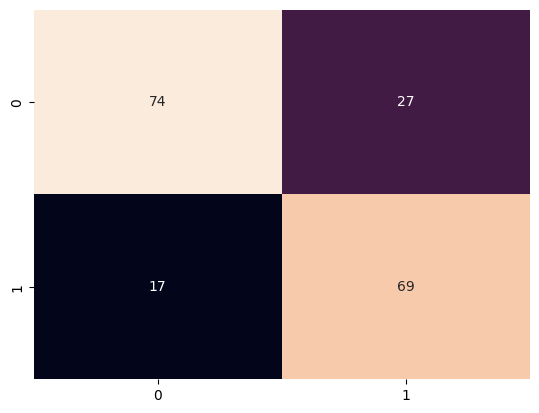

In [ ]:
cm_RandForest_MissForest_SMOTE_scaled = confusion_matrix(y_test_MissForest_SMOTE,pred_RandForest_MissForest_SMOTE_scaled)
sns.heatmap(cm_RandForest_MissForest_SMOTE_scaled, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_SMOTE,pred_RandForest_MissForest_SMOTE_scaled),2))

######Random Forest MissForest Upsampling Scaled

In [ ]:
def objective_RandForest_MissForest_upsampling_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_upsampled_scaled)
    accuracy = accuracy_score(y_test_MissForest_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_upsampling_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_upsampling_scaled.optimize(objective_RandForest_MissForest_upsampling_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_upsampling_scaled = study_RandForest_MissForest_upsampling_scaled.best_trial
print(f'  Value: {trial_RandForest_MissForest_upsampling_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_upsampling_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:24:22,071] A new study created in memory with name: no-name-2e1b5a7a-fe3e-43bc-8a15-1c7ef43f0325
[I 2023-09-24 13:24:22,902] Trial 0 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 500, 'max_depth': 26, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:24:24,953] Trial 1 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 900, 'max_depth': 32, 'min_samples_split': 1.0, 'min_samples_leaf': 0.2}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:24:26,144] Trial 2 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 600, 'max_depth': 12, 'min_samples_split': 0.1, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:24:26,680] Trial 3 finished with value: 0.7486631016042781 and parameters: {'n_estimators': 300, 'max_depth': 12, 'min_samples_split': 0.30000000000000004,

Best trial:
  Value: 0.7861
  Params: 
    n_estimators: 200
    max_depth: 14
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_MissForest_upsampling_scaled = trial_RandForest_MissForest_upsampling_scaled.params  # Get the best hyperparameters
best_model_RandForest_MissForest_upsampling_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_upsampling_scaled['n_estimators'],
    max_depth=best_params_RandForest_MissForest_upsampling_scaled['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_upsampling_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_upsampling_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_upsampling_scaled.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)

RandomForestClassifier(max_depth=14, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=200,
                       random_state=42)

In [ ]:
pred_rf_RandForest_MissForest_upsampling_scaled = best_model_RandForest_MissForest_upsampling_scaled.predict(X_test_MissForest_upsampled_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsampling_scaled))
print(confusion_matrix(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsampling_scaled))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        98
           1       0.76      0.80      0.78        89

    accuracy                           0.79       187
   macro avg       0.79      0.79      0.79       187
weighted avg       0.79      0.79      0.79       187

[[76 22]
 [18 71]]


Accuracy Score =  0.79


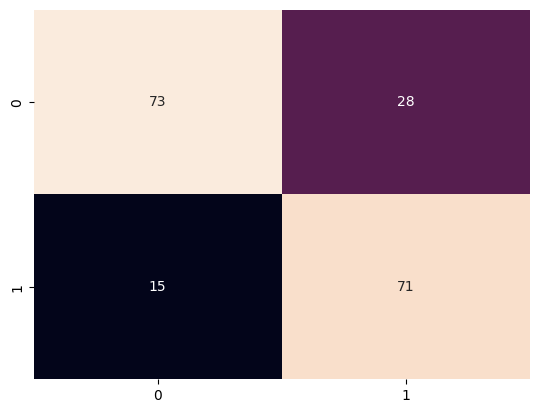

In [ ]:
cm_RandForest_MissForest_upsampling_scaled = confusion_matrix(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsampling_scaled)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsampling_scaled),2))

######Random Forest MissForest Downsampling Scaled

In [ ]:
def objective_RandForest_MissForest_downsampling_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_downsampled_scaled)
    accuracy = accuracy_score(y_test_MissForest_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_downsampling_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_downsampling_scaled.optimize(objective_RandForest_MissForest_downsampling_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_downsampling_scaled = study_RandForest_MissForest_downsampling_scaled.best_trial
print(f'  Value: {trial_RandForest_MissForest_downsampling_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_downsampling_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:25:24,174] A new study created in memory with name: no-name-42ca4d5f-9580-4d38-9a29-5d5b2c750dbb
[I 2023-09-24 13:25:26,409] Trial 0 finished with value: 0.6989247311827957 and parameters: {'n_estimators': 900, 'max_depth': 28, 'min_samples_split': 0.5, 'min_samples_leaf': 0.2}. Best is trial 0 with value: 0.6989247311827957.
[I 2023-09-24 13:25:27,206] Trial 1 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 500, 'max_depth': 28, 'min_samples_split': 0.9, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.6989247311827957.
[I 2023-09-24 13:25:27,381] Trial 2 finished with value: 0.7526881720430108 and parameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 0.5, 'min_samples_leaf': 0.30000000000000004}. Best is trial 2 with value: 0.7526881720430108.
[I 2023-09-24 13:25:27,718] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 0.7000000000000001, 'min_s

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 100
    max_depth: 6
    min_samples_split: 0.5
    min_samples_leaf: 0.30000000000000004


In [ ]:
best_params_RandForest_MissForest_downsampling_scaled = trial_RandForest_MissForest_downsampling_scaled.params  # Get the best hyperparameters
best_model_RandForest_MissForest_downsampling_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_downsampling_scaled['n_estimators'],
    max_depth=best_params_RandForest_MissForest_downsampling_scaled['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_downsampling_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_downsampling_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_downsampling_scaled.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)

RandomForestClassifier(max_depth=6, min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.5, random_state=42)

In [ ]:
pred_rf_RandForest_MissForest_downsampling_scaled = best_model_RandForest_MissForest_downsampling_scaled.predict(X_test_MissForest_downsampled_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_scaled))
print(confusion_matrix(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_scaled))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75        47
           1       0.73      0.78      0.76        46

    accuracy                           0.75        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.75      0.75      0.75        93

[[34 13]
 [10 36]]


Accuracy Score =  0.75


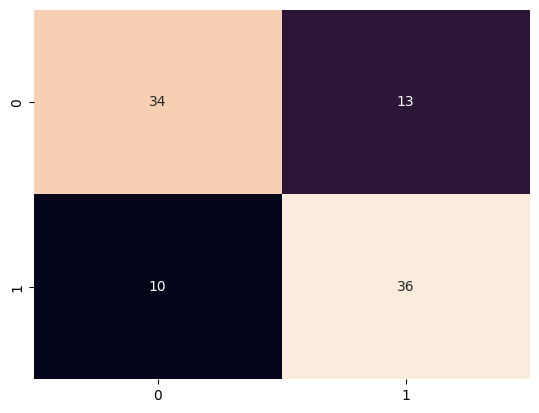

In [ ]:
cm_RandForest_MissForest_downsampling_scaled = confusion_matrix(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_scaled)
sns.heatmap(cm_RandForest_MissForest_downsampling_scaled, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_scaled),2))

######Random Forest KNN Upsampling Scaled

In [ ]:
def objective_RandForest_KNN_Upsampling_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_upsampled_scaled)
    accuracy = accuracy_score(y_test_knn_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_KNN_Upsampling_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_KNN_Upsampling_scaled.optimize(objective_RandForest_KNN_Upsampling_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_KNN_Upsampling_scaled = study_RandForest_KNN_Upsampling_scaled.best_trial
print(f'  Value: {trial_RandForest_KNN_Upsampling_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_KNN_Upsampling_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:26:28,876] A new study created in memory with name: no-name-576e495b-6eea-41cb-8d05-990e98d10333
[I 2023-09-24 13:26:29,564] Trial 0 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 0.9, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:26:29,924] Trial 1 finished with value: 0.7433155080213903 and parameters: {'n_estimators': 200, 'max_depth': 16, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2}. Best is trial 1 with value: 0.7433155080213903.
[I 2023-09-24 13:26:31,422] Trial 2 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 900, 'max_depth': 28, 'min_samples_split': 1.0, 'min_samples_leaf': 0.4}. Best is trial 1 with value: 0.7433155080213903.
[I 2023-09-24 13:26:32,609] Trial 3 finished with value: 0.732620320855615 and parameters: {'n_estimators': 700, 'max_depth': 16, 'min_samples_split': 0.5, 'min_samples_leaf': 0.300000000000

Best trial:
  Value: 0.7701
  Params: 
    n_estimators: 300
    max_depth: 30
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_KNN_Upsampling_scaled = trial_RandForest_KNN_Upsampling_scaled.params  # Get the best hyperparameters
best_model_RandForest_KNN_Upsampling_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_KNN_Upsampling_scaled['n_estimators'],
    max_depth=best_params_RandForest_KNN_Upsampling_scaled['max_depth'],
    min_samples_split=best_params_RandForest_KNN_Upsampling_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_KNN_Upsampling_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_KNN_Upsampling_scaled.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)

RandomForestClassifier(max_depth=30, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=300,
                       random_state=42)

In [ ]:
pred_rf_RandForest_KNN_Upsampling_scaled = best_model_RandForest_KNN_Upsampling_scaled.predict(X_test_knn_upsampled_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_upsampled,pred_rf_RandForest_KNN_Upsampling_scaled))
print(confusion_matrix(y_test_knn_upsampled,pred_rf_RandForest_KNN_Upsampling_scaled))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        98
           1       0.76      0.76      0.76        89

    accuracy                           0.77       187
   macro avg       0.77      0.77      0.77       187
weighted avg       0.77      0.77      0.77       187

[[76 22]
 [21 68]]


Accuracy Score =  0.77


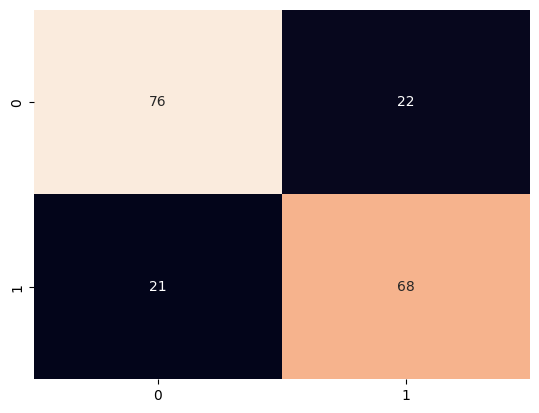

In [ ]:
cm = confusion_matrix(y_test_knn_upsampled,pred_rf_RandForest_KNN_Upsampling_scaled)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_upsampled,pred_rf_RandForest_KNN_Upsampling_scaled),2))

######Random Forest KNN SMOTE Scaled

In [ ]:
def objective_RandForest_KNN_SMOTE_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_SMOTE_scaled)
    accuracy = accuracy_score(y_test_knn_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandForest_KNN_SMOTE_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_KNN_SMOTE_scaled.optimize(objective_RandForest_KNN_SMOTE_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_KNN_SMOTE_scaled = study_RandForest_KNN_SMOTE_scaled.best_trial
print(f'  Value: {trial_RandForest_KNN_SMOTE_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_KNN_SMOTE_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:27:30,563] A new study created in memory with name: no-name-43abec9a-f8f8-4140-b5a3-b8dea4d454ba
[I 2023-09-24 13:27:32,226] Trial 0 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 1000, 'max_depth': 32, 'min_samples_split': 0.6, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.45989304812834225.
[I 2023-09-24 13:27:32,423] Trial 1 finished with value: 0.7433155080213903 and parameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 0.2, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.7433155080213903.
[I 2023-09-24 13:27:33,880] Trial 2 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 900, 'max_depth': 26, 'min_samples_split': 0.5, 'min_samples_leaf': 0.4}. Best is trial 1 with value: 0.7433155080213903.
[I 2023-09-24 13:27:35,024] Trial 3 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 0.1, 'min_samples_leaf': 0.4}. Best i

Best trial:
  Value: 0.7701
  Params: 
    n_estimators: 400
    max_depth: 14
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_KNN_SMOTE_scaled = trial_RandForest_KNN_SMOTE_scaled.params  # Get the best hyperparameters
best_model_RandForest_KNN_SMOTE_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_KNN_SMOTE_scaled['n_estimators'],
    max_depth=best_params_RandForest_KNN_SMOTE_scaled['max_depth'],
    min_samples_split=best_params_RandForest_KNN_SMOTE_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_KNN_SMOTE_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_KNN_SMOTE_scaled.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)

RandomForestClassifier(max_depth=14, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=400,
                       random_state=42)

In [ ]:
pred_rf_RandForest_KNN_SMOTE_scaled = best_model_RandForest_KNN_SMOTE_scaled.predict(X_test_knn_SMOTE_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_scaled))
print(confusion_matrix(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_scaled))

              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       101
         1.0       0.72      0.83      0.77        86

    accuracy                           0.77       187
   macro avg       0.77      0.77      0.77       187
weighted avg       0.78      0.77      0.77       187

[[73 28]
 [15 71]]


Accuracy Score =  0.77


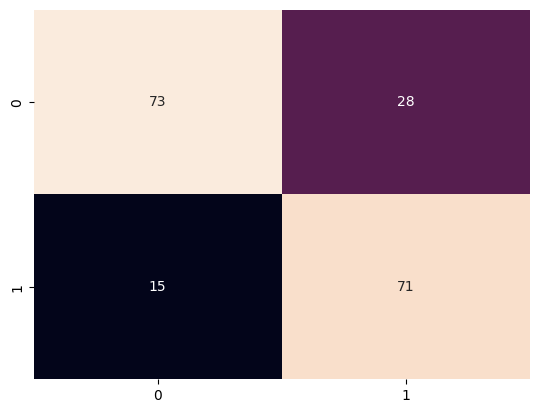

In [ ]:
cm_RandForest_KNN_SMOTE_scaled = confusion_matrix(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_scaled)
sns.heatmap(cm_RandForest_KNN_SMOTE_scaled, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_scaled),2))

######Random Forest KNN Downsampling Scaled

In [ ]:
def objective_RandForest_KNN_downsampling_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_downsampled_scaled)
    accuracy = accuracy_score(y_test_knn_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_KNN_downsampling_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_KNN_downsampling_scaled.optimize(objective_RandForest_KNN_downsampling_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_KNN_downsampling_scaled = study_RandForest_KNN_downsampling_scaled.best_trial
print(f'  Value: {trial_RandForest_KNN_downsampling_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_KNN_downsampling_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:28:35,485] A new study created in memory with name: no-name-6ce1af91-14ad-4b3b-905c-6ed54a65f4f8
[I 2023-09-24 13:28:36,136] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 400, 'max_depth': 26, 'min_samples_split': 0.9, 'min_samples_leaf': 0.30000000000000004}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:28:37,611] Trial 1 finished with value: 0.7419354838709677 and parameters: {'n_estimators': 900, 'max_depth': 14, 'min_samples_split': 0.1, 'min_samples_leaf': 0.30000000000000004}. Best is trial 1 with value: 0.7419354838709677.
[I 2023-09-24 13:28:38,265] Trial 2 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 300, 'max_depth': 8, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.30000000000000004}. Best is trial 1 with value: 0.7419354838709677.
[I 2023-09-24 13:28:39,052] Trial 3 finished with value: 0.7311827956989247 and parameters: {'n_estimators': 300, 'max_depth': 26, 

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 200
    max_depth: 12
    min_samples_split: 0.2
    min_samples_leaf: 0.30000000000000004


In [ ]:
best_params_RandForest_KNN_downsampling_scaled = trial_RandForest_KNN_downsampling_scaled.params  # Get the best hyperparameters
best_model_RandForest_KNN_downsampling_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_KNN_downsampling_scaled['n_estimators'],
    max_depth=best_params_RandForest_KNN_downsampling_scaled['max_depth'],
    min_samples_split=best_params_RandForest_KNN_downsampling_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_KNN_downsampling_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_KNN_downsampling_scaled.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)

RandomForestClassifier(max_depth=12, min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.2, n_estimators=200,
                       random_state=42)

In [ ]:
pred_rf_RandForest_KNN_downsampling_scaled = best_model_RandForest_KNN_downsampling_scaled.predict(X_test_knn_downsampled_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_scaled))
print(confusion_matrix(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_scaled))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75        47
           1       0.73      0.78      0.76        46

    accuracy                           0.75        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.75      0.75      0.75        93

[[34 13]
 [10 36]]


Accuracy Score =  0.75


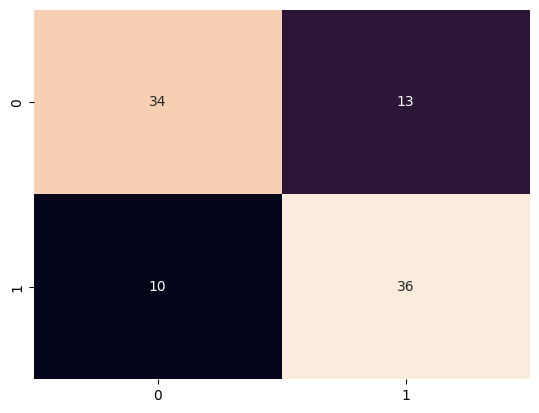

In [ ]:
cm_RandForest_KNN_downsampling_scaled = confusion_matrix(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_scaled)
sns.heatmap(cm_RandForest_KNN_downsampling_scaled, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_scaled),2))

######Random Forest Iterative Upsampling Scaled

In [ ]:
def objective_RandForest_iter_upsampling_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_upsampled_scaled)
    accuracy = accuracy_score(y_test_iter_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_iter_upsampling_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_iter_upsampling_scaled.optimize(objective_RandForest_iter_upsampling_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_iter_upsampling_scaled = study_RandForest_iter_upsampling_scaled.best_trial
print(f'  Value: {trial_RandForest_iter_upsampling_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_iter_upsampling_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:29:37,625] A new study created in memory with name: no-name-22c76b5d-7683-42e5-903a-12abeb53a3bf
[I 2023-09-24 13:29:39,027] Trial 0 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 700, 'max_depth': 28, 'min_samples_split': 0.1, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:29:39,569] Trial 1 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:29:41,451] Trial 2 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:29:42,258] Trial 3 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 0.70

Best trial:
  Value: 0.8128
  Params: 
    n_estimators: 900
    max_depth: 8
    min_samples_split: 0.4
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_iter_upsampling_scaled = trial_RandForest_iter_upsampling_scaled.params  # Get the best hyperparameters
best_model_RandForest_iter_upsampling_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_iter_upsampling_scaled['n_estimators'],
    max_depth=best_params_RandForest_iter_upsampling_scaled['max_depth'],
    min_samples_split=best_params_RandForest_iter_upsampling_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_iter_upsampling_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_iter_upsampling_scaled.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)

RandomForestClassifier(max_depth=8, min_samples_leaf=0.1, min_samples_split=0.4,
                       n_estimators=900, random_state=42)

In [ ]:
pred_rf_RandForest_iter_upsampling_scaled = best_model_RandForest_iter_upsampling_scaled.predict(X_test_iter_upsampled_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_scaled))
print(confusion_matrix(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_scaled))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.78      0.85      0.81        89

    accuracy                           0.81       187
   macro avg       0.81      0.81      0.81       187
weighted avg       0.82      0.81      0.81       187

[[76 22]
 [13 76]]


Accuracy Score =  0.81


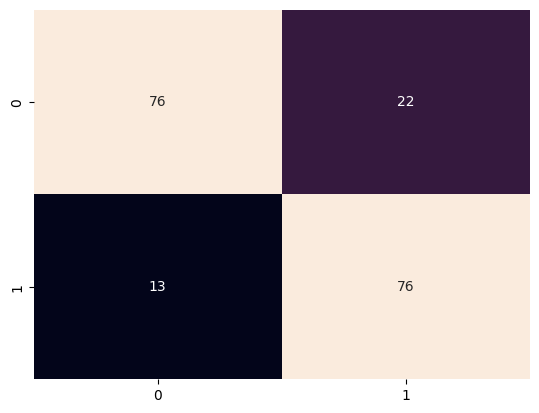

In [ ]:
cm_RandForest_iter_upsampling_scaled = confusion_matrix(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_scaled)
sns.heatmap(cm_RandForest_iter_upsampling_scaled, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_scaled),2))

######Random Forest Iterative SMOTE Scaled

In [ ]:
def objective_RandForest_iter_SMOTE_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_SMOTE_scaled)
    accuracy = accuracy_score(y_test_iter_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandForest_iter_SMOTE_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_iter_SMOTE_scaled.optimize(objective_RandForest_iter_SMOTE_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_iter_SMOTE_scaled = study_RandForest_iter_SMOTE_scaled.best_trial
print(f'  Value: {trial_RandForest_iter_SMOTE_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_iter_SMOTE_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:32:06,185] A new study created in memory with name: no-name-2be9fa34-8cc3-4728-870f-882d54b63634
[I 2023-09-24 13:32:07,125] Trial 0 finished with value: 0.7540106951871658 and parameters: {'n_estimators': 500, 'max_depth': 16, 'min_samples_split': 0.2, 'min_samples_leaf': 0.1}. Best is trial 0 with value: 0.7540106951871658.
[I 2023-09-24 13:32:07,319] Trial 1 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 0.6, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.7540106951871658.
[I 2023-09-24 13:32:07,489] Trial 2 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 100, 'max_depth': 22, 'min_samples_split': 1.0, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.7540106951871658.
[I 2023-09-24 13:32:08,971] Trial 3 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 900, 'max_depth': 12, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf'

Best trial:
  Value: 0.7861
  Params: 
    n_estimators: 500
    max_depth: 8
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_iter_SMOTE_scaled = trial_RandForest_iter_SMOTE_scaled.params  # Get the best hyperparameters
best_model_RandForest_iter_SMOTE_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_iter_SMOTE_scaled['n_estimators'],
    max_depth=best_params_RandForest_iter_SMOTE_scaled['max_depth'],
    min_samples_split=best_params_RandForest_iter_SMOTE_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_iter_SMOTE_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_iter_SMOTE_scaled.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)

RandomForestClassifier(max_depth=8, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=500,
                       random_state=42)

In [ ]:
pred_rf_RandForest_iter_SMOTE_scaled = best_model_RandForest_iter_SMOTE_scaled.predict(X_test_iter_SMOTE_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_scaled))
print(confusion_matrix(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_scaled))

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       101
         1.0       0.73      0.84      0.78        86

    accuracy                           0.79       187
   macro avg       0.79      0.79      0.79       187
weighted avg       0.79      0.79      0.79       187

[[75 26]
 [14 72]]


Accuracy Score =  0.79


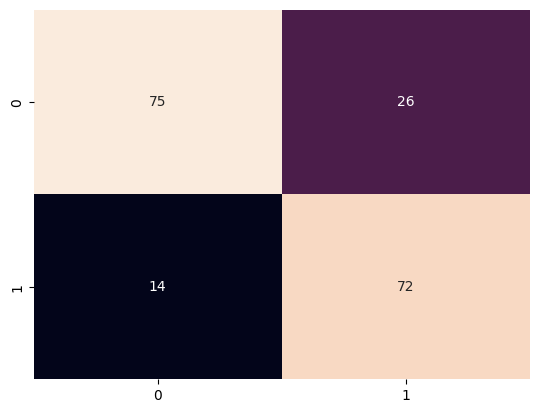

In [ ]:
cm_RandForest_iter_SMOTE_scaled = confusion_matrix(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_scaled)
sns.heatmap(cm_RandForest_iter_SMOTE_scaled, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_scaled),2))

######Random Forest Iterative Downsampling Scaled

In [ ]:
def objective_RandForest_iter_downsapling_scaled(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_downsampled_scaled)
    accuracy = accuracy_score(y_test_iter_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_iter_downsapling_scaled = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_iter_downsapling_scaled.optimize(objective_RandForest_iter_downsapling_scaled, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_iter_downsapling_scaled = study_RandForest_iter_downsapling_scaled.best_trial
print(f'  Value: {trial_RandForest_iter_downsapling_scaled.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_iter_downsapling_scaled.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:33:11,098] A new study created in memory with name: no-name-af2d2480-cff3-4f42-8174-dc6f13d92915
[I 2023-09-24 13:33:12,733] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 1000, 'max_depth': 14, 'min_samples_split': 0.6, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:33:14,192] Trial 1 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 900, 'max_depth': 26, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:33:15,149] Trial 2 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 600, 'max_depth': 24, 'min_samples_split': 0.8, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:33:15,481] Trial 3 finished with value: 0.7419354838709677 and parameters: {'n_estimators': 200, 'max_depth': 22, 'min_samples_split': 0.5, 'min_samples_leaf':

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 600
    max_depth: 30
    min_samples_split: 0.5
    min_samples_leaf: 0.30000000000000004


In [ ]:
best_params_RandForest_iter_downsapling_scaled = trial_RandForest_iter_downsapling_scaled.params  # Get the best hyperparameters
best_model_RandForest_iter_downsapling_scaled = RandomForestClassifier(
    n_estimators=best_params_RandForest_iter_downsapling_scaled['n_estimators'],
    max_depth=best_params_RandForest_iter_downsapling_scaled['max_depth'],
    min_samples_split=best_params_RandForest_iter_downsapling_scaled['min_samples_split'],
    min_samples_leaf=best_params_RandForest_iter_downsapling_scaled['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_iter_downsapling_scaled.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)

RandomForestClassifier(max_depth=30, min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.5, n_estimators=600,
                       random_state=42)

In [ ]:
pred_rf_RandForest_iter_SMOTE_scaled = best_model_RandForest_iter_SMOTE_scaled.predict(X_test_iter_downsampled_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_downsampled,pred_rf_RandForest_iter_SMOTE_scaled))
print(confusion_matrix(y_test_iter_downsampled,pred_rf_RandForest_iter_SMOTE_scaled))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        47
           1       0.70      0.80      0.75        46

    accuracy                           0.73        93
   macro avg       0.74      0.73      0.73        93
weighted avg       0.74      0.73      0.73        93

[[31 16]
 [ 9 37]]


Accuracy Score =  0.73


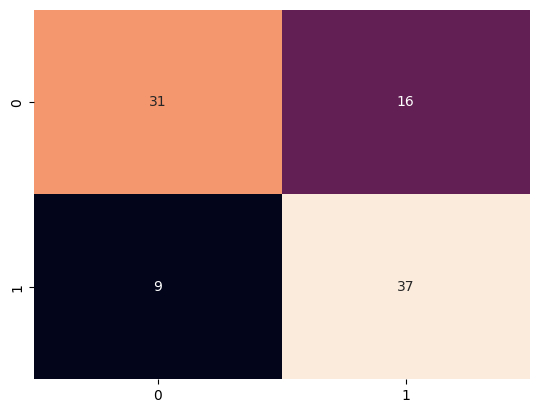

In [ ]:
cm_RandForest_iter_SMOTE_scaled = confusion_matrix(y_test_iter_downsampled,pred_rf_RandForest_iter_SMOTE_scaled)
sns.heatmap(cm_RandForest_iter_SMOTE_scaled, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_downsampled,pred_rf_RandForest_iter_SMOTE_scaled),2))

#####Normal Dataset

######Random Forest MissForest Upsample

In [ ]:
def objective_RandForest_MissForest_Upsampling(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_upsampled)
    accuracy = accuracy_score(y_test_MissForest_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_Upsampling = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_Upsampling.optimize(objective_RandForest_MissForest_Upsampling, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_Upsampling = study_RandForest_MissForest_Upsampling.best_trial
print(f'  Value: {trial_RandForest_MissForest_Upsampling.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_Upsampling.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:34:39,988] A new study created in memory with name: no-name-e111c9f0-a921-4ef0-a7c9-ae7905a1329f
[I 2023-09-24 13:34:40,834] Trial 0 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 500, 'max_depth': 28, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:34:41,032] Trial 1 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 0.8, 'min_samples_leaf': 0.2}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:34:43,528] Trial 2 finished with value: 0.7540106951871658 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2}. Best is trial 2 with value: 0.7540106951871658.
[I 2023-09-24 13:34:45,171] Trial 3 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 1000, 'max_depth': 2, 'min_samples_split': 0.7000000000000001, '

Best trial:
  Value: 0.7861
  Params: 
    n_estimators: 300
    max_depth: 4
    min_samples_split: 0.2
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_MissForest_Upsampling = trial.params  # Get the best hyperparameters
best_model_RandForest_MissForest_Upsampling = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_Upsampling['n_estimators'],
    max_depth=best_params_RandForest_MissForest_Upsampling['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_Upsampling['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_Upsampling['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_Upsampling.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)

RandomForestClassifier(max_depth=18, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, random_state=42)

In [ ]:
pred_rf_params_RandForest_MissForest_Upsampling = best_model_RandForest_MissForest_Upsampling.predict(X_test_MissForest_upsampled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_upsampled,pred_rf_params_RandForest_MissForest_Upsampling))
print(confusion_matrix(y_test_MissForest_upsampled,pred_rf_params_RandForest_MissForest_Upsampling))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        98
           1       0.79      0.75      0.77        89

    accuracy                           0.79       187
   macro avg       0.79      0.78      0.79       187
weighted avg       0.79      0.79      0.79       187

[[80 18]
 [22 67]]


Accuracy Score =  0.79


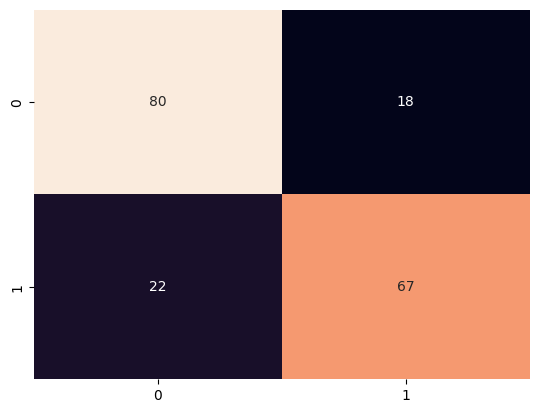

In [ ]:
cm_RandForest_MissForest_Upsampling = confusion_matrix(y_test_MissForest_upsampled,pred_rf_params_RandForest_MissForest_Upsampling)
sns.heatmap(cm_RandForest_MissForest_Upsampling, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_upsampled,pred_rf_params_RandForest_MissForest_Upsampling),2))

###### RandomForest Downsampling

In [ ]:
def objective_RandForest_MissForest_downsampling(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_downsampled)
    accuracy = accuracy_score(y_test_MissForest_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_downsampling = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_downsampling.optimize(objective_RandForest_MissForest_downsampling, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_downsampling = study_RandForest_MissForest_downsampling.best_trial
print(f'  Value: {trial_RandForest_MissForest_downsampling.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_downsampling.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:36:34,749] A new study created in memory with name: no-name-722a62b5-8262-4786-8b20-27f975132ad3
[I 2023-09-24 13:36:35,080] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:36:35,431] Trial 1 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:36:36,750] Trial 2 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 800, 'max_depth': 20, 'min_samples_split': 0.4, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:36:37,236] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 300, 'max_depth': 12, 'min_samples_split': 1.0, 'min_samples_leaf': 0

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 800
    max_depth: 28
    min_samples_split: 0.2
    min_samples_leaf: 0.30000000000000004


In [ ]:
best_params_RandForest_MissForest_downsampling = trial_RandForest_MissForest_downsampling.params  # Get the best hyperparameters
best_model_RandForest_MissForest_downsampling = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_downsampling['n_estimators'],
    max_depth=best_params_RandForest_MissForest_downsampling['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_downsampling['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_downsampling['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_downsampling.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)

RandomForestClassifier(max_depth=28, min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.2, n_estimators=800,
                       random_state=42)

In [ ]:
pred_rf_RandForest_MissForest_downsampling = best_model_RandForest_MissForest_downsampling.predict(X_test_MissForest_downsampled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_downsampled,pred_rf_MissForest_downsampling))
print(confusion_matrix(y_test_MissForest_downsampled,pred_rf_MissForest_downsampling))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70        47
           1       0.69      0.78      0.73        46

    accuracy                           0.72        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.72      0.72      0.72        93

[[31 16]
 [10 36]]


Accuracy Score =  0.75


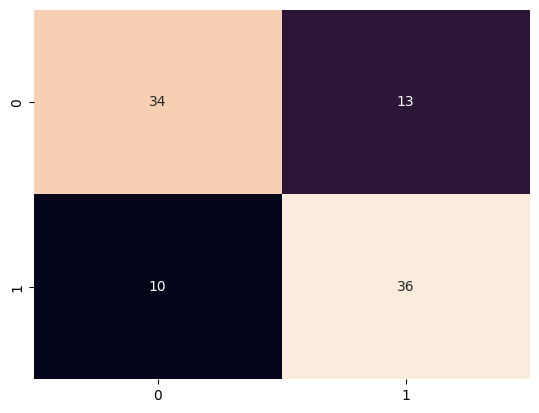

In [ ]:
cm_RandForest_MissForest_downsampling = confusion_matrix(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling)
sns.heatmap(cm_RandForest_MissForest_downsampling, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling),2))

###### RandomForest KNN Upsampled

In [ ]:
def objective_RandForest_KNN_upsampling(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_upsampled, y_train_knn_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_upsampled)
    accuracy = accuracy_score(y_test_knn_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_KNN_upsampling = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_KNN_upsampling.optimize(objective_RandForest_KNN_upsampling, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_KNN_upsampling = study_RandForest_KNN_upsampling.best_trial
print(f'  Value: {trial.value:.4f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:38:40,936] A new study created in memory with name: no-name-b4025229-7600-474b-84e7-85a1c8196955
[I 2023-09-24 13:38:41,982] Trial 0 finished with value: 0.7540106951871658 and parameters: {'n_estimators': 600, 'max_depth': 32, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2}. Best is trial 0 with value: 0.7540106951871658.
[I 2023-09-24 13:38:42,159] Trial 1 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 100, 'max_depth': 12, 'min_samples_split': 0.4, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.7540106951871658.
[I 2023-09-24 13:38:43,038] Trial 2 finished with value: 0.7540106951871658 and parameters: {'n_estimators': 500, 'max_depth': 22, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.2}. Best is trial 0 with value: 0.7540106951871658.
[I 2023-09-24 13:38:44,717] Trial 3 finished with value: 0.732620320855615 and parameters: {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 0.1, 'min_samples_leaf': 0

Best trial:
  Value: 0.7701
  Params: 
    n_estimators: 100
    max_depth: 18
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_KNN_upsampling = trial_RandForest_KNN_upsampling.params  # Get the best hyperparameters
best_model_RandForest_KNN_upsampling = RandomForestClassifier(
    n_estimators=best_params_RandForest_KNN_upsampling['n_estimators'],
    max_depth=best_params_RandForest_KNN_upsampling['max_depth'],
    min_samples_split=best_params_RandForest_KNN_upsampling['min_samples_split'],
    min_samples_leaf=best_params_RandForest_KNN_upsampling['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_KNN_upsampling.fit(X_train_knn_upsampled, y_train_knn_upsampled)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=1000, random_state=42)

In [ ]:
pred_rf_model_RandForest_KNN_upsampling = best_model_RandForest_KNN_upsampling.predict(X_test_knn_upsampled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_upsampled,pred_rf_model_RandForest_KNN_upsampling))
print(confusion_matrix(y_test_knn_upsampled,pred_rf_model_RandForest_KNN_upsampling))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        98
           1       0.74      0.80      0.77        89

    accuracy                           0.77       187
   macro avg       0.77      0.77      0.77       187
weighted avg       0.77      0.77      0.77       187

[[73 25]
 [18 71]]


Accuracy Score =  0.77


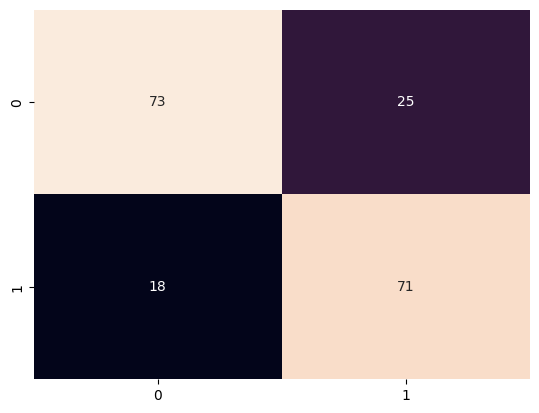

In [ ]:
cm_RandForest_KNN_upsampling = confusion_matrix(y_test_knn_upsampled,pred_rf_model_RandForest_KNN_upsampling)
sns.heatmap(cm_RandForest_KNN_upsampling, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_upsampled,pred_rf_model_RandForest_KNN_upsampling),2))

###### RandomForest KNN SMOTE

In [ ]:
def objective_RandomForest_KNN_SMOTE(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_SMOTE)
    accuracy = accuracy_score(y_test_knn_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandomForest_KNN_SMOTE = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandomForest_KNN_SMOTE.optimize(objective_RandomForest_KNN_SMOTE, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandomForest_KNN_SMOTE = study_RandomForest_KNN_SMOTE.best_trial
print(f'  Value: {trial_RandomForest_KNN_SMOTE.value:.4f}')
print('  Params: ')
for key, value in trial_RandomForest_KNN_SMOTE.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:41:06,828] A new study created in memory with name: no-name-ebbdd508-8290-47af-b03d-582ca8b7461f
[I 2023-09-24 13:41:07,373] Trial 0 finished with value: 0.7433155080213903 and parameters: {'n_estimators': 300, 'max_depth': 12, 'min_samples_split': 0.2, 'min_samples_leaf': 0.2}. Best is trial 0 with value: 0.7433155080213903.
[I 2023-09-24 13:41:08,816] Trial 1 finished with value: 0.7647058823529411 and parameters: {'n_estimators': 700, 'max_depth': 12, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.7647058823529411.
[I 2023-09-24 13:41:09,117] Trial 2 finished with value: 0.7433155080213903 and parameters: {'n_estimators': 100, 'max_depth': 18, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.7647058823529411.
[I 2023-09-24 13:41:10,949] Trial 3 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 800, 'max_depth': 22, 'min_samples_split': 0.7000000000000001, 'min

Best trial:
  Value: 0.7807
  Params: 
    n_estimators: 600
    max_depth: 20
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandomForest_KNN_SMOTE = trial_RandomForest_KNN_SMOTE.params  # Get the best hyperparameters
best_model_RandomForest_KNN_SMOTE = RandomForestClassifier(
    n_estimators=best_params_RandomForest_KNN_SMOTE['n_estimators'],
    max_depth=best_params_RandomForest_KNN_SMOTE['max_depth'],
    min_samples_split=best_params_RandomForest_KNN_SMOTE['min_samples_split'],
    min_samples_leaf=best_params_RandomForest_KNN_SMOTE['min_samples_leaf'],
    random_state=42
)
best_model_RandomForest_KNN_SMOTE.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)

RandomForestClassifier(max_depth=20, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=600,
                       random_state=42)

In [ ]:
pred_rf_RandomForest_KNN_SMOTE = best_model_RandomForest_KNN_SMOTE.predict(X_test_knn_SMOTE)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_SMOTE,pred_rf_RandomForest_KNN_SMOTE))
print(confusion_matrix(y_test_knn_SMOTE,pred_rf_RandomForest_KNN_SMOTE))

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.79       101
         1.0       0.73      0.83      0.78        86

    accuracy                           0.78       187
   macro avg       0.78      0.78      0.78       187
weighted avg       0.79      0.78      0.78       187

[[75 26]
 [15 71]]


Accuracy Score =  0.78


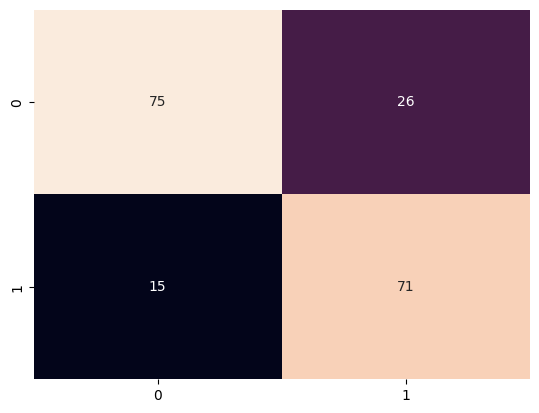

In [ ]:
cm_RandomForest_KNN_SMOTE = confusion_matrix(y_test_knn_SMOTE,pred_rf_RandomForest_KNN_SMOTE)
sns.heatmap(cm_RandomForest_KNN_SMOTE, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_SMOTE,pred_rf_RandomForest_KNN_SMOTE),2))

###### RandomForest KNN Downsampling

In [ ]:
def objective_RandomForest_KNN_downsampling(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_downsampled, y_train_knn_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_downsampled)
    accuracy = accuracy_score(y_test_knn_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandomForest_KNN_downsampling = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandomForest_KNN_downsampling.optimize(objective_RandomForest_KNN_downsampling, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandomForest_KNN_downsampling = study_RandomForest_KNN_downsampling.best_trial
print(f'  Value: {trial_RandomForest_KNN_downsampling.value:.4f}')
print('  Params: ')
for key, value in trial_RandomForest_KNN_downsampling.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:42:35,077] A new study created in memory with name: no-name-70f0606e-42a0-48ec-a91b-d4b8c6754f39
[I 2023-09-24 13:42:35,838] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:42:36,475] Trial 1 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 400, 'max_depth': 32, 'min_samples_split': 0.4, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:42:36,980] Trial 2 finished with value: 0.7419354838709677 and parameters: {'n_estimators': 300, 'max_depth': 6, 'min_samples_split': 0.5, 'min_samples_leaf': 0.30000000000000004}. Best is trial 2 with value: 0.7419354838709677.
[I 2023-09-24 13:42:37,786] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 1.0, 'min_sa

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 700
    max_depth: 14
    min_samples_split: 0.1
    min_samples_leaf: 0.30000000000000004


In [ ]:
best_params_RandomForest_KNN_downsampling = trial.params  # Get the best hyperparameters
best_model_RandomForest_KNN_downsampling = RandomForestClassifier(
    n_estimators=best_params_RandomForest_KNN_downsampling['n_estimators'],
    max_depth=best_params_RandomForest_KNN_downsampling['max_depth'],
    min_samples_split=best_params_RandomForest_KNN_downsampling['min_samples_split'],
    min_samples_leaf=best_params_RandomForest_KNN_downsampling['min_samples_leaf'],
    random_state=42
)
best_model_RandomForest_KNN_downsampling.fit(X_train_knn_downsampled, y_train_knn_downsampled)

RandomForestClassifier(max_depth=18, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, random_state=42)

In [ ]:
pred_rf_params_RandomForest_KNN_downsampling = best_model_RandomForest_KNN_downsampling.predict(X_test_knn_downsampled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_downsampled,pred_rf_params_RandomForest_KNN_downsampling))
print(confusion_matrix(y_test_knn_downsampled,pred_rf_params_RandomForest_KNN_downsampling))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73        47
           1       0.71      0.76      0.74        46

    accuracy                           0.73        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.73      0.73      0.73        93

[[33 14]
 [11 35]]


Accuracy Score =  0.73


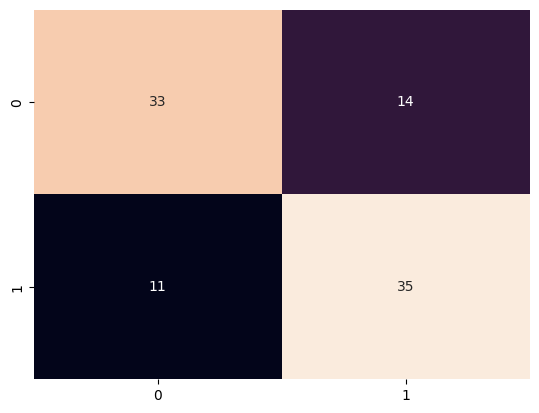

In [ ]:
cm_RandomForest_KNN_downsampling = confusion_matrix(y_test_knn_downsampled,pred_rf_params_RandomForest_KNN_downsampling)
sns.heatmap(cm_RandomForest_KNN_downsampling, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_downsampled,pred_rf_params_RandomForest_KNN_downsampling),2))

###### RandomForest Iterative Upsampling

In [ ]:
def objective_RandomForest_iter_upsampling(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_upsampled, y_train_iter_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_upsampled)
    accuracy = accuracy_score(y_test_iter_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandomForest_iter_upsampling = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandomForest_iter_upsampling.optimize(objective_RandomForest_iter_upsampling, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandomForest_iter_upsampling = study_RandomForest_iter_upsampling.best_trial
print(f'  Value: {trial_RandomForest_iter_upsampling.value:.4f}')
print('  Params: ')
for key, value in trial_RandomForest_iter_upsampling.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:44:31,950] A new study created in memory with name: no-name-97d9f80f-5dc0-4a32-95e5-9d9eabc3f62a
[I 2023-09-24 13:44:32,128] Trial 0 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 100, 'max_depth': 22, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:44:32,309] Trial 1 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 0.2, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:44:33,756] Trial 2 finished with value: 0.7914438502673797 and parameters: {'n_estimators': 800, 'max_depth': 16, 'min_samples_split': 0.2, 'min_samples_leaf': 0.1}. Best is trial 2 with value: 0.7914438502673797.
[I 2023-09-24 13:44:34,586] Trial 3 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 0.4, 'min_samples_leaf

Best trial:
  Value: 0.8128
  Params: 
    n_estimators: 900
    max_depth: 10
    min_samples_split: 0.4
    min_samples_leaf: 0.1


In [ ]:
best_params_RandomForest_iter_upsampling = trial_RandomForest_iter_upsampling.params  # Get the best hyperparameters
best_model_RandomForest_iter_upsampling = RandomForestClassifier(
    n_estimators=best_params_RandomForest_iter_upsampling['n_estimators'],
    max_depth=best_params_RandomForest_iter_upsampling['max_depth'],
    min_samples_split=best_params_RandomForest_iter_upsampling['min_samples_split'],
    min_samples_leaf=best_params_RandomForest_iter_upsampling['min_samples_leaf'],
    random_state=42
)
best_model_RandomForest_iter_upsampling.fit(X_train_iter_upsampled, y_train_iter_upsampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=0.1,
                       min_samples_split=0.4, n_estimators=900,
                       random_state=42)

In [ ]:
pred_rf_RandomForest_iter_upsampling = best_model_RandomForest_iter_upsampling.predict(X_test_iter_upsampled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_upsampled,pred_rf_RandomForest_iter_upsampling))
print(confusion_matrix(y_test_iter_upsampled,pred_rf_RandomForest_iter_upsampling))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.78      0.85      0.81        89

    accuracy                           0.81       187
   macro avg       0.81      0.81      0.81       187
weighted avg       0.82      0.81      0.81       187

[[76 22]
 [13 76]]


Accuracy Score =  0.81


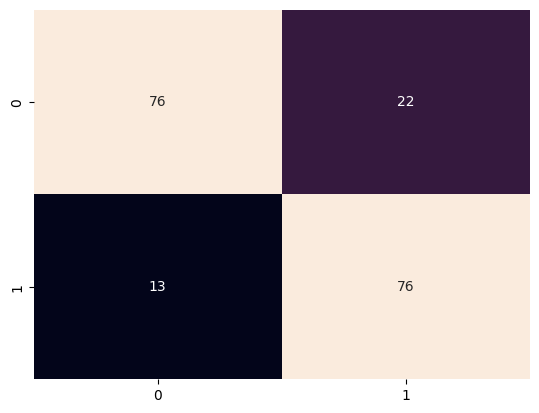

In [ ]:
cm_RandomForest_iter_upsampling = confusion_matrix(y_test_iter_upsampled,pred_rf_RandomForest_iter_upsampling)
sns.heatmap(cm_RandomForest_iter_upsampling, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_upsampled,pred_rf_RandomForest_iter_upsampling),2))

###### RandomForest Iterative SMOTE

In [ ]:
def objective_RandomForest_iter_SMOTE(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_SMOTE)
    accuracy = accuracy_score(y_test_iter_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandomForest_iter_SMOTE = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandomForest_iter_SMOTE.optimize(objective_RandomForest_iter_SMOTE, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandomForest_iter_SMOTE = study_RandomForest_iter_SMOTE.best_trial
print(f'  Value: {trial_RandomForest_iter_SMOTE.value:.4f}')
print('  Params: ')
for key, value in trial_RandomForest_iter_SMOTE.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:46:52,914] A new study created in memory with name: no-name-db41a243-c7d8-41a0-9a14-0d0606973dbe
[I 2023-09-24 13:46:53,639] Trial 0 finished with value: 0.7486631016042781 and parameters: {'n_estimators': 400, 'max_depth': 16, 'min_samples_split': 0.4, 'min_samples_leaf': 0.1}. Best is trial 0 with value: 0.7486631016042781.
[I 2023-09-24 13:46:54,318] Trial 1 finished with value: 0.7219251336898396 and parameters: {'n_estimators': 400, 'max_depth': 16, 'min_samples_split': 0.6, 'min_samples_leaf': 0.1}. Best is trial 0 with value: 0.7486631016042781.
[I 2023-09-24 13:46:55,207] Trial 2 finished with value: 0.7272727272727273 and parameters: {'n_estimators': 500, 'max_depth': 12, 'min_samples_split': 0.6, 'min_samples_leaf': 0.1}. Best is trial 0 with value: 0.7486631016042781.
[I 2023-09-24 13:46:56,040] Trial 3 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 500, 'max_depth': 22, 'min_samples_split': 1.0, 'min_samples_leaf': 0.2}. Best is t

Best trial:
  Value: 0.7807
  Params: 
    n_estimators: 400
    max_depth: 22
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandomForest_iter_SMOTE = trial_RandomForest_iter_SMOTE.params  # Get the best hyperparameters
best_model_RandomForest_iter_SMOTE = RandomForestClassifier(
    n_estimators=best_params_RandomForest_iter_SMOTE['n_estimators'],
    max_depth=best_params_RandomForest_iter_SMOTE['max_depth'],
    min_samples_split=best_params_RandomForest_iter_SMOTE['min_samples_split'],
    min_samples_leaf=best_params_RandomForest_iter_SMOTE['min_samples_leaf'],
    random_state=42
)
best_model_RandomForest_iter_SMOTE.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)

RandomForestClassifier(max_depth=22, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=400,
                       random_state=42)

In [ ]:
pred_rf_RandomForest_iter_SMOTE = best_model_RandomForest_iter_SMOTE.predict(X_test_iter_SMOTE)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_SMOTE,pred_rf_RandomForest_iter_SMOTE))
print(confusion_matrix(y_test_iter_SMOTE,pred_rf_RandomForest_iter_SMOTE))

              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       101
         1.0       0.72      0.85      0.78        86

    accuracy                           0.78       187
   macro avg       0.79      0.79      0.78       187
weighted avg       0.79      0.78      0.78       187

[[73 28]
 [13 73]]


Accuracy Score =  0.78


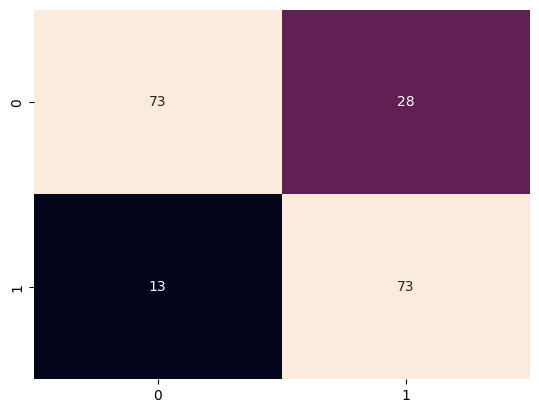

In [ ]:
cm_RandomForest_iter_SMOTE = confusion_matrix(y_test_iter_SMOTE,pred_rf_RandomForest_iter_SMOTE)
sns.heatmap(cm_RandomForest_iter_SMOTE, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_SMOTE,pred_rf_RandomForest_iter_SMOTE),2))

###### RandomForest Iterative Downsampling

In [ ]:
def objective_RandomForest_iter_downsampling(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_downsampled, y_train_iter_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_downsampled)
    accuracy = accuracy_score(y_test_iter_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandomForest_iter_downsampling = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandomForest_iter_downsampling.optimize(objective_RandomForest_iter_downsampling, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandomForest_iter_downsampling = study_RandomForest_iter_downsampling.best_trial
print(f'  Value: {trial_RandomForest_iter_downsampling.value:.4f}')
print('  Params: ')
for key, value in trial_RandomForest_iter_downsampling.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:49:01,014] A new study created in memory with name: no-name-9274971d-ec61-4bba-84b9-1f0be0efccc1
[I 2023-09-24 13:49:02,322] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 500, 'max_depth': 28, 'min_samples_split': 0.2, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:49:02,607] Trial 1 finished with value: 0.7419354838709677 and parameters: {'n_estimators': 100, 'max_depth': 12, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2}. Best is trial 1 with value: 0.7419354838709677.
[I 2023-09-24 13:49:02,879] Trial 2 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 0.8, 'min_samples_leaf': 0.4}. Best is trial 1 with value: 0.7419354838709677.
[I 2023-09-24 13:49:03,794] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 0.8, 'min_samples_leaf': 0.1}. Best is tri

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 800
    max_depth: 32
    min_samples_split: 0.2
    min_samples_leaf: 0.30000000000000004


In [ ]:
best_params_RandomForest_iter_downsampling = trial_RandomForest_iter_downsampling.params  # Get the best hyperparameters
best_model_RandomForest_iter_downsampling = RandomForestClassifier(
    n_estimators=best_params_RandomForest_iter_downsampling['n_estimators'],
    max_depth=best_params_RandomForest_iter_downsampling['max_depth'],
    min_samples_split=best_params_RandomForest_iter_downsampling['min_samples_split'],
    min_samples_leaf=best_params_RandomForest_iter_downsampling['min_samples_leaf'],
    random_state=42
)
best_model_RandomForest_iter_downsampling.fit(X_train_iter_downsampled, y_train_iter_downsampled)

RandomForestClassifier(max_depth=32, min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.2, n_estimators=800,
                       random_state=42)

In [ ]:
pred_rf_RandomForest_iter_downsampling = best_model_RandomForest_iter_downsampling.predict(X_test_iter_downsampled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_downsampled,pred_rf_RandomForest_iter_downsampling))
print(confusion_matrix(y_test_iter_downsampled,pred_rf_RandomForest_iter_downsampling))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75        47
           1       0.73      0.78      0.76        46

    accuracy                           0.75        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.75      0.75      0.75        93

[[34 13]
 [10 36]]


Accuracy Score =  0.75


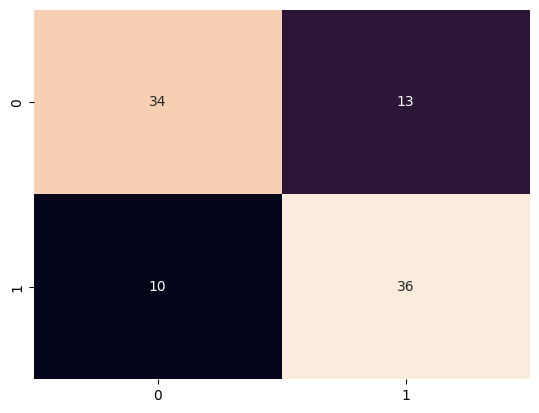

In [ ]:
cm_RandomForest_iter_downsampling = confusion_matrix(y_test_iter_downsampled,pred_rf_RandomForest_iter_downsampling)
sns.heatmap(cm_RandomForest_iter_downsampling, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_downsampled,pred_rf_RandomForest_iter_downsampling),2))

###### RandomForest MissForest SMOTE

In [ ]:
def objective_MissForest_RandForest_SMOTE(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_SMOTE)
    accuracy = accuracy_score(y_test_MissForest_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandomForest_iter_downsampling = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandomForest_iter_downsampling.optimize(objective_RandomForest_iter_downsampling, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandomForest_iter_downsampling = study_RandomForest_iter_downsampling.best_trial
print(f'  Value: {trial_RandomForest_iter_downsampling.value:.4f}')
print('  Params: ')
for key, value in trial_RandomForest_iter_downsampling.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:51:07,752] A new study created in memory with name: no-name-8681c7f6-cb97-41e6-8afe-0c2a73fb198b
[I 2023-09-24 13:51:08,079] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 0.8, 'min_samples_leaf': 0.30000000000000004}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:51:08,251] Trial 1 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 0.6, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:51:08,433] Trial 2 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 100, 'max_depth': 16, 'min_samples_split': 0.9, 'min_samples_leaf': 0.30000000000000004}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:51:09,247] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 0.3000000

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 100
    max_depth: 12
    min_samples_split: 0.5
    min_samples_leaf: 0.1


In [ ]:
study_MissForest_RandForest_SMOTE = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_MissForest_RandForest_SMOTE.optimize(objective_MissForest_RandForest_SMOTE, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_MissForest_RandForest_SMOTE = study_MissForest_RandForest_SMOTE.best_trial
print(f'  Value: {trial_MissForest_RandForest_SMOTE.value:.4f}')
print('  Params: ')
for key, value in trial_MissForest_RandForest_SMOTE.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:52:13,162] A new study created in memory with name: no-name-74953ba5-53a8-401e-aae3-e25c9ec63984
[I 2023-09-24 13:52:13,979] Trial 0 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 500, 'max_depth': 12, 'min_samples_split': 1.0, 'min_samples_leaf': 0.1}. Best is trial 0 with value: 0.45989304812834225.
[I 2023-09-24 13:52:14,519] Trial 1 finished with value: 0.7112299465240641 and parameters: {'n_estimators': 300, 'max_depth': 8, 'min_samples_split': 0.6, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.7112299465240641.
[I 2023-09-24 13:52:14,711] Trial 2 finished with value: 0.7379679144385026 and parameters: {'n_estimators': 100, 'max_depth': 12, 'min_samples_split': 0.4, 'min_samples_leaf': 0.30000000000000004}. Best is trial 2 with value: 0.7379679144385026.
[I 2023-09-24 13:52:17,004] Trial 3 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 900, 'max_depth': 28, 'min_samples_split': 0.9, 'min_samples_leaf'

Best trial:
  Value: 0.7647
  Params: 
    n_estimators: 700
    max_depth: 30
    min_samples_split: 0.2
    min_samples_leaf: 0.1


In [ ]:
best_params_MissForest_RandForest_SMOTE = trial_MissForest_RandForest_SMOTE.params  # Get the best hyperparameters
best_model_MissForest_RandForest_SMOTE = RandomForestClassifier(
    n_estimators = best_params_MissForest_RandForest_SMOTE['n_estimators'],
    max_depth = best_params_MissForest_RandForest_SMOTE['max_depth'],
    min_samples_split = best_params_MissForest_RandForest_SMOTE['min_samples_split'],
    min_samples_leaf = best_params_MissForest_RandForest_SMOTE['min_samples_leaf'],
    random_state=42
)
best_model_MissForest_RandForest_SMOTE.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)

RandomForestClassifier(max_depth=30, min_samples_leaf=0.1,
                       min_samples_split=0.2, n_estimators=700,
                       random_state=42)

In [ ]:
pred_rf_MissForest_RandForest_SMOTE = best_model_MissForest_RandForest_SMOTE.predict(X_test_MissForest_SMOTE)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_SMOTE,pred_rf_MissForest_RandForest_SMOTE))
print(confusion_matrix(y_test_MissForest_SMOTE,pred_rf_MissForest_RandForest_SMOTE))

              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77       101
         1.0       0.72      0.80      0.76        86

    accuracy                           0.76       187
   macro avg       0.77      0.77      0.76       187
weighted avg       0.77      0.76      0.77       187

[[74 27]
 [17 69]]


Accuracy Score =  0.76


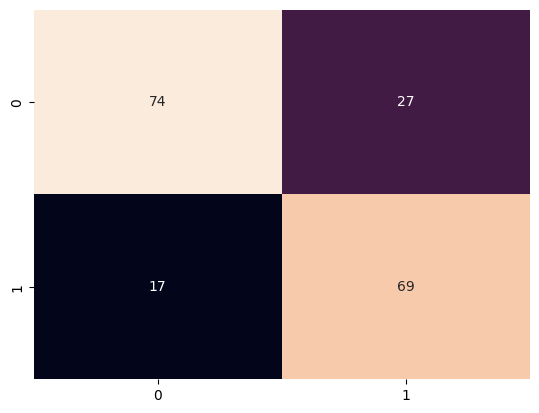

In [ ]:
cm_MissForest_RandForest_SMOTE = confusion_matrix(y_test_MissForest_SMOTE,pred_rf_MissForest_RandForest_SMOTE)
sns.heatmap(cm_MissForest_RandForest_SMOTE, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_SMOTE,pred_rf_MissForest_RandForest_SMOTE),2))

#####Encoded Dataset

###### RandomForest MissForest Upsampling Encoded

In [ ]:
def objective_RandForest_MissForest_upsmpling_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_upsampled_encoded)
    accuracy = accuracy_score(y_test_MissForest_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_upsmpling_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_upsmpling_encoded.optimize(objective_RandForest_MissForest_upsmpling_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_upsmpling_encoded = study_RandForest_MissForest_upsmpling_encoded.best_trial
print(f'  Value: {trial_RandForest_MissForest_upsmpling_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_upsmpling_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:53:27,758] A new study created in memory with name: no-name-a38fc29d-fa61-4376-b211-bda43ff04c54
[I 2023-09-24 13:53:28,304] Trial 0 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 1.0, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:53:29,349] Trial 1 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 400, 'max_depth': 22, 'min_samples_split': 0.6, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:53:30,185] Trial 2 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 400, 'max_depth': 14, 'min_samples_split': 0.8, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 13:53:31,649] Trial 3 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 900, 'max_depth': 16, 'min_samples_split': 0.2, 'min_samples_leaf': 0.4}. Best

Best trial:
  Value: 0.8128
  Params: 
    n_estimators: 700
    max_depth: 2
    min_samples_split: 0.4
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_MissForest_upsmpling_encoded = trial_RandForest_MissForest_upsmpling_encoded.params  # Get the best hyperparameters
best_model_RandForest_MissForest_upsmpling_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_upsmpling_encoded['n_estimators'],
    max_depth=best_params_RandForest_MissForest_upsmpling_encoded['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_upsmpling_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_upsmpling_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_upsmpling_encoded.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, min_samples_split=0.4,
                       n_estimators=700, random_state=42)

In [ ]:
pred_rf_RandForest_MissForest_upsmpling_encoded = best_model_RandForest_MissForest_upsmpling_encoded.predict(X_test_MissForest_upsampled_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsmpling_encoded))
print(confusion_matrix(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsmpling_encoded))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        98
           1       0.79      0.83      0.81        89

    accuracy                           0.81       187
   macro avg       0.81      0.81      0.81       187
weighted avg       0.81      0.81      0.81       187

[[78 20]
 [15 74]]


Accuracy Score =  0.81


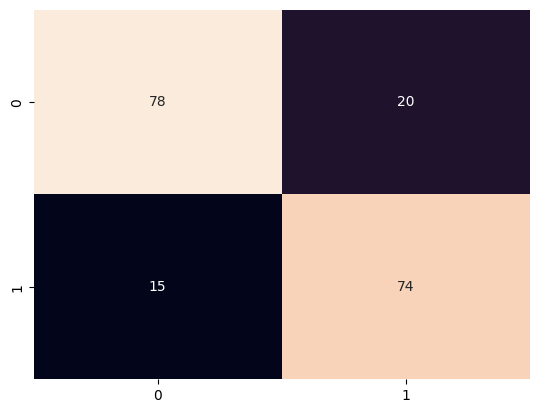

In [ ]:
cm_RandForest_MissForest_upsmpling_encoded = confusion_matrix(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsmpling_encoded)
sns.heatmap(cm_RandForest_MissForest_upsmpling_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_upsampled,pred_rf_RandForest_MissForest_upsmpling_encoded),2))

###### RandomForest MissForest SMOTE Encoded

In [ ]:
def objective_RandForest_MissForest_SMOTE_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_SMOTE_encoded)
    accuracy = accuracy_score(y_test_MissForest_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_SMOTE_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_SMOTE_encoded.optimize(objective_RandForest_MissForest_SMOTE_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_SMOTE_encoded = study_RandForest_MissForest_SMOTE_encoded.best_trial
print(f'  Value: {trial_RandForest_MissForest_SMOTE_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_SMOTE_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:55:34,721] A new study created in memory with name: no-name-e5fb8816-cd06-48a1-8fb9-55be5931090d
[I 2023-09-24 13:55:36,322] Trial 0 finished with value: 0.7165775401069518 and parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 0.4, 'min_samples_leaf': 0.1}. Best is trial 0 with value: 0.7165775401069518.
[I 2023-09-24 13:55:37,473] Trial 1 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 700, 'max_depth': 26, 'min_samples_split': 0.8, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.7165775401069518.
[I 2023-09-24 13:55:37,655] Trial 2 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.7165775401069518.
[I 2023-09-24 13:55:39,305] Trial 3 finished with value: 0.6898395721925134 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 0.30000000000000004, 'm

Best trial:
  Value: 0.7433
  Params: 
    n_estimators: 200
    max_depth: 30
    min_samples_split: 0.4
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_MissForest_SMOTE_encoded = trial_RandForest_MissForest_SMOTE_encoded.params  # Get the best hyperparameters
best_model_RandForest_MissForest_SMOTE_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_SMOTE_encoded['n_estimators'],
    max_depth=best_params_RandForest_MissForest_SMOTE_encoded['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_SMOTE_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_SMOTE_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_SMOTE_encoded.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)

RandomForestClassifier(max_depth=30, min_samples_leaf=0.1,
                       min_samples_split=0.4, n_estimators=200,
                       random_state=42)

In [ ]:
pred_rf_RandForest_MissForest_SMOTE_encoded = best_model_RandForest_MissForest_SMOTE_encoded.predict(X_test_MissForest_SMOTE_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_SMOTE,pred_rf_RandForest_MissForest_SMOTE_encoded))
print(confusion_matrix(y_test_MissForest_SMOTE,pred_rf_RandForest_MissForest_SMOTE_encoded))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76       101
         1.0       0.71      0.76      0.73        86

    accuracy                           0.74       187
   macro avg       0.74      0.74      0.74       187
weighted avg       0.75      0.74      0.74       187

[[74 27]
 [21 65]]


Accuracy Score =  0.74


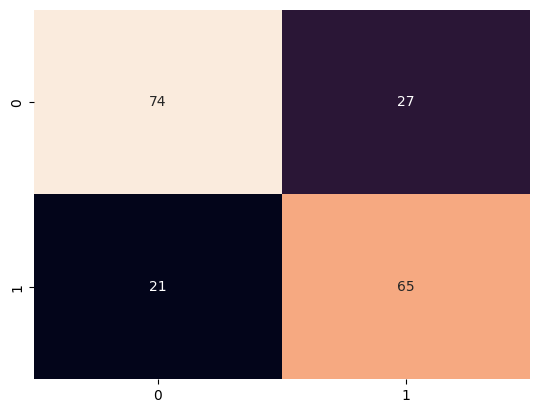

In [ ]:
cm_RandForest_MissForest_SMOTE_encoded = confusion_matrix(y_test_MissForest_SMOTE,pred_rf_RandForest_MissForest_SMOTE_encoded)
sns.heatmap(cm_RandForest_MissForest_SMOTE_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_SMOTE,pred_rf_RandForest_MissForest_SMOTE_encoded),2))

###### RandomForest MissForest Downsampling Encoded

In [ ]:
def objective_RandForest_MissForest_downsampling_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_MissForest_downsampled_encoded)
    accuracy = accuracy_score(y_test_MissForest_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_MissForest_downsampling_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_MissForest_downsampling_encoded.optimize(objective_RandForest_MissForest_downsampling_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_MissForest_downsampling_encoded = study_RandForest_MissForest_downsampling_encoded.best_trial
print(f'  Value: {trial_RandForest_MissForest_downsampling_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_MissForest_downsampling_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:56:48,908] A new study created in memory with name: no-name-edfe788c-e231-4b20-a755-d70ba361683e
[I 2023-09-24 13:56:49,598] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:56:50,595] Trial 1 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 600, 'max_depth': 26, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:56:50,911] Trial 2 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 0.2, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 13:56:52,194] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 800, 'max_depth': 2, 'min_samples_split': 0.1, 'min_sam

Best trial:
  Value: 0.7312
  Params: 
    n_estimators: 300
    max_depth: 20
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_MissForest_downsampling_encoded = trial_RandForest_MissForest_downsampling_encoded.params  # Get the best hyperparameters
best_model_RandForest_MissForest_downsampling_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_MissForest_downsampling_encoded['n_estimators'],
    max_depth=best_params_RandForest_MissForest_downsampling_encoded['max_depth'],
    min_samples_split=best_params_RandForest_MissForest_downsampling_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_MissForest_downsampling_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_MissForest_downsampling_encoded.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)

RandomForestClassifier(max_depth=20, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=300,
                       random_state=42)

In [ ]:
pred_rf_RandForest_MissForest_downsampling_encoded = best_model_RandForest_MissForest_downsampling_encoded.predict(X_test_MissForest_downsampled_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_encoded))
print(confusion_matrix(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_encoded))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        47
           1       0.71      0.78      0.74        46

    accuracy                           0.73        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.73      0.73      0.73        93

[[32 15]
 [10 36]]


Accuracy Score =  0.73


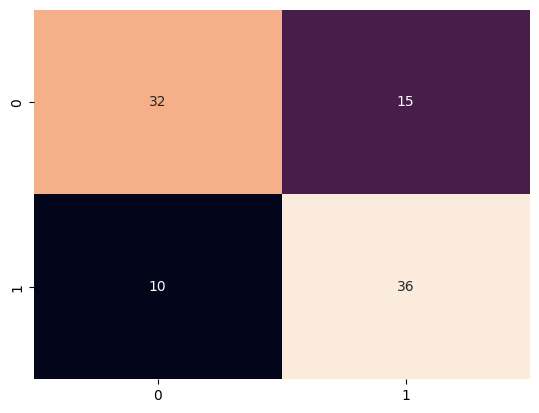

In [ ]:
cm_RandForest_MissForest_downsampling_encoded = confusion_matrix(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_encoded)
sns.heatmap(cm_RandForest_MissForest_downsampling_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_MissForest_downsampled,pred_rf_RandForest_MissForest_downsampling_encoded),2))

###### RandomForest KNN Upsampling Encoded

In [ ]:
def objective_RandForest_KNN_upsampling_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_upsampled_encoded)
    accuracy = accuracy_score(y_test_knn_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_KNN_upsampling_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_KNN_upsampling_encoded.optimize(objective_RandForest_KNN_upsampling_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_KNN_upsampling_encoded = study_RandForest_KNN_upsampling_encoded.best_trial
print(f'  Value: {trial_RandForest_KNN_upsampling_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_KNN_upsampling_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:57:58,489] A new study created in memory with name: no-name-3f6bc360-9fb6-42a4-bf5f-0a3e6a072f80
[I 2023-09-24 13:57:58,836] Trial 0 finished with value: 0.7433155080213903 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.30000000000000004}. Best is trial 0 with value: 0.7433155080213903.
[I 2023-09-24 13:58:00,537] Trial 1 finished with value: 0.7647058823529411 and parameters: {'n_estimators': 1000, 'max_depth': 24, 'min_samples_split': 0.1, 'min_samples_leaf': 0.30000000000000004}. Best is trial 1 with value: 0.7647058823529411.
[I 2023-09-24 13:58:01,406] Trial 2 finished with value: 0.7967914438502673 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 0.4, 'min_samples_leaf': 0.1}. Best is trial 2 with value: 0.7967914438502673.
[I 2023-09-24 13:58:02,704] Trial 3 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 800, 'max_depth': 2, 'min_samples_s

Best trial:
  Value: 0.8075
  Params: 
    n_estimators: 900
    max_depth: 28
    min_samples_split: 0.2
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_KNN_upsampling_encoded = trial_RandForest_KNN_upsampling_encoded.params  # Get the best hyperparameters
best_model_RandForest_KNN_upsampling_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_KNN_upsampling_encoded['n_estimators'],
    max_depth=best_params_RandForest_KNN_upsampling_encoded['max_depth'],
    min_samples_split=best_params_RandForest_KNN_upsampling_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_KNN_upsampling_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_KNN_upsampling_encoded.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)

RandomForestClassifier(max_depth=28, min_samples_leaf=0.1,
                       min_samples_split=0.2, n_estimators=900,
                       random_state=42)

In [ ]:
pred_rf_RandForest_KNN_upsampling_encoded = best_model_RandForest_KNN_upsampling_encoded.predict(X_test_knn_upsampled_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_upsampled,pred_rf_RandForest_KNN_upsampling_encoded))
print(confusion_matrix(y_test_knn_upsampled,pred_rf_RandForest_KNN_upsampling_encoded))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        98
           1       0.78      0.83      0.80        89

    accuracy                           0.81       187
   macro avg       0.81      0.81      0.81       187
weighted avg       0.81      0.81      0.81       187

[[77 21]
 [15 74]]


Accuracy Score =  0.81


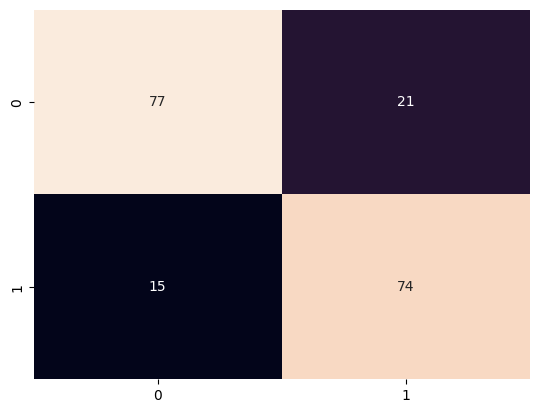

In [ ]:
cm_RandForest_KNN_upsampling_encoded = confusion_matrix(y_test_knn_upsampled,pred_rf_RandForest_KNN_upsampling_encoded)
sns.heatmap(cm_RandForest_KNN_upsampling_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_upsampled,pred_rf_RandForest_KNN_upsampling_encoded),2))

###### RandomForest KNN SMOTE Encoded

In [ ]:
def objective_RandForest_KNN_SMOTE_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_SMOTE_encoded)
    accuracy = accuracy_score(y_test_knn_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandForest_KNN_SMOTE_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_KNN_SMOTE_encoded.optimize(objective_RandForest_KNN_SMOTE_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_KNN_SMOTE_encoded = study_RandForest_KNN_SMOTE_encoded.best_trial
print(f'  Value: {trial_RandForest_KNN_SMOTE_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_KNN_SMOTE_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 13:59:30,093] A new study created in memory with name: no-name-12dd9ad5-f007-4482-a659-25708484a903
[I 2023-09-24 13:59:32,153] Trial 0 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 0.8, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.45989304812834225.
[I 2023-09-24 13:59:32,426] Trial 1 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 0.4, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.45989304812834225.
[I 2023-09-24 13:59:33,201] Trial 2 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 300, 'max_depth': 26, 'min_samples_split': 1.0, 'min_samples_leaf': 0.4}. Best is trial 0 with value: 0.45989304812834225.
[I 2023-09-24 13:59:34,331] Trial 3 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 700, 'max_depth': 22, 'min_samples_split': 0.30000000000000004, 'min_samples_l

Best trial:
  Value: 0.7273
  Params: 
    n_estimators: 900
    max_depth: 22
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_KNN_SMOTE_encoded = trial_RandForest_KNN_SMOTE_encoded.params  # Get the best hyperparameters
best_model_RandForest_KNN_SMOTE_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_KNN_SMOTE_encoded['n_estimators'],
    max_depth=best_params_RandForest_KNN_SMOTE_encoded['max_depth'],
    min_samples_split=best_params_RandForest_KNN_SMOTE_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_KNN_SMOTE_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_KNN_SMOTE_encoded.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)

RandomForestClassifier(max_depth=22, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=900,
                       random_state=42)

In [ ]:
pred_rf_RandForest_KNN_SMOTE_encoded = best_model_RandForest_KNN_SMOTE_encoded.predict(X_test_knn_SMOTE_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_encoded))
print(confusion_matrix(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_encoded))

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       101
         1.0       0.70      0.71      0.71        86

    accuracy                           0.73       187
   macro avg       0.73      0.73      0.73       187
weighted avg       0.73      0.73      0.73       187

[[75 26]
 [25 61]]


Accuracy Score =  0.73


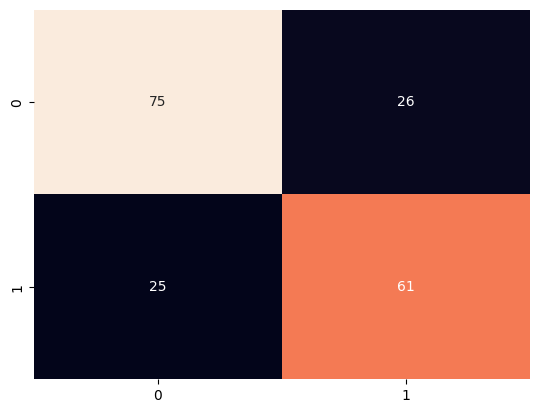

In [ ]:
cm_RandForest_KNN_SMOTE_encoded = confusion_matrix(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_encoded)
sns.heatmap(cm_RandForest_KNN_SMOTE_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_SMOTE,pred_rf_RandForest_KNN_SMOTE_encoded),2))

###### RandomForest KNN Downsampling Encoded

In [ ]:
def objective_RandForest_KNN_downsampling_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_knn_downsampled_encoded)
    accuracy = accuracy_score(y_test_knn_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_KNN_downsampling_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_KNN_downsampling_encoded.optimize(objective_RandForest_KNN_downsampling_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_KNN_downsampling_encoded = study_RandForest_KNN_downsampling_encoded.best_trial
print(f'  Value: {trial_RandForest_KNN_downsampling_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_KNN_downsampling_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 14:02:03,765] A new study created in memory with name: no-name-c7444528-5187-415f-a851-94003d590b65
[I 2023-09-24 14:02:05,085] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 800, 'max_depth': 26, 'min_samples_split': 0.9, 'min_samples_leaf': 0.2}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 14:02:05,262] Trial 1 finished with value: 0.7311827956989247 and parameters: {'n_estimators': 100, 'max_depth': 32, 'min_samples_split': 0.2, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.7311827956989247.
[I 2023-09-24 14:02:06,259] Trial 2 finished with value: 0.6451612903225806 and parameters: {'n_estimators': 600, 'max_depth': 28, 'min_samples_split': 0.6, 'min_samples_leaf': 0.2}. Best is trial 1 with value: 0.7311827956989247.
[I 2023-09-24 14:02:07,064] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 500, 'max_depth': 26, 'min_samples_split': 0.4, 'min_samples_leaf': 0.4}. Best is tr

Best trial:
  Value: 0.7312
  Params: 
    n_estimators: 100
    max_depth: 32
    min_samples_split: 0.2
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_KNN_SMOTE_encoded = trial_RandForest_KNN_SMOTE_encoded.params  # Get the best hyperparameters
best_model_RandForest_KNN_SMOTE_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_KNN_SMOTE_encoded['n_estimators'],
    max_depth=best_params_RandForest_KNN_SMOTE_encoded['max_depth'],
    min_samples_split=best_params_RandForest_KNN_SMOTE_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_KNN_SMOTE_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_KNN_SMOTE_encoded.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)

RandomForestClassifier(max_depth=22, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=900,
                       random_state=42)

In [ ]:
pred_rf_RandForest_KNN_downsampling_encoded = best_model_RandForest_KNN_SMOTE_encoded.predict(X_test_knn_downsampled_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_encoded))
print(confusion_matrix(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_encoded))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70        47
           1       0.69      0.78      0.73        46

    accuracy                           0.72        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.72      0.72      0.72        93

[[31 16]
 [10 36]]


Accuracy Score =  0.72


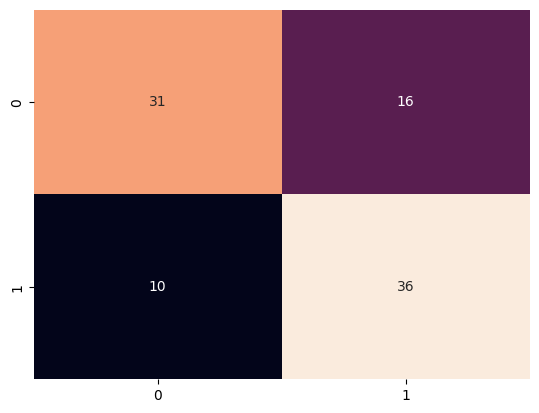

In [ ]:
cm_RandForest_KNN_downsampling_encoded = confusion_matrix(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_encoded)
sns.heatmap(cm_RandForest_KNN_downsampling_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_knn_downsampled,pred_rf_RandForest_KNN_downsampling_encoded),2))

###### RandomForest Iterative Upsampling Encoded

In [ ]:
def objective_RandForest_iter_upsampling_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_upsampled_encoded)
    accuracy = accuracy_score(y_test_iter_upsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_iter_upsampling_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_iter_upsampling_encoded.optimize(objective_RandForest_iter_upsampling_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_iter_upsampling_encoded = study_RandForest_iter_upsampling_encoded.best_trial
print(f'  Value: {trial_RandForest_iter_upsampling_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_iter_upsampling_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 14:03:23,989] A new study created in memory with name: no-name-ac4b610b-16e1-474b-ab48-891e92441f78
[I 2023-09-24 14:03:25,665] Trial 0 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.30000000000000004}. Best is trial 0 with value: 0.47593582887700536.
[I 2023-09-24 14:03:27,235] Trial 1 finished with value: 0.8074866310160428 and parameters: {'n_estimators': 900, 'max_depth': 28, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.8074866310160428.
[I 2023-09-24 14:03:28,441] Trial 2 finished with value: 0.7540106951871658 and parameters: {'n_estimators': 700, 'max_depth': 8, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2}. Best is trial 1 with value: 0.8074866310160428.
[I 2023-09-24 14:03:28,791] Trial 3 finished with value: 0.47593582887700536 and parameters: {'n_estimators': 200, 'max_depth': 26, 'min_samples_split': 1.0, 'mi

Best trial:
  Value: 0.8128
  Params: 
    n_estimators: 900
    max_depth: 24
    min_samples_split: 0.4
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_iter_upsampling_encoded = trial_RandForest_iter_upsampling_encoded.params  # Get the best hyperparameters
best_model_RandForest_iter_upsampling_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_iter_upsampling_encoded['n_estimators'],
    max_depth=best_params_RandForest_iter_upsampling_encoded['max_depth'],
    min_samples_split=best_params_RandForest_iter_upsampling_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_iter_upsampling_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_iter_upsampling_encoded.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)

RandomForestClassifier(max_depth=24, min_samples_leaf=0.1,
                       min_samples_split=0.4, n_estimators=900,
                       random_state=42)

In [ ]:
pred_rf_RandForest_iter_upsampling_encoded = best_model_RandForest_iter_upsampling_encoded.predict(X_test_iter_upsampled_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_encoded))
print(confusion_matrix(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_encoded))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.78      0.85      0.81        89

    accuracy                           0.81       187
   macro avg       0.81      0.81      0.81       187
weighted avg       0.82      0.81      0.81       187

[[76 22]
 [13 76]]


Accuracy Score =  0.81


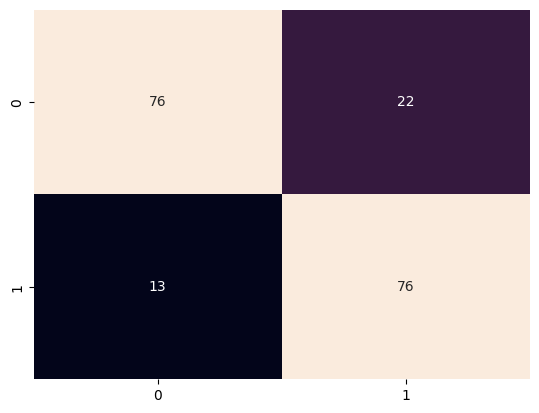

In [ ]:
cm_RandForest_iter_upsampling_encoded = confusion_matrix(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_encoded)
sns.heatmap(cm_RandForest_iter_upsampling_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_upsampled,pred_rf_RandForest_iter_upsampling_encoded),2))

###### RandomForest Iterative SMOTE Encoded

In [ ]:
def objective_RandForest_iter_SMOTE_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_SMOTE_encoded)
    accuracy = accuracy_score(y_test_iter_SMOTE, y_pred)

    return accuracy

In [ ]:
study_RandForest_iter_SMOTE_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_iter_SMOTE_encoded.optimize(objective_RandForest_iter_SMOTE_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_iter_SMOTE_encoded = study_RandForest_iter_SMOTE_encoded.best_trial
print(f'  Value: {trial_RandForest_iter_SMOTE_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_iter_SMOTE_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 14:05:50,914] A new study created in memory with name: no-name-d19ffb78-554c-4b68-a356-6e4b8d0508f6
[I 2023-09-24 14:05:51,953] Trial 0 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 600, 'max_depth': 12, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.45989304812834225.
[I 2023-09-24 14:05:52,683] Trial 1 finished with value: 0.7379679144385026 and parameters: {'n_estimators': 400, 'max_depth': 26, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2}. Best is trial 1 with value: 0.7379679144385026.
[I 2023-09-24 14:05:53,516] Trial 2 finished with value: 0.45989304812834225 and parameters: {'n_estimators': 500, 'max_depth': 24, 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.2}. Best is trial 1 with value: 0.7379679144385026.
[I 2023-09-24 14:05:54,060] Trial 3 finished with value: 0.7272727272727273 and parameters: {'n_estimators': 300, 'max_depth': 24, 'min_samples_split': 0.6, 'mi

Best trial:
  Value: 0.7861
  Params: 
    n_estimators: 500
    max_depth: 30
    min_samples_split: 0.30000000000000004
    min_samples_leaf: 0.1


In [ ]:
best_params_RandForest_iter_SMOTE_encoded = trial_RandForest_iter_SMOTE_encoded.params  # Get the best hyperparameters
best_model_RandForest_iter_SMOTE_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_iter_SMOTE_encoded['n_estimators'],
    max_depth=best_params_RandForest_iter_SMOTE_encoded['max_depth'],
    min_samples_split=best_params_RandForest_iter_SMOTE_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_iter_SMOTE_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_iter_SMOTE_encoded.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)

RandomForestClassifier(max_depth=30, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=500,
                       random_state=42)

In [ ]:
pred_rf_RandForest_iter_SMOTE_encoded = best_model_RandForest_iter_SMOTE_encoded.predict(X_test_iter_SMOTE_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_encoded))
print(confusion_matrix(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_encoded))

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       101
         1.0       0.73      0.84      0.78        86

    accuracy                           0.79       187
   macro avg       0.79      0.79      0.79       187
weighted avg       0.79      0.79      0.79       187

[[75 26]
 [14 72]]


Accuracy Score =  0.79


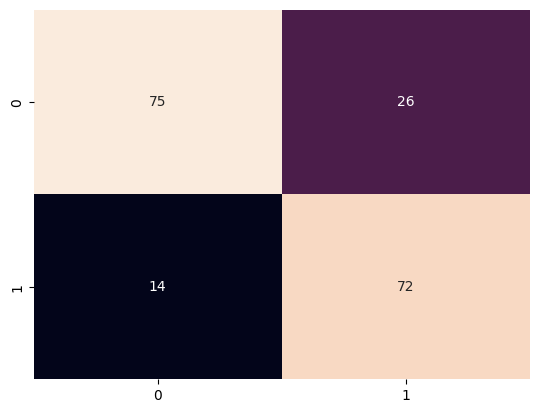

In [ ]:
cm_RandForest_iter_SMOTE_encoded = confusion_matrix(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_encoded)
sns.heatmap(cm_RandForest_iter_SMOTE_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_SMOTE,pred_rf_RandForest_iter_SMOTE_encoded),2))

###### RandomForest Iterative Downsampling Encoded

In [ ]:
def objective_RandForest_iter_downsampling_encoded(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0, step=0.1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5, step=0.1)

    # Create and train the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)

    # Calculate the accuracy on the validation set (you can use other metrics as well)
    y_pred = model.predict(X_test_iter_downsampled_encoded)
    accuracy = accuracy_score(y_test_iter_downsampled, y_pred)

    return accuracy

In [ ]:
study_RandForest_iter_downsampling_encoded = optuna.create_study(direction='maximize')  # You can also use 'minimize' if optimizing a loss
study_RandForest_iter_downsampling_encoded.optimize(objective_RandForest_iter_downsampling_encoded, n_trials=100)  # You can adjust the number of trials as needed

# Print the best hyperparameters and their corresponding accuracy
print('Best trial:')
trial_RandForest_iter_downsampling_encoded = study_RandForest_iter_downsampling_encoded.best_trial
print(f'  Value: {trial_RandForest_iter_downsampling_encoded.value:.4f}')
print('  Params: ')
for key, value in trial_RandForest_iter_downsampling_encoded.params.items():
    print(f'    {key}: {value}')

[I 2023-09-24 14:07:45,975] A new study created in memory with name: no-name-4e8a1dc0-a0c9-45be-a0ac-0a7a9363d8c2
[I 2023-09-24 14:07:46,651] Trial 0 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 0.4, 'min_samples_leaf': 0.5}. Best is trial 0 with value: 0.4946236559139785.
[I 2023-09-24 14:07:47,837] Trial 1 finished with value: 0.7526881720430108 and parameters: {'n_estimators': 600, 'max_depth': 2, 'min_samples_split': 0.6, 'min_samples_leaf': 0.30000000000000004}. Best is trial 1 with value: 0.7526881720430108.
[I 2023-09-24 14:07:48,377] Trial 2 finished with value: 0.7204301075268817 and parameters: {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1}. Best is trial 1 with value: 0.7526881720430108.
[I 2023-09-24 14:07:48,887] Trial 3 finished with value: 0.4946236559139785 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 0.7000000000000001, 'min_sam

Best trial:
  Value: 0.7527
  Params: 
    n_estimators: 600
    max_depth: 2
    min_samples_split: 0.6
    min_samples_leaf: 0.30000000000000004


In [ ]:
best_params_RandForest_iter_downsampling_encoded = trial_RandForest_iter_downsampling_encoded.params  # Get the best hyperparameters
best_model_RandForest_iter_downsampling_encoded = RandomForestClassifier(
    n_estimators=best_params_RandForest_iter_downsampling_encoded['n_estimators'],
    max_depth=best_params_RandForest_iter_downsampling_encoded['max_depth'],
    min_samples_split=best_params_RandForest_iter_downsampling_encoded['min_samples_split'],
    min_samples_leaf=best_params_RandForest_iter_downsampling_encoded['min_samples_leaf'],
    random_state=42
)
best_model_RandForest_iter_downsampling_encoded.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.6, n_estimators=600,
                       random_state=42)

In [ ]:
pred_rf_RandForest_iter_downsampling_encoded = best_model_RandForest_iter_downsampling_encoded.predict(X_test_iter_downsampled_encoded)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test_iter_downsampled,pred_rf_RandForest_iter_downsampling_encoded))
print(confusion_matrix(y_test_iter_downsampled,pred_rf_RandForest_iter_downsampling_encoded))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75        47
           1       0.73      0.78      0.76        46

    accuracy                           0.75        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.75      0.75      0.75        93

[[34 13]
 [10 36]]


Accuracy Score =  0.75


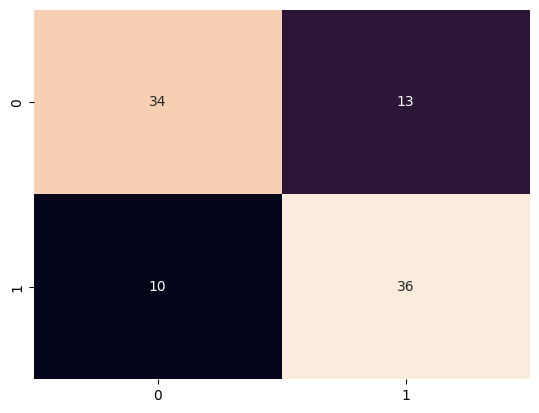

In [ ]:
cm_RandForest_iter_downsampling_encoded = confusion_matrix(y_test_iter_downsampled,pred_rf_RandForest_iter_downsampling_encoded)
sns.heatmap(cm_RandForest_iter_downsampling_encoded, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test_iter_downsampled,pred_rf_RandForest_iter_downsampling_encoded),2))

#### XGBoost ⭐

##### MissForest_upsampled

###### Build a model - XGBoost

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def xgb_MissForest_upsampled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled)
    y_pred_prob = model.predict_proba(X_test_MissForest_upsampled)[:, 1]
    auc = roc_auc_score(y_test_MissForest_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_MissForest_upsampled_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled)
    y_pred_prob = model.predict_proba(X_test_MissForest_upsampled_encoded)[:, 1]
    auc = roc_auc_score(y_test_MissForest_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_MissForest_upsampled_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled)
    y_pred_prob = model.predict_proba(X_test_MissForest_upsampled_scaled)[:, 1]
    auc = roc_auc_score(y_test_MissForest_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_MissForest_upsampled_study = optuna.create_study(direction='minimize')
xgb_MissForest_upsampled_study.optimize(xgb_MissForest_upsampled_objective, n_trials=100)
xgb_MissForest_upsampled_best_params = xgb_MissForest_upsampled_study.best_params
xgb_MissForest_upsampled_best_value = xgb_MissForest_upsampled_study.best_value

[I 2023-09-24 13:51:06,804] A new study created in memory with name: no-name-505ccfb4-39bf-4bf3-8dcf-854b1c558328
[I 2023-09-24 13:51:08,990] Trial 0 finished with value: 0.14629672093556534 and parameters: {'booster': 'dart', 'lambda': 0.07022555704108047, 'alpha': 0.009260219539273466, 'learning_rate': 1.839922194565622e-05, 'n_estimators': 197, 'max_depth': 4, 'gamma': 0.015430901121483952, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.14629672093556534.
[I 2023-09-24 13:51:10,459] Trial 1 finished with value: 0.13907360697087823 and parameters: {'booster': 'gbtree', 'lambda': 0.03985553001519526, 'alpha': 2.701185846096291e-08, 'learning_rate': 1.2670614912645824e-08, 'n_estimators': 448, 'max_depth': 4, 'gamma': 0.008486444997583008, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.13907360697087823.
[I 2023-09-24 13:51:10,501] Trial 2 finished with value: 0.17507452419169922 and parameters: {'booster': 'gblinear', 'lambda': 0.00026020110837573883, 'alpha': 

In [ ]:
xgb_MissForest_upsampled_encoded_study = optuna.create_study(direction='minimize')
xgb_MissForest_upsampled_encoded_study.optimize(xgb_MissForest_upsampled_encoded_objective, n_trials=100)
xgb_MissForest_upsampled_encoded_best_params = xgb_MissForest_upsampled_encoded_study.best_params
xgb_MissForest_upsampled_encoded_best_value = xgb_MissForest_upsampled_encoded_study.best_value

[I 2023-09-24 14:15:07,129] A new study created in memory with name: no-name-ed91cf63-5739-418f-9716-6f085355b5e0
[I 2023-09-24 14:15:09,031] Trial 0 finished with value: 0.21634946113276776 and parameters: {'booster': 'gblinear', 'lambda': 0.05047891992816462, 'alpha': 0.003113018953366148, 'learning_rate': 0.22442280342225504, 'n_estimators': 486}. Best is trial 0 with value: 0.21634946113276776.
[I 2023-09-24 14:15:09,070] Trial 1 finished with value: 0.15684476037606043 and parameters: {'booster': 'gblinear', 'lambda': 1.138423243763714e-06, 'alpha': 0.005716083817212427, 'learning_rate': 0.0075271097904722915, 'n_estimators': 76}. Best is trial 1 with value: 0.15684476037606043.
[I 2023-09-24 14:15:11,470] Trial 2 finished with value: 0.18063517541848206 and parameters: {'booster': 'dart', 'lambda': 4.027176389960433e-05, 'alpha': 0.030441831129151182, 'learning_rate': 0.0001682785751904612, 'n_estimators': 210, 'max_depth': 2, 'gamma': 0.0002966856613396066, 'grow_policy': 'lossg

In [ ]:
xgb_MissForest_upsampled_scaled_study = optuna.create_study(direction='minimize')
xgb_MissForest_upsampled_scaled_study.optimize(xgb_MissForest_upsampled_scaled_objective, n_trials=100)
xgb_MissForest_upsampled_scaled_best_params = xgb_MissForest_upsampled_scaled_study.best_params
xgb_MissForest_upsampled_scaled_best_value = xgb_MissForest_upsampled_scaled_study.best_value

[I 2023-09-24 14:16:31,736] A new study created in memory with name: no-name-29f2b74b-e0c6-491e-97e2-ee66dc0ddb37
[I 2023-09-24 14:16:31,789] Trial 0 finished with value: 0.17731024994267375 and parameters: {'booster': 'gblinear', 'lambda': 1.3004903492167374e-06, 'alpha': 0.7990960650180352, 'learning_rate': 1.5655883671388848e-07, 'n_estimators': 245}. Best is trial 0 with value: 0.17731024994267375.
[I 2023-09-24 14:16:31,971] Trial 1 finished with value: 0.10800275166246287 and parameters: {'booster': 'gbtree', 'lambda': 3.927134398036931e-08, 'alpha': 0.024950466794606354, 'learning_rate': 0.008049881520327599, 'n_estimators': 442, 'max_depth': 2, 'gamma': 4.8415195265737535e-08, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.10800275166246287.
[I 2023-09-24 14:16:32,209] Trial 2 finished with value: 0.09464572345792255 and parameters: {'booster': 'gbtree', 'lambda': 0.0015913717118667277, 'alpha': 0.00015475742365223612, 'learning_rate': 3.7364421583174437e-08, 'n_est

###### Train a model

In [ ]:
xgb_MissForest_upsampled_model = xgb.XGBClassifier(**xgb_MissForest_upsampled_best_params)
xgb_MissForest_upsampled_model.fit(X_train_MissForest_upsampled, y_train_MissForest_upsampled, eval_set=[(X_train_MissForest_upsampled, y_train_MissForest_upsampled), (X_test_MissForest_upsampled, y_test_MissForest_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.68627	validation_1-logloss:0.68726
[1]	validation_0-logloss:0.67982	validation_1-logloss:0.68162
[2]	validation_0-logloss:0.67348	validation_1-logloss:0.67621
[3]	validation_0-logloss:0.66726	validation_1-logloss:0.67090
[4]	validation_0-logloss:0.66115	validation_1-logloss:0.66563
[5]	validation_0-logloss:0.65518	validation_1-logloss:0.66053
[6]	validation_0-logloss:0.64929	validation_1-logloss:0.65543
[7]	validation_0-logloss:0.64349	validation_1-logloss:0.65055
[8]	validation_0-logloss:0.63783	validation_1-logloss:0.64583
[9]	validation_0-logloss:0.63220	validation_1-logloss:0.64096
[10]	validation_0-logloss:0.62674	validation_1-logloss:0.63637


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.62130	validation_1-logloss:0.63179
[12]	validation_0-logloss:0.61588	validation_1-logloss:0.62725
[13]	validation_0-logloss:0.61053	validation_1-logloss:0.62253
[14]	validation_0-logloss:0.60532	validation_1-logloss:0.61823
[15]	validation_0-logloss:0.60024	validation_1-logloss:0.61391
[16]	validation_0-logloss:0.59487	validation_1-logloss:0.60974
[17]	validation_0-logloss:0.58974	validation_1-logloss:0.60564
[18]	validation_0-logloss:0.58454	validation_1-logloss:0.60161
[19]	validation_0-logloss:0.57964	validation_1-logloss:0.59727
[20]	validation_0-logloss:0.57470	validation_1-logloss:0.59363
[21]	validation_0-logloss:0.56989	validation_1-logloss:0.58982
[22]	validation_0-logloss:0.56539	validation_1-logloss:0.58595
[23]	validation_0-logloss:0.56078	validation_1-logloss:0.58244
[24]	validation_0-logloss:0.55616	validation_1-logloss:0.57852
[25]	validation_0-logloss:0.55176	validation_1-logloss:0.57492
[26]	validation_0-logloss:0.54734	validation_1-logloss:

XGBClassifier(alpha=8.707494277069176e-07, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5.8200114958931785e-08, gpu_id=None,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, lambda=0.001199261218276403,
              learning_rate=0.009492987707855553, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=359, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_train_MissForest_upsampled,xgb_MissForest_upsampled_model.predict(X_train_MissForest_upsampled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       377

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_MissForest_upsampled = xgb_MissForest_upsampled_model.predict(X_test_MissForest_upsampled)

In [ ]:
print(classification_report(y_test_MissForest_upsampled,y_pred_MissForest_upsampled))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        98
           1       0.88      0.97      0.92        89

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
confusion_matrix(y_test_MissForest_upsampled,y_pred_MissForest_upsampled)

array([[86, 12],
       [ 3, 86]])

In [ ]:
results = xgb_MissForest_upsampled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_upsampled,y_pred_MissForest_upsampled))

Accuracy:  0.9197860962566845


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_upsampled_model.predict(MissForest_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_upsampled_df.iloc[i,:-1].tolist(), predictions[i], MissForest_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 25.11333333333333, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 74.59666666666666, 35.7, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[4.0, 110.0, 92.0, 38.05, 37.6, 0.191, 30.0] 	=> 0 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 0 (expected 0)
[8.0, 99.0, 84.0, 34.33, 35.4, 0.388, 50.0] 	=> 0 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 30.975, 34.1, 0.337, 38.0] 	=> 0 (expected 0)


##### MissForest_upsampled_encoded

###### Train a model

In [ ]:
xgb_MissForest_upsampled_encoded_model = xgb.XGBClassifier(**xgb_MissForest_upsampled_encoded_best_params)
xgb_MissForest_upsampled_encoded_model.fit(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled, eval_set=[(X_train_MissForest_upsampled_encoded, y_train_MissForest_upsampled), (X_test_MissForest_upsampled_encoded, y_test_MissForest_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.43032	validation_1-logloss:0.50855
[1]	validation_0-logloss:0.28280	validation_1-logloss:0.41446
[2]	validation_0-logloss:0.21118	validation_1-logloss:0.37074
[3]	validation_0-logloss:0.16742	validation_1-logloss:0.34998
[4]	validation_0-logloss:0.13068	validation_1-logloss:0.33811
[5]	validation_0-logloss:0.11107	validation_1-logloss:0.33417
[6]	validation_0-logloss:0.09115	validation_1-logloss:0.32995
[7]	validation_0-logloss:0.08588	validation_1-logloss:0.33098
[8]	validation_0-logloss:0.07902	validation_1-logloss:0.33226
[9]	validation_0-logloss:0.06788	validation_1-logloss:0.34513
[10]	validation_0-logloss:0.06395	validation_1-logloss:0.34641
[11]	validation_0-logloss:0.05560	validation_1-logloss:0.33746
[12]	validation_0-logloss:0.05228	validation_1-logloss:0.33763
[13]	validation_0-logloss:0.04626	validation_1-logloss:0.34109
[14]	validation_0-logloss:0.04341	validation_1-logloss:0.33802


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.04157	validation_1-logloss:0.33828
[16]	validation_0-logloss:0.03877	validation_1-logloss:0.34129


XGBClassifier(alpha=0.028953484471269893, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.91172527042215e-06, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=3.110869273014684e-07, learning_rate=0.6500937784461842,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=55, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_MissForest_upsampled,xgb_MissForest_upsampled_encoded_model.predict(X_train_MissForest_upsampled_encoded)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       368
           1       0.99      0.99      0.99       377

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



In [ ]:
y_pred_MissForest_upsampled_encoded = xgb_MissForest_upsampled_encoded_model.predict(X_test_MissForest_upsampled_encoded)

In [ ]:
print(classification_report(y_test_MissForest_upsampled,y_pred_MissForest_upsampled_encoded))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        98
           1       0.82      0.93      0.87        89

    accuracy                           0.87       187
   macro avg       0.88      0.87      0.87       187
weighted avg       0.88      0.87      0.87       187



In [ ]:
confusion_matrix(y_test_MissForest_upsampled,y_pred_MissForest_upsampled_encoded)

array([[80, 18],
       [ 6, 83]])

In [ ]:
results = xgb_MissForest_upsampled_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_upsampled,y_pred_MissForest_upsampled_encoded))

Accuracy:  0.8716577540106952


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_upsampled_encoded_model.predict(MissForest_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_upsampled_df.iloc[i,:-1].tolist(), predictions[i], MissForest_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 1 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 25.11333333333333, 25.6, 0.201, 30.0] 	=> 1 (expected 0)
[10.0, 115.0, 74.59666666666666, 35.7, 35.3, 0.134, 29.0] 	=> 1 (expected 0)
[4.0, 110.0, 92.0, 38.05, 37.6, 0.191, 30.0] 	=> 1 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 1 (expected 0)
[8.0, 99.0, 84.0, 34.33, 35.4, 0.388, 50.0] 	=> 1 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 30.975, 34.1, 0.337, 38.0] 	=> 1 (expected 0)


##### MissForest_upsampled_scaled

###### Train a model

In [ ]:
xgb_MissForest_upsampled_scaled_model = xgb.XGBClassifier(**xgb_MissForest_upsampled_scaled_best_params)
xgb_MissForest_upsampled_scaled_model.fit(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled, eval_set=[(X_train_MissForest_upsampled_scaled, y_train_MissForest_upsampled), (X_test_MissForest_upsampled_scaled, y_test_MissForest_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.68757	validation_1-logloss:0.68837
[1]	validation_0-logloss:0.68232	validation_1-logloss:0.68386
[2]	validation_0-logloss:0.67714	validation_1-logloss:0.67936
[3]	validation_0-logloss:0.67205	validation_1-logloss:0.67500
[4]	validation_0-logloss:0.66703	validation_1-logloss:0.67067
[5]	validation_0-logloss:0.66208	validation_1-logloss:0.66646
[6]	validation_0-logloss:0.65720	validation_1-logloss:0.66222
[7]	validation_0-logloss:0.65242	validation_1-logloss:0.65814
[8]	validation_0-logloss:0.64770	validation_1-logloss:0.65416
[9]	validation_0-logloss:0.64299	validation_1-logloss:0.65013
[10]	validation_0-logloss:0.63838	validation_1-logloss:0.64629
[11]	validation_0-logloss:0.63381	validation_1-logloss:0.64239
[12]	validation_0-logloss:0.62935	validation_1-logloss:0.63862
[13]	validation_0-logloss:0.62482	validation_1-logloss:0.63481
[14]	validation_0-logloss:0.62051	validation_1-logloss:0.63111
[15]	validation_0-logloss:0.61620	validation_1-logloss:0.62753
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-logloss:0.59924	validation_1-logloss:0.61319
[20]	validation_0-logloss:0.59495	validation_1-logloss:0.60978
[21]	validation_0-logloss:0.59074	validation_1-logloss:0.60650
[22]	validation_0-logloss:0.58657	validation_1-logloss:0.60315
[23]	validation_0-logloss:0.58256	validation_1-logloss:0.59962
[24]	validation_0-logloss:0.57844	validation_1-logloss:0.59669
[25]	validation_0-logloss:0.57465	validation_1-logloss:0.59330
[26]	validation_0-logloss:0.57075	validation_1-logloss:0.59013
[27]	validation_0-logloss:0.56680	validation_1-logloss:0.58717
[28]	validation_0-logloss:0.56308	validation_1-logloss:0.58429
[29]	validation_0-logloss:0.55941	validation_1-logloss:0.58115
[30]	validation_0-logloss:0.55573	validation_1-logloss:0.57807
[31]	validation_0-logloss:0.55213	validation_1-logloss:0.57527
[32]	validation_0-logloss:0.54858	validation_1-logloss:0.57216
[33]	validation_0-logloss:0.54480	validation_1-logloss:0.56917
[34]	validation_0-logloss:0.54116	validation_1-logloss:

XGBClassifier(alpha=6.808104664603742e-08, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.3457365160484014e-08, gpu_id=None,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, lambda=1.5213931214022813e-07,
              learning_rate=0.0076885012292240915, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_MissForest_upsampled,xgb_MissForest_upsampled_scaled_model.predict(X_train_MissForest_upsampled_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       368
           1       0.99      1.00      0.99       377

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



In [ ]:
y_pred_MissForest_upsampled_scaled = xgb_MissForest_upsampled_scaled_model.predict(X_test_MissForest_upsampled_scaled)

In [ ]:
print(classification_report(y_test_MissForest_upsampled,y_pred_MissForest_upsampled_scaled))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        98
           1       0.89      0.96      0.92        89

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
confusion_matrix(y_test_MissForest_upsampled,y_pred_MissForest_upsampled_scaled)

array([[87, 11],
       [ 4, 85]])

In [ ]:
results = xgb_MissForest_upsampled_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_upsampled,y_pred_MissForest_upsampled_scaled))

Accuracy:  0.9197860962566845


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_upsampled_scaled_model.predict(MissForest_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_upsampled_df.iloc[i,:-1].tolist(), predictions[i], MissForest_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 25.11333333333333, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 74.59666666666666, 35.7, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[4.0, 110.0, 92.0, 38.05, 37.6, 0.191, 30.0] 	=> 0 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 0 (expected 0)
[8.0, 99.0, 84.0, 34.33, 35.4, 0.388, 50.0] 	=> 0 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 30.975, 34.1, 0.337, 38.0] 	=> 0 (expected 0)


##### MissForest_SMOTE

###### Build a model - XGBoost

In [ ]:
def xgb_MissForest_SMOTE_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE)
    y_pred_prob = model.predict_proba(X_test_MissForest_SMOTE)[:, 1]
    auc = roc_auc_score(y_test_MissForest_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_MissForest_SMOTE_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE)
    y_pred_prob = model.predict_proba(X_test_MissForest_SMOTE_encoded)[:, 1]
    auc = roc_auc_score(y_test_MissForest_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_MissForest_SMOTE_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE)
    y_pred_prob = model.predict_proba(X_test_MissForest_SMOTE_scaled)[:, 1]
    auc = roc_auc_score(y_test_MissForest_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_MissForest_SMOTE_study = optuna.create_study(direction='minimize')
xgb_MissForest_SMOTE_study.optimize(xgb_MissForest_SMOTE_objective, n_trials=100)
xgb_MissForest_SMOTE_best_params = xgb_MissForest_SMOTE_study.best_params
xgb_MissForest_SMOTE_best_value = xgb_MissForest_SMOTE_study.best_value

[I 2023-09-24 14:25:47,071] A new study created in memory with name: no-name-1041c712-5532-44da-8722-341505fe43b5
[I 2023-09-24 14:25:48,194] Trial 0 finished with value: 0.10971678563205156 and parameters: {'booster': 'gbtree', 'lambda': 3.282480119694999e-08, 'alpha': 0.0017696612719070323, 'learning_rate': 0.5312547874017364, 'n_estimators': 440, 'max_depth': 3, 'gamma': 8.373942148095677e-07, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.10971678563205156.
[I 2023-09-24 14:25:48,979] Trial 1 finished with value: 0.20262491365415614 and parameters: {'booster': 'gbtree', 'lambda': 3.997227651863462e-06, 'alpha': 0.0006037450146693328, 'learning_rate': 0.000238438670318329, 'n_estimators': 142, 'max_depth': 3, 'gamma': 3.18405519425252e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.10971678563205156.
[I 2023-09-24 14:25:49,151] Trial 2 finished with value: 0.24027170158876354 and parameters: {'booster': 'gbtree', 'lambda': 2.629047947918575e-06, 'alpha': 

In [ ]:
xgb_MissForest_SMOTE_encoded_study = optuna.create_study(direction='minimize')
xgb_MissForest_SMOTE_encoded_study.optimize(xgb_MissForest_SMOTE_encoded_objective, n_trials=100)
xgb_MissForest_SMOTE_encoded_best_params = xgb_MissForest_SMOTE_encoded_study.best_params
xgb_MissForest_SMOTE_encoded_best_value = xgb_MissForest_SMOTE_encoded_study.best_value

[I 2023-09-24 14:39:45,209] A new study created in memory with name: no-name-91cbc6b9-f9b1-411f-9100-39b245f0cf06
[I 2023-09-24 14:39:46,159] Trial 0 finished with value: 0.15979737508634584 and parameters: {'booster': 'gbtree', 'lambda': 2.978834360606301e-06, 'alpha': 7.503843958124209e-08, 'learning_rate': 0.3736115964438618, 'n_estimators': 150, 'max_depth': 7, 'gamma': 1.0822216434610681e-08, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.15979737508634584.
[I 2023-09-24 14:39:46,889] Trial 1 finished with value: 0.17280681556527733 and parameters: {'booster': 'dart', 'lambda': 1.104615361943341e-08, 'alpha': 5.085379374622293e-06, 'learning_rate': 0.7172964478847957, 'n_estimators': 71, 'max_depth': 9, 'gamma': 0.9181271242706042, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.15979737508634584.
[I 2023-09-24 14:39:48,585] Trial 2 finished with value: 0.21943357126410323 and parameters: {'booster': 'dart', 'lambda': 4.1979009859304676e-05, 'alpha': 5.30069

In [ ]:
xgb_MissForest_SMOTE_scaled_study = optuna.create_study(direction='minimize')
xgb_MissForest_SMOTE_scaled_study.optimize(xgb_MissForest_SMOTE_scaled_objective, n_trials=100)
xgb_MissForest_SMOTE_scaled_best_params = xgb_MissForest_SMOTE_scaled_study.best_params
xgb_MissForest_SMOTE_scaled_best_value = xgb_MissForest_SMOTE_scaled_study.best_value

[I 2023-09-24 14:45:24,955] A new study created in memory with name: no-name-e5efe888-1d2a-4c7e-8907-bb6f36857552
[I 2023-09-24 14:45:25,227] Trial 0 finished with value: 0.14298871747639874 and parameters: {'booster': 'gbtree', 'lambda': 0.004753547254492447, 'alpha': 1.4730122682089714e-07, 'learning_rate': 0.0005384203556907898, 'n_estimators': 200, 'max_depth': 5, 'gamma': 3.326873199215079e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.14298871747639874.
[I 2023-09-24 14:45:25,629] Trial 1 finished with value: 0.1622726226110982 and parameters: {'booster': 'dart', 'lambda': 2.0932288722904357e-07, 'alpha': 0.0004762537626666456, 'learning_rate': 4.139408538281916e-05, 'n_estimators': 102, 'max_depth': 7, 'gamma': 0.00021711856945050544, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.14298871747639874.
[I 2023-09-24 14:45:26,018] Trial 2 finished with value: 0.14880267096477096 and parameters: {'booster': 'gbtree', 'lambda': 0.05446879765879355, 'alpha'

###### Train a model

In [ ]:
xgb_MissForest_SMOTE_model = xgb.XGBClassifier(**xgb_MissForest_SMOTE_best_params)
xgb_MissForest_SMOTE_model.fit(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE, eval_set=[(X_train_MissForest_SMOTE, y_train_MissForest_SMOTE), (X_test_MissForest_SMOTE, y_test_MissForest_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.66401	validation_1-logloss:0.66983
[1]	validation_0-logloss:0.63738	validation_1-logloss:0.64772
[2]	validation_0-logloss:0.61375	validation_1-logloss:0.62823
[3]	validation_0-logloss:0.59329	validation_1-logloss:0.61237
[4]	validation_0-logloss:0.57319	validation_1-logloss:0.59930
[5]	validation_0-logloss:0.55415	validation_1-logloss:0.58606
[6]	validation_0-logloss:0.53801	validation_1-logloss:0.57384
[7]	validation_0-logloss:0.52328	validation_1-logloss:0.56241
[8]	validation_0-logloss:0.50971	validation_1-logloss:0.55223
[9]	validation_0-logloss:0.49597	validation_1-logloss:0.54422
[10]	validation_0-logloss:0.48354	validation_1-logloss:0.53576
[11]	validation_0-logloss:0.47137	validation_1-logloss:0.52893
[12]	validation_0-logloss:0.46102	validation_1-logloss:0.52209
[13]	validation_0-logloss:0.45057	validation_1-logloss:0.51494
[14]	validation_0-logloss:0.44129	validation_1-logloss:0.50869
[15]	validation_0-logloss:0.43027	validation_1-logloss:0.50193
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.35980	validation_1-logloss:0.46828
[25]	validation_0-logloss:0.35291	validation_1-logloss:0.46475
[26]	validation_0-logloss:0.34844	validation_1-logloss:0.46197
[27]	validation_0-logloss:0.34208	validation_1-logloss:0.45865
[28]	validation_0-logloss:0.33855	validation_1-logloss:0.45667
[29]	validation_0-logloss:0.33435	validation_1-logloss:0.45483
[30]	validation_0-logloss:0.33121	validation_1-logloss:0.45334
[31]	validation_0-logloss:0.32459	validation_1-logloss:0.45431
[32]	validation_0-logloss:0.32021	validation_1-logloss:0.45263
[33]	validation_0-logloss:0.31747	validation_1-logloss:0.45064
[34]	validation_0-logloss:0.31337	validation_1-logloss:0.44899
[35]	validation_0-logloss:0.31030	validation_1-logloss:0.44819
[36]	validation_0-logloss:0.30786	validation_1-logloss:0.44621
[37]	validation_0-logloss:0.30360	validation_1-logloss:0.44380
[38]	validation_0-logloss:0.29882	validation_1-logloss:0.44275
[39]	validation_0-logloss:0.29425	validation_1-logloss:

XGBClassifier(alpha=0.14878580880673672, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1651758089104726, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=1.5370038360608168e-06, learning_rate=0.06117584076110794,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=451, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_train_MissForest_SMOTE,xgb_MissForest_SMOTE_model.predict(X_train_MissForest_SMOTE)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       380

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_MissForest_SMOTE = xgb_MissForest_SMOTE_model.predict(X_test_MissForest_SMOTE)

In [ ]:
print(classification_report(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE))

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       101
         1.0       0.77      0.93      0.84        86

    accuracy                           0.84       187
   macro avg       0.85      0.85      0.84       187
weighted avg       0.85      0.84      0.84       187



In [ ]:
confusion_matrix(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE)

array([[77, 24],
       [ 6, 80]])

In [ ]:
results = xgb_MissForest_SMOTE_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE))

Accuracy:  0.839572192513369


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_SMOTE_model.predict(MissForest_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], MissForest_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[8.0, 183.0, 64.0, 25.86, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 25.11333333333333, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 0 (expected 1)
[10.0, 115.0, 74.59666666666666, 35.7, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 29.0, 29.60150000000002, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 38.05, 37.6, 0.191, 30.0] 	=> 0 (expected 0)


##### MissForest_SMOTE_encoded

###### Train a model

In [ ]:
xgb_MissForest_SMOTE_encoded_model = xgb.XGBClassifier(**xgb_MissForest_SMOTE_encoded_best_params)
xgb_MissForest_SMOTE_encoded_model.fit(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE, eval_set=[(X_train_MissForest_SMOTE_encoded, y_train_MissForest_SMOTE), (X_test_MissForest_SMOTE_encoded, y_test_MissForest_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.65531	validation_1-logloss:0.66263
[1]	validation_0-logloss:0.62753	validation_1-logloss:0.64042
[2]	validation_0-logloss:0.60581	validation_1-logloss:0.61675
[3]	validation_0-logloss:0.58763	validation_1-logloss:0.60323
[4]	validation_0-logloss:0.57350	validation_1-logloss:0.58804
[5]	validation_0-logloss:0.56118	validation_1-logloss:0.57947
[6]	validation_0-logloss:0.55124	validation_1-logloss:0.57305
[7]	validation_0-logloss:0.54111	validation_1-logloss:0.56301
[8]	validation_0-logloss:0.53213	validation_1-logloss:0.55423
[9]	validation_0-logloss:0.52471	validation_1-logloss:0.54866
[10]	validation_0-logloss:0.51822	validation_1-logloss:0.54464
[11]	validation_0-logloss:0.50941	validation_1-logloss:0.54181
[12]	validation_0-logloss:0.50430	validation_1-logloss:0.53728
[13]	validation_0-logloss:0.49926	validation_1-logloss:0.53433
[14]	validation_0-logloss:0.49522	validation_1-logloss:0.53117
[15]	validation_0-logloss:0.48926	validation_1-logloss:0.52896
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.44838	validation_1-logloss:0.50716
[29]	validation_0-logloss:0.44537	validation_1-logloss:0.50334
[30]	validation_0-logloss:0.44399	validation_1-logloss:0.50276
[31]	validation_0-logloss:0.44204	validation_1-logloss:0.50291
[32]	validation_0-logloss:0.43902	validation_1-logloss:0.50054
[33]	validation_0-logloss:0.43700	validation_1-logloss:0.50144
[34]	validation_0-logloss:0.43455	validation_1-logloss:0.49927
[35]	validation_0-logloss:0.43225	validation_1-logloss:0.50027
[36]	validation_0-logloss:0.43068	validation_1-logloss:0.49932
[37]	validation_0-logloss:0.42800	validation_1-logloss:0.50055
[38]	validation_0-logloss:0.42714	validation_1-logloss:0.50030
[39]	validation_0-logloss:0.42632	validation_1-logloss:0.49877
[40]	validation_0-logloss:0.42448	validation_1-logloss:0.49600
[41]	validation_0-logloss:0.42215	validation_1-logloss:0.49395
[42]	validation_0-logloss:0.42058	validation_1-logloss:0.49400
[43]	validation_0-logloss:0.41851	validation_1-logloss:

XGBClassifier(alpha=3.443358818453842e-07, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.104793632256645e-06, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=0.0003683273329227564, learning_rate=0.15452163441021868,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=165, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_MissForest_SMOTE,xgb_MissForest_SMOTE_encoded_model.predict(X_train_MissForest_SMOTE_encoded)))

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       365
         1.0       0.85      0.90      0.88       380

    accuracy                           0.87       745
   macro avg       0.87      0.87      0.87       745
weighted avg       0.87      0.87      0.87       745



In [ ]:
y_pred_MissForest_SMOTE_encoded = xgb_MissForest_SMOTE_encoded_model.predict(X_test_MissForest_SMOTE_encoded)

In [ ]:
print(classification_report(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE_encoded))

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79       101
         1.0       0.74      0.78      0.76        86

    accuracy                           0.78       187
   macro avg       0.77      0.78      0.77       187
weighted avg       0.78      0.78      0.78       187



In [ ]:
confusion_matrix(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE_encoded)

array([[78, 23],
       [19, 67]])

In [ ]:
results = xgb_MissForest_SMOTE_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE_encoded))

Accuracy:  0.7754010695187166


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_SMOTE_encoded_model.predict(MissForest_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], MissForest_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 1 (expected 0)
[8.0, 183.0, 64.0, 25.86, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 25.11333333333333, 25.6, 0.201, 30.0] 	=> 1 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 1 (expected 1)
[10.0, 115.0, 74.59666666666666, 35.7, 35.3, 0.134, 29.0] 	=> 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 29.0, 29.60150000000002, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 38.05, 37.6, 0.191, 30.0] 	=> 1 (expected 0)


##### MissForest_SMOTE_scaled

###### Train a model

In [ ]:
xgb_MissForest_SMOTE_scaled_model = xgb.XGBClassifier(**xgb_MissForest_SMOTE_scaled_best_params)
xgb_MissForest_SMOTE_scaled_model.fit(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE, eval_set=[(X_train_MissForest_SMOTE_scaled, y_train_MissForest_SMOTE), (X_test_MissForest_SMOTE_scaled, y_test_MissForest_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.58482	validation_1-logloss:0.61161
[1]	validation_0-logloss:0.51268	validation_1-logloss:0.54962
[2]	validation_0-logloss:0.46705	validation_1-logloss:0.51828
[3]	validation_0-logloss:0.43207	validation_1-logloss:0.49095
[4]	validation_0-logloss:0.40411	validation_1-logloss:0.47877
[5]	validation_0-logloss:0.38091	validation_1-logloss:0.46856
[6]	validation_0-logloss:0.36757	validation_1-logloss:0.45753
[7]	validation_0-logloss:0.34820	validation_1-logloss:0.45279
[8]	validation_0-logloss:0.34099	validation_1-logloss:0.44823
[9]	validation_0-logloss:0.32770	validation_1-logloss:0.44381
[10]	validation_0-logloss:0.31943	validation_1-logloss:0.43726
[11]	validation_0-logloss:0.30866	validation_1-logloss:0.42998
[12]	validation_0-logloss:0.30540	validation_1-logloss:0.42929
[13]	validation_0-logloss:0.29515	validation_1-logloss:0.42814
[14]	validation_0-logloss:0.28199	validation_1-logloss:0.42062
[15]	validation_0-logloss:0.27745	validation_1-logloss:0.41829
[1

XGBClassifier(alpha=9.853349314216642e-08, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3097217201830145, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=0.0019600246699904935, learning_rate=0.29776907824027593,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=362, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_MissForest_SMOTE,xgb_MissForest_SMOTE_scaled_model.predict(X_train_MissForest_SMOTE_scaled)))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       365
         1.0       0.93      0.97      0.95       380

    accuracy                           0.95       745
   macro avg       0.95      0.95      0.95       745
weighted avg       0.95      0.95      0.95       745



In [ ]:
y_pred_MissForest_SMOTE_scaled = xgb_MissForest_SMOTE_scaled_model.predict(X_test_MissForest_SMOTE_scaled)

In [ ]:
print(classification_report(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE_scaled))

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       101
         1.0       0.75      0.86      0.80        86

    accuracy                           0.80       187
   macro avg       0.81      0.81      0.80       187
weighted avg       0.81      0.80      0.80       187



In [ ]:
confusion_matrix(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE_scaled)

array([[76, 25],
       [12, 74]])

In [ ]:
results = xgb_MissForest_SMOTE_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_SMOTE,y_pred_MissForest_SMOTE_scaled))

Accuracy:  0.8021390374331551


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_SMOTE_scaled_model.predict(MissForest_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], MissForest_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[8.0, 183.0, 64.0, 25.86, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 25.11333333333333, 25.6, 0.201, 30.0] 	=> 1 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 0 (expected 1)
[10.0, 115.0, 74.59666666666666, 35.7, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 29.0, 29.60150000000002, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 38.05, 37.6, 0.191, 30.0] 	=> 0 (expected 0)


##### MissForest_downsampled

###### Build a model - XGBoost

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def xgb_MissForest_downsampled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled)
    y_pred_prob = model.predict_proba(X_test_MissForest_downsampled)[:, 1]
    auc = roc_auc_score(y_test_MissForest_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_MissForest_downsampled_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled)
    y_pred_prob = model.predict_proba(X_test_MissForest_downsampled_encoded)[:, 1]
    auc = roc_auc_score(y_test_MissForest_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_MissForest_downsampled_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled)
    y_pred_prob = model.predict_proba(X_test_MissForest_downsampled_scaled)[:, 1]
    auc = roc_auc_score(y_test_MissForest_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_MissForest_downsampled_study = optuna.create_study(direction='minimize')
xgb_MissForest_downsampled_study.optimize(xgb_MissForest_downsampled_objective, n_trials=100)
xgb_MissForest_downsampled_best_params = xgb_MissForest_downsampled_study.best_params
xgb_MissForest_downsampled_best_value = xgb_MissForest_downsampled_study.best_value

[I 2023-09-24 15:01:43,494] A new study created in memory with name: no-name-6f27604b-3347-4213-a8fd-689b9b725e31
[I 2023-09-24 15:01:44,003] Trial 0 finished with value: 0.2076780758556892 and parameters: {'booster': 'gbtree', 'lambda': 0.10928766713206334, 'alpha': 1.0991642880782782e-08, 'learning_rate': 0.029173338934584892, 'n_estimators': 408, 'max_depth': 5, 'gamma': 0.00021771782552902776, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.2076780758556892.
[I 2023-09-24 15:01:44,100] Trial 1 finished with value: 0.2060592044403331 and parameters: {'booster': 'gblinear', 'lambda': 0.000438884460854305, 'alpha': 0.0024394280389833764, 'learning_rate': 9.289003443807485e-06, 'n_estimators': 140}. Best is trial 1 with value: 0.2060592044403331.
[I 2023-09-24 15:01:46,109] Trial 2 finished with value: 0.23034227567067522 and parameters: {'booster': 'dart', 'lambda': 2.835773019393332e-07, 'alpha': 3.4737490672732076e-06, 'learning_rate': 0.5189165632379286, 'n_estimators': 

In [ ]:
xgb_MissForest_downsampled_encoded_study = optuna.create_study(direction='minimize')
xgb_MissForest_downsampled_encoded_study.optimize(xgb_MissForest_downsampled_encoded_objective, n_trials=100)
xgb_MissForest_downsampled_encoded_best_params = xgb_MissForest_downsampled_encoded_study.best_params
xgb_MissForest_downsampled_encoded_best_value = xgb_MissForest_downsampled_encoded_study.best_value

[I 2023-09-24 15:03:27,838] A new study created in memory with name: no-name-0a1c7bf2-b789-4ca6-affa-2daa00012b77
[I 2023-09-24 15:03:27,894] Trial 0 finished with value: 0.18940795559666967 and parameters: {'booster': 'dart', 'lambda': 0.3083899080158854, 'alpha': 0.0019340597807744081, 'learning_rate': 0.18866464973086988, 'n_estimators': 45, 'max_depth': 1, 'gamma': 5.66848439084825e-08, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.18940795559666967.
[I 2023-09-24 15:03:31,108] Trial 1 finished with value: 0.23011100832562437 and parameters: {'booster': 'dart', 'lambda': 3.949392782945883e-08, 'alpha': 7.136556472529235e-08, 'learning_rate': 1.1663419333678748e-08, 'n_estimators': 465, 'max_depth': 6, 'gamma': 1.05223909929712e-05, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.18940795559666967.
[I 2023-09-24 15:03:31,142] Trial 2 finished with value: 0.19842738205365407 and parameters: {'booster': 'gblinear', 'lambda': 0.05060767670794597, 'alpha': 1.1820

In [ ]:
xgb_MissForest_downsampled_scaled_study = optuna.create_study(direction='minimize')
xgb_MissForest_downsampled_scaled_study.optimize(xgb_MissForest_downsampled_scaled_objective, n_trials=100)
xgb_MissForest_downsampled_scaled_best_params = xgb_MissForest_downsampled_scaled_study.best_params
xgb_MissForest_downsampled_scaled_best_value = xgb_MissForest_downsampled_scaled_study.best_value

[I 2023-09-24 15:04:04,071] A new study created in memory with name: no-name-84877d84-0811-4a6e-bf91-bbc0d37616ee
[I 2023-09-24 15:04:04,468] Trial 0 finished with value: 0.19958371877890846 and parameters: {'booster': 'gbtree', 'lambda': 8.986372507226885e-07, 'alpha': 0.07995585985698506, 'learning_rate': 6.08684662495669e-06, 'n_estimators': 488, 'max_depth': 6, 'gamma': 3.3971314476147196e-07, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.19958371877890846.
[I 2023-09-24 15:04:05,986] Trial 1 finished with value: 0.2104532839962997 and parameters: {'booster': 'dart', 'lambda': 0.0013031209241018977, 'alpha': 0.3659351319299136, 'learning_rate': 0.0006079177187166208, 'n_estimators': 298, 'max_depth': 8, 'gamma': 8.422349222361695e-08, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.19958371877890846.
[I 2023-09-24 15:04:06,916] Trial 2 finished with value: 0.21299722479185934 and parameters: {'booster': 'dart', 'lambda': 0.8901503352826937, 'alpha': 1.412932

###### Train a model

In [ ]:
xgb_MissForest_downsampled_model = xgb.XGBClassifier(**xgb_MissForest_downsampled_best_params)
xgb_MissForest_downsampled_model.fit(X_train_MissForest_downsampled, y_train_MissForest_downsampled, eval_set=[(X_train_MissForest_downsampled, y_train_MissForest_downsampled), (X_test_MissForest_downsampled, y_test_MissForest_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[2]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[3]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[4]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[5]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[6]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[7]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[8]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[9]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[10]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[11]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[12]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[13]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[14]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[15]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1

XGBClassifier(alpha=0.33193952032667495, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=3.38905384000484e-05,
              learning_rate=7.505750609580963e-07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=260, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_MissForest_downsampled,xgb_MissForest_downsampled_model.predict(X_train_MissForest_downsampled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.50      1.00      0.67       186

    accuracy                           0.50       371
   macro avg       0.25      0.50      0.33       371
weighted avg       0.25      0.50      0.33       371



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_MissForest_downsampled = xgb_MissForest_downsampled_model.predict(X_test_MissForest_downsampled)

In [ ]:
print(classification_report(y_test_MissForest_downsampled,y_pred_MissForest_downsampled))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.49      1.00      0.66        46

    accuracy                           0.49        93
   macro avg       0.25      0.50      0.33        93
weighted avg       0.24      0.49      0.33        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test_MissForest_downsampled,y_pred_MissForest_downsampled)

array([[ 0, 47],
       [ 0, 46]])

In [ ]:
results = xgb_MissForest_downsampled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_downsampled,y_pred_MissForest_downsampled))

Accuracy:  0.4946236559139785


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_downsampled_model.predict(MissForest_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_downsampled_df.iloc[i,:-1].tolist(), predictions[i], MissForest_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 1 (expected 0)
[2.0, 109.0, 92.0, 36.99, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 22.29, 22.5, 0.142, 33.0] 	=> 1 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 1 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 1 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 1 (expected 0)
[5.0, 117.0, 92.0, 30.975, 34.1, 0.337, 38.0] 	=> 1 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 1 (expected 0)


##### MissForest_downsampled_encoded

###### Train a model

In [ ]:
xgb_MissForest_downsampled_encoded_model = xgb.XGBClassifier(**xgb_MissForest_downsampled_encoded_best_params)
xgb_MissForest_downsampled_encoded_model.fit(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled, eval_set=[(X_train_MissForest_downsampled_encoded, y_train_MissForest_downsampled), (X_test_MissForest_downsampled_encoded, y_test_MissForest_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.68278	validation_1-logloss:0.68295


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.67510	validation_1-logloss:0.67570
[2]	validation_0-logloss:0.66867	validation_1-logloss:0.66982
[3]	validation_0-logloss:0.66295	validation_1-logloss:0.66472
[4]	validation_0-logloss:0.65775	validation_1-logloss:0.66014
[5]	validation_0-logloss:0.65294	validation_1-logloss:0.65594
[6]	validation_0-logloss:0.64849	validation_1-logloss:0.65207
[7]	validation_0-logloss:0.64435	validation_1-logloss:0.64848
[8]	validation_0-logloss:0.64050	validation_1-logloss:0.64515
[9]	validation_0-logloss:0.63692	validation_1-logloss:0.64205
[10]	validation_0-logloss:0.63358	validation_1-logloss:0.63916
[11]	validation_0-logloss:0.63046	validation_1-logloss:0.63646
[12]	validation_0-logloss:0.62755	validation_1-logloss:0.63394
[13]	validation_0-logloss:0.62483	validation_1-logloss:0.63158
[14]	validation_0-logloss:0.62229	validation_1-logloss:0.62936
[15]	validation_0-logloss:0.61991	validation_1-logloss:0.62727
[16]	validation_0-logloss:0.61768	validation_1-logloss:0.62531
[

XGBClassifier(alpha=2.4890448611906745e-07, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.002898708041350726,
              learning_rate=0.0718497873340784, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=397, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_MissForest_downsampled,xgb_MissForest_downsampled_encoded_model.predict(X_train_MissForest_downsampled_encoded)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       185
           1       0.77      0.68      0.72       186

    accuracy                           0.74       371
   macro avg       0.74      0.74      0.74       371
weighted avg       0.74      0.74      0.74       371



In [ ]:
y_pred_MissForest_downsampled_encoded = xgb_MissForest_downsampled_encoded_model.predict(X_test_MissForest_downsampled_encoded)

In [ ]:
print(classification_report(y_test_MissForest_downsampled,y_pred_MissForest_downsampled_encoded))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        47
           1       0.75      0.78      0.77        46

    accuracy                           0.76        93
   macro avg       0.76      0.76      0.76        93
weighted avg       0.76      0.76      0.76        93



In [ ]:
confusion_matrix(y_test_MissForest_downsampled,y_pred_MissForest_downsampled_encoded)

array([[35, 12],
       [10, 36]])

In [ ]:
results = xgb_MissForest_downsampled_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_downsampled,y_pred_MissForest_downsampled_encoded))

Accuracy:  0.7634408602150538


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_downsampled_encoded_model.predict(MissForest_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_downsampled_df.iloc[i,:-1].tolist(), predictions[i], MissForest_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 1 (expected 0)
[2.0, 109.0, 92.0, 36.99, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 22.29, 22.5, 0.142, 33.0] 	=> 1 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 1 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 1 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 1 (expected 0)
[5.0, 117.0, 92.0, 30.975, 34.1, 0.337, 38.0] 	=> 1 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 1 (expected 0)


##### MissForest_downsampled_scaled

###### Train a model

In [ ]:
xgb_MissForest_downsampled_scaled_model = xgb.XGBClassifier(**xgb_MissForest_downsampled_scaled_best_params)
xgb_MissForest_downsampled_scaled_model.fit(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled, eval_set=[(X_train_MissForest_downsampled_scaled, y_train_MissForest_downsampled), (X_test_MissForest_downsampled_scaled, y_test_MissForest_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.68395	validation_1-logloss:0.68144
[1]	validation_0-logloss:0.67490	validation_1-logloss:0.66773
[2]	validation_0-logloss:0.66640	validation_1-logloss:0.65489
[3]	validation_0-logloss:0.65887	validation_1-logloss:0.64363
[4]	validation_0-logloss:0.65248	validation_1-logloss:0.63421
[5]	validation_0-logloss:0.64707	validation_1-logloss:0.62642
[6]	validation_0-logloss:0.64238	validation_1-logloss:0.61993
[7]	validation_0-logloss:0.63816	validation_1-logloss:0.61444
[8]	validation_0-logloss:0.63420	validation_1-logloss:0.60969
[9]	validation_0-logloss:0.63039	validation_1-logloss:0.60548
[10]	validation_0-logloss:0.62665	validation_1-logloss:0.60172
[11]	validation_0-logloss:0.62292	validation_1-logloss:0.59831
[12]	validation_0-logloss:0.61920	validation_1-logloss:0.59519
[13]	validation_0-logloss:0.61548	validation_1-logloss:0.59232
[14]	validation_0-logloss:0.61177	validation_1-logloss:0.58967
[15]	validation_0-logloss:0.60808	validation_1-logloss:0.58725
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-logloss:0.53349	validation_1-logloss:0.55507
[50]	validation_0-logloss:0.53239	validation_1-logloss:0.55439
[51]	validation_0-logloss:0.53133	validation_1-logloss:0.55372
[52]	validation_0-logloss:0.53030	validation_1-logloss:0.55305
[53]	validation_0-logloss:0.52931	validation_1-logloss:0.55239
[54]	validation_0-logloss:0.52834	validation_1-logloss:0.55173
[55]	validation_0-logloss:0.52740	validation_1-logloss:0.55108
[56]	validation_0-logloss:0.52636	validation_1-logloss:0.54961
[57]	validation_0-logloss:0.52549	validation_1-logloss:0.54892
[58]	validation_0-logloss:0.52466	validation_1-logloss:0.54830
[59]	validation_0-logloss:0.52384	validation_1-logloss:0.54770
[60]	validation_0-logloss:0.52306	validation_1-logloss:0.54714
[61]	validation_0-logloss:0.52230	validation_1-logloss:0.54657
[62]	validation_0-logloss:0.52156	validation_1-logloss:0.54601
[63]	validation_0-logloss:0.52084	validation_1-logloss:0.54547
[64]	validation_0-logloss:0.52015	validation_1-logloss:

XGBClassifier(alpha=8.205161947294712e-06, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=5.776156585928644e-05,
              learning_rate=0.9833709032485579, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=287, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_MissForest_downsampled,xgb_MissForest_downsampled_scaled_model.predict(X_train_MissForest_downsampled_scaled)))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       185
           1       0.79      0.73      0.76       186

    accuracy                           0.77       371
   macro avg       0.77      0.77      0.77       371
weighted avg       0.77      0.77      0.77       371



In [ ]:
y_pred_MissForest_downsampled_scaled = xgb_MissForest_downsampled_scaled_model.predict(X_test_MissForest_downsampled_scaled)

In [ ]:
print(classification_report(y_test_MissForest_downsampled,y_pred_MissForest_downsampled_scaled))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        47
           1       0.72      0.74      0.73        46

    accuracy                           0.73        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.73      0.73      0.73        93



In [ ]:
confusion_matrix(y_test_MissForest_downsampled,y_pred_MissForest_downsampled_scaled)

array([[34, 13],
       [12, 34]])

In [ ]:
results = xgb_MissForest_downsampled_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_MissForest_downsampled,y_pred_MissForest_downsampled_scaled))

Accuracy:  0.7311827956989247


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_MissForest_downsampled_scaled_model.predict(MissForest_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (MissForest_downsampled_df.iloc[i,:-1].tolist(), predictions[i], MissForest_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 0 (expected 0)
[2.0, 109.0, 92.0, 36.99, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 22.29, 22.5, 0.142, 33.0] 	=> 0 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 0 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 0 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 30.975, 34.1, 0.337, 38.0] 	=> 1 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 0 (expected 0)


##### knn_upsampled

###### Build a model - XGBoost

In [ ]:
def xgb_knn_upsampled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_upsampled, y_train_knn_upsampled)
    y_pred_prob = model.predict_proba(X_test_knn_upsampled)[:, 1]
    auc = roc_auc_score(y_test_knn_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_knn_upsampled_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled)
    y_pred_prob = model.predict_proba(X_test_knn_upsampled_encoded)[:, 1]
    auc = roc_auc_score(y_test_knn_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_knn_upsampled_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled)
    y_pred_prob = model.predict_proba(X_test_knn_upsampled_scaled)[:, 1]
    auc = roc_auc_score(y_test_knn_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_knn_upsampled_study = optuna.create_study(direction='minimize')
xgb_knn_upsampled_study.optimize(xgb_knn_upsampled_objective, n_trials=100)
xgb_knn_upsampled_best_params = xgb_knn_upsampled_study.best_params
xgb_knn_upsampled_best_value = xgb_knn_upsampled_study.best_value

[I 2023-09-24 15:04:30,548] A new study created in memory with name: no-name-ae7d46ee-cc79-4977-9f91-22e97dd8b080
[I 2023-09-24 15:04:30,595] Trial 0 finished with value: 0.17329740885118106 and parameters: {'booster': 'gblinear', 'lambda': 1.5760551894699492e-08, 'alpha': 0.012144831839786716, 'learning_rate': 5.55781694159601e-05, 'n_estimators': 184}. Best is trial 0 with value: 0.17329740885118106.
[I 2023-09-24 15:04:31,797] Trial 1 finished with value: 0.08404035771612017 and parameters: {'booster': 'dart', 'lambda': 1.1028258454021201e-08, 'alpha': 5.63287904487754e-06, 'learning_rate': 0.0003984292850943525, 'n_estimators': 188, 'max_depth': 9, 'gamma': 0.026960118640173114, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.08404035771612017.
[I 2023-09-24 15:04:31,959] Trial 2 finished with value: 0.0774478330658106 and parameters: {'booster': 'gbtree', 'lambda': 1.6586281218296106e-07, 'alpha': 0.6379451926959074, 'learning_rate': 3.687255426836908e-06, 'n_estimators

In [ ]:
xgb_knn_upsampled_encoded_study = optuna.create_study(direction='minimize')
xgb_knn_upsampled_encoded_study.optimize(xgb_knn_upsampled_encoded_objective, n_trials=100)
xgb_knn_upsampled_encoded_best_params = xgb_knn_upsampled_encoded_study.best_params
xgb_knn_upsampled_encoded_best_value = xgb_knn_upsampled_encoded_study.best_value

[I 2023-09-24 15:07:10,490] A new study created in memory with name: no-name-ff8e6bda-1ca5-4c5b-bcda-097cf84769bb
[I 2023-09-24 15:07:10,661] Trial 0 finished with value: 0.14216922724145842 and parameters: {'booster': 'gblinear', 'lambda': 6.004442407302093e-06, 'alpha': 0.00010186670322736214, 'learning_rate': 0.08041506160989166, 'n_estimators': 402}. Best is trial 0 with value: 0.14216922724145842.
[I 2023-09-24 15:07:11,244] Trial 1 finished with value: 0.1629213483146068 and parameters: {'booster': 'gblinear', 'lambda': 0.00042809315751305744, 'alpha': 0.014905199100010645, 'learning_rate': 0.019558290451018732, 'n_estimators': 231}. Best is trial 0 with value: 0.14216922724145842.
[I 2023-09-24 15:07:11,496] Trial 2 finished with value: 0.16177482228846596 and parameters: {'booster': 'dart', 'lambda': 0.001028676727301801, 'alpha': 9.115264003427643e-07, 'learning_rate': 8.681172276206857e-05, 'n_estimators': 48, 'max_depth': 7, 'gamma': 0.0001740218469682966, 'grow_policy': 'lo

In [ ]:
xgb_knn_upsampled_scaled_study = optuna.create_study(direction='minimize')
xgb_knn_upsampled_scaled_study.optimize(xgb_knn_upsampled_scaled_objective, n_trials=100)
xgb_knn_upsampled_scaled_best_params = xgb_knn_upsampled_scaled_study.best_params
xgb_knn_upsampled_scaled_best_value = xgb_knn_upsampled_scaled_study.best_value

[I 2023-09-24 15:13:55,696] A new study created in memory with name: no-name-22ed3634-74f6-4ed5-a5a2-b0ee6337342c
[I 2023-09-24 15:13:55,769] Trial 0 finished with value: 0.09562027058014211 and parameters: {'booster': 'dart', 'lambda': 5.082470794682558e-05, 'alpha': 7.669475252247015e-07, 'learning_rate': 3.7239515685558465e-05, 'n_estimators': 21, 'max_depth': 6, 'gamma': 3.940951927317579e-06, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.09562027058014211.
[I 2023-09-24 15:13:56,501] Trial 1 finished with value: 0.09023159825728033 and parameters: {'booster': 'dart', 'lambda': 0.07792872865272976, 'alpha': 1.1851934981184654e-05, 'learning_rate': 1.7599199853338765e-05, 'n_estimators': 155, 'max_depth': 7, 'gamma': 3.043056012822062e-06, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.09023159825728033.
[I 2023-09-24 15:13:56,680] Trial 2 finished with value: 0.038981884888786955 and parameters: {'booster': 'dart', 'lambda': 6.958601149377661e-05, 'alpha': 

###### Train a model

In [ ]:
xgb_knn_upsampled_model = xgb.XGBClassifier(**xgb_knn_upsampled_best_params)
xgb_knn_upsampled_model.fit(X_train_knn_upsampled, y_train_knn_upsampled, eval_set=[(X_train_knn_upsampled, y_train_knn_upsampled), (X_test_knn_upsampled, y_test_knn_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[2]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[3]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[4]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[5]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[6]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[7]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[8]	validation_0-logloss:0.69313	validation_1-logloss:0.69314
[9]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[10]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[11]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[12]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[13]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[14]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[15]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.69311	validation_1-logloss:0.69311
[26]	validation_0-logloss:0.69311	validation_1-logloss:0.69311
[27]	validation_0-logloss:0.69311	validation_1-logloss:0.69311
[28]	validation_0-logloss:0.69311	validation_1-logloss:0.69311
[29]	validation_0-logloss:0.69311	validation_1-logloss:0.69311
[30]	validation_0-logloss:0.69310	validation_1-logloss:0.69311
[31]	validation_0-logloss:0.69310	validation_1-logloss:0.69311
[32]	validation_0-logloss:0.69310	validation_1-logloss:0.69311
[33]	validation_0-logloss:0.69310	validation_1-logloss:0.69310
[34]	validation_0-logloss:0.69310	validation_1-logloss:0.69310
[35]	validation_0-logloss:0.69310	validation_1-logloss:0.69310
[36]	validation_0-logloss:0.69310	validation_1-logloss:0.69310
[37]	validation_0-logloss:0.69309	validation_1-logloss:0.69310
[38]	validation_0-logloss:0.69309	validation_1-logloss:0.69310
[39]	validation_0-logloss:0.69309	validation_1-logloss:0.69310
[40]	validation_0-logloss:0.69309	validation_1-logloss:

XGBClassifier(alpha=0.1542209148169219, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.944562199614897e-05, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=7.056720364528126e-06,
              learning_rate=1.9795164770211888e-06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=455, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_upsampled,xgb_knn_upsampled_model.predict(X_train_knn_upsampled)))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       368
           1       0.86      0.94      0.90       377

    accuracy                           0.89       745
   macro avg       0.90      0.89      0.89       745
weighted avg       0.90      0.89      0.89       745



In [ ]:
y_pred_knn_upsampled = xgb_knn_upsampled_model.predict(X_test_knn_upsampled)

In [ ]:
print(classification_report(y_test_knn_upsampled,y_pred_knn_upsampled))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        98
           1       0.81      0.89      0.85        89

    accuracy                           0.85       187
   macro avg       0.85      0.85      0.85       187
weighted avg       0.85      0.85      0.85       187



In [ ]:
confusion_matrix(y_test_knn_upsampled,y_pred_knn_upsampled)

array([[80, 18],
       [10, 79]])

In [ ]:
results = xgb_knn_upsampled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_knn_upsampled,y_pred_knn_upsampled))

Accuracy:  0.8502673796791443


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_upsampled_model.predict(knn_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_upsampled_df.iloc[i,:-1].tolist(), predictions[i], knn_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 23.6, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 74.0, 32.0, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[4.0, 110.0, 92.0, 28.8, 37.6, 0.191, 30.0] 	=> 0 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 0 (expected 0)
[8.0, 99.0, 84.0, 32.2, 35.4, 0.388, 50.0] 	=> 0 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 1 (expected 0)
[5.0, 117.0, 92.0, 31.0, 34.1, 0.337, 38.0] 	=> 1 (expected 0)


##### knn_upsampled_encoded

###### Train a model

In [ ]:
xgb_knn_upsampled_encoded_model = xgb.XGBClassifier(**xgb_knn_upsampled_encoded_best_params)
xgb_knn_upsampled_encoded_model.fit(X_train_knn_upsampled_encoded, y_train_knn_upsampled, eval_set=[(X_train_knn_upsampled_encoded, y_train_knn_upsampled), (X_test_knn_upsampled_encoded, y_test_knn_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.43257	validation_1-logloss:0.50296
[1]	validation_0-logloss:0.29584	validation_1-logloss:0.42217
[2]	validation_0-logloss:0.22350	validation_1-logloss:0.38424
[3]	validation_0-logloss:0.17714	validation_1-logloss:0.35679
[4]	validation_0-logloss:0.14491	validation_1-logloss:0.33678
[5]	validation_0-logloss:0.12152	validation_1-logloss:0.33507
[6]	validation_0-logloss:0.10282	validation_1-logloss:0.32602
[7]	validation_0-logloss:0.08907	validation_1-logloss:0.32459
[8]	validation_0-logloss:0.08025	validation_1-logloss:0.32130
[9]	validation_0-logloss:0.07207	validation_1-logloss:0.30776
[10]	validation_0-logloss:0.06448	validation_1-logloss:0.30961
[11]	validation_0-logloss:0.05774	validation_1-logloss:0.31071
[12]	validation_0-logloss:0.05309	validation_1-logloss:0.30907
[13]	validation_0-logloss:0.04863	validation_1-logloss:0.31654
[14]	validation_0-logloss:0.04569	validation_1-logloss:0.32079
[15]	validation_0-logloss:0.04281	validation_1-logloss:0.33006
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(alpha=4.4368678750475754e-07, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7.225102018833525e-06, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=5.001216114807114e-07, learning_rate=0.532675515587003,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=433, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_upsampled,xgb_knn_upsampled_encoded_model.predict(X_train_knn_upsampled_encoded)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       377

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_knn_upsampled_encoded = xgb_knn_upsampled_encoded_model.predict(X_test_knn_upsampled_encoded)

In [ ]:
print(classification_report(y_test_knn_upsampled,y_pred_knn_upsampled_encoded))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        98
           1       0.83      0.96      0.89        89

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.90      0.89      0.89       187



In [ ]:
confusion_matrix(y_test_knn_upsampled,y_pred_knn_upsampled_encoded)

array([[81, 17],
       [ 4, 85]])

In [ ]:
results = xgb_knn_upsampled_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_knn_upsampled,y_pred_knn_upsampled_encoded))

Accuracy:  0.8877005347593583


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_upsampled_encoded_model.predict(knn_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_upsampled_df.iloc[i,:-1].tolist(), predictions[i], knn_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 1 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 23.6, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 74.0, 32.0, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[4.0, 110.0, 92.0, 28.8, 37.6, 0.191, 30.0] 	=> 0 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 1 (expected 0)
[8.0, 99.0, 84.0, 32.2, 35.4, 0.388, 50.0] 	=> 1 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.0, 34.1, 0.337, 38.0] 	=> 1 (expected 0)


##### knn_upsampled_scaled

###### Train a model

In [ ]:
xgb_knn_upsampled_scaled_model = xgb.XGBClassifier(**xgb_knn_upsampled_scaled_best_params)
xgb_knn_upsampled_scaled_model.fit(X_train_knn_upsampled_scaled, y_train_knn_upsampled, eval_set=[(X_train_knn_upsampled_scaled, y_train_knn_upsampled), (X_test_knn_upsampled_scaled, y_test_knn_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.62991	validation_1-logloss:0.63670
[1]	validation_0-logloss:0.57758	validation_1-logloss:0.59316
[2]	validation_0-logloss:0.53535	validation_1-logloss:0.55698
[3]	validation_0-logloss:0.49874	validation_1-logloss:0.52337
[4]	validation_0-logloss:0.46651	validation_1-logloss:0.49616
[5]	validation_0-logloss:0.43722	validation_1-logloss:0.47069
[6]	validation_0-logloss:0.40983	validation_1-logloss:0.44833
[7]	validation_0-logloss:0.38607	validation_1-logloss:0.42709
[8]	validation_0-logloss:0.36231	validation_1-logloss:0.40826
[9]	validation_0-logloss:0.34205	validation_1-logloss:0.39044
[10]	validation_0-logloss:0.32412	validation_1-logloss:0.37615
[11]	validation_0-logloss:0.30385	validation_1-logloss:0.36454
[12]	validation_0-logloss:0.28849	validation_1-logloss:0.35288
[13]	validation_0-logloss:0.27073	validation_1-logloss:0.34225
[14]	validation_0-logloss:0.25929	validation_1-logloss:0.32959
[15]	validation_0-logloss:0.24693	validation_1-logloss:0.32048
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.17978	validation_1-logloss:0.28534
[25]	validation_0-logloss:0.17373	validation_1-logloss:0.28324
[26]	validation_0-logloss:0.16961	validation_1-logloss:0.28012
[27]	validation_0-logloss:0.16129	validation_1-logloss:0.27710
[28]	validation_0-logloss:0.15783	validation_1-logloss:0.27529
[29]	validation_0-logloss:0.15470	validation_1-logloss:0.27374
[30]	validation_0-logloss:0.15010	validation_1-logloss:0.27295
[31]	validation_0-logloss:0.14786	validation_1-logloss:0.27265
[32]	validation_0-logloss:0.14271	validation_1-logloss:0.26827
[33]	validation_0-logloss:0.14081	validation_1-logloss:0.26794
[34]	validation_0-logloss:0.13589	validation_1-logloss:0.26515
[35]	validation_0-logloss:0.13329	validation_1-logloss:0.26307
[36]	validation_0-logloss:0.12963	validation_1-logloss:0.26286
[37]	validation_0-logloss:0.12777	validation_1-logloss:0.26259
[38]	validation_0-logloss:0.12466	validation_1-logloss:0.26266
[39]	validation_0-logloss:0.12317	validation_1-logloss:

XGBClassifier(alpha=0.0041713291210705985, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.4407208727523525e-06, gpu_id=None,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, lambda=0.006120319480178485,
              learning_rate=0.0977198412428646, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=186, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_upsampled,xgb_knn_upsampled_scaled_model.predict(X_train_knn_upsampled_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       377

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_knn_upsampled_scaled = xgb_knn_upsampled_scaled_model.predict(X_test_knn_upsampled_scaled)

In [ ]:
print(classification_report(y_test_knn_upsampled,y_pred_knn_upsampled_scaled))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91        98
           1       0.88      0.96      0.91        89

    accuracy                           0.91       187
   macro avg       0.92      0.92      0.91       187
weighted avg       0.92      0.91      0.91       187



In [ ]:
confusion_matrix(y_test_knn_upsampled,y_pred_knn_upsampled_scaled)

array([[86, 12],
       [ 4, 85]])

In [ ]:
results = xgb_knn_upsampled_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_knn_upsampled,y_pred_knn_upsampled_scaled))

Accuracy:  0.9144385026737968


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_upsampled_scaled_model.predict(knn_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_upsampled_df.iloc[i,:-1].tolist(), predictions[i], knn_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 23.6, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 74.0, 32.0, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[4.0, 110.0, 92.0, 28.8, 37.6, 0.191, 30.0] 	=> 0 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 0 (expected 0)
[8.0, 99.0, 84.0, 32.2, 35.4, 0.388, 50.0] 	=> 0 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.0, 34.1, 0.337, 38.0] 	=> 0 (expected 0)


##### knn_SMOTE

###### Build a model - XGBoost

In [ ]:
def xgb_knn_SMOTE_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_SMOTE, y_train_knn_SMOTE)
    y_pred_prob = model.predict_proba(X_test_knn_SMOTE)[:, 1]
    auc = roc_auc_score(y_test_knn_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_knn_SMOTE_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE)
    y_pred_prob = model.predict_proba(X_test_knn_SMOTE_encoded)[:, 1]
    auc = roc_auc_score(y_test_knn_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_knn_SMOTE_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE)
    y_pred_prob = model.predict_proba(X_test_knn_SMOTE_scaled)[:, 1]
    auc = roc_auc_score(y_test_knn_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_knn_SMOTE_study = optuna.create_study(direction='minimize')
xgb_knn_SMOTE_study.optimize(xgb_knn_SMOTE_objective, n_trials=100)
xgb_knn_SMOTE_best_params = xgb_knn_SMOTE_study.best_params
xgb_knn_SMOTE_best_value = xgb_knn_SMOTE_study.best_value

[I 2023-09-24 15:16:18,343] A new study created in memory with name: no-name-821866bc-dec3-45a9-9d2e-6d814cbf8f75
[I 2023-09-24 15:16:18,381] Trial 0 finished with value: 0.2879346074142297 and parameters: {'booster': 'gblinear', 'lambda': 3.136462821949012e-06, 'alpha': 0.005955484452643936, 'learning_rate': 2.6808341610191226e-08, 'n_estimators': 26}. Best is trial 0 with value: 0.2879346074142297.
[I 2023-09-24 15:16:18,512] Trial 1 finished with value: 0.14045590605572178 and parameters: {'booster': 'dart', 'lambda': 4.122333523138322e-05, 'alpha': 0.7564567573030284, 'learning_rate': 0.011331349494157953, 'n_estimators': 70, 'max_depth': 2, 'gamma': 2.7038766854863196e-07, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.14045590605572178.
[I 2023-09-24 15:16:18,559] Trial 2 finished with value: 0.1671655537646788 and parameters: {'booster': 'gbtree', 'lambda': 0.04251212359462251, 'alpha': 2.585821715421338e-06, 'learning_rate': 5.942430105561509e-05, 'n_estimators': 38

In [ ]:
xgb_knn_SMOTE_encoded_study = optuna.create_study(direction='minimize')
xgb_knn_SMOTE_encoded_study.optimize(xgb_knn_SMOTE_encoded_objective, n_trials=100)
xgb_knn_SMOTE_encoded_best_params = xgb_knn_SMOTE_encoded_study.best_params
xgb_knn_SMOTE_encoded_best_value = xgb_knn_SMOTE_encoded_study.best_value

[I 2023-09-24 15:21:14,981] A new study created in memory with name: no-name-aaff9f9d-f55b-4695-9a1f-583a256686af
[I 2023-09-24 15:21:16,594] Trial 0 finished with value: 0.19013354823854478 and parameters: {'booster': 'dart', 'lambda': 5.493516789185713e-05, 'alpha': 0.003544187497763593, 'learning_rate': 0.004559006759210616, 'n_estimators': 297, 'max_depth': 3, 'gamma': 0.0323926766037998, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.19013354823854478.
[I 2023-09-24 15:21:16,637] Trial 1 finished with value: 0.26249136541561124 and parameters: {'booster': 'dart', 'lambda': 0.0017670460017132083, 'alpha': 1.4258875823615233e-08, 'learning_rate': 7.154130902440493e-07, 'n_estimators': 31, 'max_depth': 2, 'gamma': 0.11486617869318803, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.19013354823854478.
[I 2023-09-24 15:21:17,206] Trial 2 finished with value: 0.219894082431499 and parameters: {'booster': 'gbtree', 'lambda': 1.2357218490030719e-07, 'alpha': 0.00033

In [ ]:
xgb_knn_SMOTE_scaled_study = optuna.create_study(direction='minimize')
xgb_knn_SMOTE_scaled_study.optimize(xgb_knn_SMOTE_scaled_objective, n_trials=100)
xgb_knn_SMOTE_scaled_best_params = xgb_knn_SMOTE_scaled_study.best_params
xgb_knn_SMOTE_scaled_best_value = xgb_knn_SMOTE_scaled_study.best_value

[I 2023-09-24 15:23:23,561] A new study created in memory with name: no-name-d0fdaccb-1594-4cae-bd4b-28f275f287f6
[I 2023-09-24 15:23:23,938] Trial 0 finished with value: 0.1664747870135851 and parameters: {'booster': 'dart', 'lambda': 7.624529390677466e-07, 'alpha': 0.0007650473332667932, 'learning_rate': 0.0002719235601462143, 'n_estimators': 119, 'max_depth': 4, 'gamma': 8.15707012810578e-05, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.1664747870135851.
[I 2023-09-24 15:23:23,995] Trial 1 finished with value: 0.16854708726686618 and parameters: {'booster': 'gblinear', 'lambda': 3.1585598982488084e-07, 'alpha': 7.110295039919025e-06, 'learning_rate': 0.24668804775687, 'n_estimators': 321}. Best is trial 0 with value: 0.1664747870135851.
[I 2023-09-24 15:23:26,695] Trial 2 finished with value: 0.15697674418604657 and parameters: {'booster': 'dart', 'lambda': 0.005672167121229962, 'alpha': 7.684913040302169e-07, 'learning_rate': 6.244307339507076e-08, 'n_estimators': 183

###### Train a model

In [ ]:
xgb_knn_SMOTE_model = xgb.XGBClassifier(**xgb_knn_SMOTE_best_params)
xgb_knn_SMOTE_model.fit(X_train_knn_SMOTE, y_train_knn_SMOTE, eval_set=[(X_train_knn_SMOTE, y_train_knn_SMOTE), (X_test_knn_SMOTE, y_test_knn_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.65950	validation_1-logloss:0.66277
[1]	validation_0-logloss:0.63010	validation_1-logloss:0.63661
[2]	validation_0-logloss:0.60569	validation_1-logloss:0.61368
[3]	validation_0-logloss:0.58277	validation_1-logloss:0.59292
[4]	validation_0-logloss:0.56365	validation_1-logloss:0.57656
[5]	validation_0-logloss:0.54612	validation_1-logloss:0.56159
[6]	validation_0-logloss:0.52884	validation_1-logloss:0.54841
[7]	validation_0-logloss:0.51288	validation_1-logloss:0.53473
[8]	validation_0-logloss:0.49889	validation_1-logloss:0.52437


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.48563	validation_1-logloss:0.51329
[10]	validation_0-logloss:0.47387	validation_1-logloss:0.50354
[11]	validation_0-logloss:0.46282	validation_1-logloss:0.49612
[12]	validation_0-logloss:0.45256	validation_1-logloss:0.48956
[13]	validation_0-logloss:0.44117	validation_1-logloss:0.48315
[14]	validation_0-logloss:0.43287	validation_1-logloss:0.47694
[15]	validation_0-logloss:0.42239	validation_1-logloss:0.47101
[16]	validation_0-logloss:0.41529	validation_1-logloss:0.46532
[17]	validation_0-logloss:0.40886	validation_1-logloss:0.46172
[18]	validation_0-logloss:0.40223	validation_1-logloss:0.45803
[19]	validation_0-logloss:0.39680	validation_1-logloss:0.45648
[20]	validation_0-logloss:0.39098	validation_1-logloss:0.45329
[21]	validation_0-logloss:0.38648	validation_1-logloss:0.44986
[22]	validation_0-logloss:0.38151	validation_1-logloss:0.44726
[23]	validation_0-logloss:0.37767	validation_1-logloss:0.44515
[24]	validation_0-logloss:0.37315	validation_1-logloss:0

XGBClassifier(alpha=1.0145188373528254e-07, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.07316571917815466, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=0.21523263755977862, learning_rate=0.07859388722695022,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=304, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_SMOTE,xgb_knn_SMOTE_model.predict(X_train_knn_SMOTE)))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       365
         1.0       0.98      0.99      0.99       380

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



In [ ]:
y_pred_knn_SMOTE = xgb_knn_SMOTE_model.predict(X_test_knn_SMOTE)

In [ ]:
print(classification_report(y_test_knn_SMOTE,y_pred_knn_SMOTE))

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86       101
         1.0       0.79      0.93      0.86        86

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.87      0.86      0.86       187



In [ ]:
confusion_matrix(y_test_knn_SMOTE,y_pred_knn_SMOTE)

array([[80, 21],
       [ 6, 80]])

In [ ]:
results = xgb_knn_SMOTE_model.evals_result()

In [415]:
print("Accuracy: ", accuracy_score(y_test_knn_SMOTE,y_pred_knn_SMOTE))

Accuracy:  0.8556149732620321


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_SMOTE_model.predict(knn_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], knn_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[8.0, 183.0, 64.0, 27.7, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 23.6, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 0 (expected 1)
[10.0, 115.0, 74.0, 32.0, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 28.7, 34.2, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 28.8, 37.6, 0.191, 30.0] 	=> 0 (expected 0)


##### knn_SMOTE_encoded

###### Train a model

In [ ]:
xgb_knn_SMOTE_encoded_model = xgb.XGBClassifier(**xgb_knn_SMOTE_encoded_best_params)
xgb_knn_SMOTE_encoded_model.fit(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE, eval_set=[(X_train_knn_SMOTE_encoded, y_train_knn_SMOTE), (X_test_knn_SMOTE_encoded, y_test_knn_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.67596	validation_1-logloss:0.68048
[1]	validation_0-logloss:0.66031	validation_1-logloss:0.66881
[2]	validation_0-logloss:0.64595	validation_1-logloss:0.65827
[3]	validation_0-logloss:0.63264	validation_1-logloss:0.64902
[4]	validation_0-logloss:0.62025	validation_1-logloss:0.64052
[5]	validation_0-logloss:0.60874	validation_1-logloss:0.63281
[6]	validation_0-logloss:0.59784	validation_1-logloss:0.62570
[7]	validation_0-logloss:0.58778	validation_1-logloss:0.61830
[8]	validation_0-logloss:0.57841	validation_1-logloss:0.61134
[9]	validation_0-logloss:0.56921	validation_1-logloss:0.60572
[10]	validation_0-logloss:0.56103	validation_1-logloss:0.60003
[11]	validation_0-logloss:0.55331	validation_1-logloss:0.59569
[12]	validation_0-logloss:0.54478	validation_1-logloss:0.59025
[13]	validation_0-logloss:0.53761	validation_1-logloss:0.58486
[14]	validation_0-logloss:0.53121	validation_1-logloss:0.58137
[15]	validation_0-logloss:0.52348	validation_1-logloss:0.57542
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.46035	validation_1-logloss:0.53690
[29]	validation_0-logloss:0.45709	validation_1-logloss:0.53447
[30]	validation_0-logloss:0.45350	validation_1-logloss:0.53198
[31]	validation_0-logloss:0.44990	validation_1-logloss:0.53014
[32]	validation_0-logloss:0.44680	validation_1-logloss:0.52725
[33]	validation_0-logloss:0.44362	validation_1-logloss:0.52612
[34]	validation_0-logloss:0.44060	validation_1-logloss:0.52360
[35]	validation_0-logloss:0.43788	validation_1-logloss:0.52238
[36]	validation_0-logloss:0.43523	validation_1-logloss:0.52046
[37]	validation_0-logloss:0.43279	validation_1-logloss:0.51970
[38]	validation_0-logloss:0.42970	validation_1-logloss:0.51804
[39]	validation_0-logloss:0.42713	validation_1-logloss:0.51682
[40]	validation_0-logloss:0.42436	validation_1-logloss:0.51536
[41]	validation_0-logloss:0.42183	validation_1-logloss:0.51445
[42]	validation_0-logloss:0.41906	validation_1-logloss:0.51397
[43]	validation_0-logloss:0.41649	validation_1-logloss:

XGBClassifier(alpha=0.03265908372148586, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.012544174004078317, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=0.06216204303298965, learning_rate=0.04412283921057539,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=214, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_SMOTE,xgb_knn_SMOTE_encoded_model.predict(X_train_knn_SMOTE_encoded)))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       365
         1.0       0.91      0.94      0.93       380

    accuracy                           0.92       745
   macro avg       0.92      0.92      0.92       745
weighted avg       0.92      0.92      0.92       745



In [ ]:
y_pred_knn_SMOTE_encoded = xgb_knn_SMOTE_encoded_model.predict(X_test_knn_SMOTE_encoded)

In [ ]:
print(classification_report(y_test_knn_SMOTE,y_pred_knn_SMOTE_encoded))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       101
         1.0       0.77      0.80      0.78        86

    accuracy                           0.80       187
   macro avg       0.80      0.80      0.80       187
weighted avg       0.80      0.80      0.80       187



In [ ]:
confusion_matrix(y_test_knn_SMOTE,y_pred_knn_SMOTE_encoded)

array([[80, 21],
       [17, 69]])

In [ ]:
results = xgb_knn_SMOTE_encoded_model.evals_result()

In [416]:
print("Accuracy: ", accuracy_score(y_test_knn_SMOTE,y_pred_knn_SMOTE_encoded))

Accuracy:  0.7967914438502673


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_SMOTE_encoded_model.predict(knn_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], knn_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 1 (expected 0)
[8.0, 183.0, 64.0, 27.7, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 23.6, 25.6, 0.201, 30.0] 	=> 1 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 1 (expected 1)
[10.0, 115.0, 74.0, 32.0, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 28.7, 34.2, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 28.8, 37.6, 0.191, 30.0] 	=> 1 (expected 0)


##### knn_SMOTE_scaled

###### Train a model

In [ ]:
xgb_knn_SMOTE_scaled_model = xgb.XGBClassifier(**xgb_knn_SMOTE_scaled_best_params)
xgb_knn_SMOTE_scaled_model.fit(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE, eval_set=[(X_train_knn_SMOTE_scaled, y_train_knn_SMOTE), (X_test_knn_SMOTE_scaled, y_test_knn_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.65839	validation_1-logloss:0.66764
[1]	validation_0-logloss:0.62778	validation_1-logloss:0.64472
[2]	validation_0-logloss:0.59939	validation_1-logloss:0.62384
[3]	validation_0-logloss:0.57392	validation_1-logloss:0.60492
[4]	validation_0-logloss:0.54884	validation_1-logloss:0.58723
[5]	validation_0-logloss:0.52591	validation_1-logloss:0.56932
[6]	validation_0-logloss:0.50453	validation_1-logloss:0.55536
[7]	validation_0-logloss:0.48421	validation_1-logloss:0.53942
[8]	validation_0-logloss:0.46664	validation_1-logloss:0.52801
[9]	validation_0-logloss:0.44816	validation_1-logloss:0.51495
[10]	validation_0-logloss:0.43241	validation_1-logloss:0.50641
[11]	validation_0-logloss:0.41898	validation_1-logloss:0.49709
[12]	validation_0-logloss:0.40319	validation_1-logloss:0.48573
[13]	validation_0-logloss:0.38934	validation_1-logloss:0.47749
[14]	validation_0-logloss:0.37621	validation_1-logloss:0.46780
[15]	validation_0-logloss:0.36353	validation_1-logloss:0.46065
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.27367	validation_1-logloss:0.41109
[25]	validation_0-logloss:0.26647	validation_1-logloss:0.40825
[26]	validation_0-logloss:0.25825	validation_1-logloss:0.40323
[27]	validation_0-logloss:0.25184	validation_1-logloss:0.40120
[28]	validation_0-logloss:0.24512	validation_1-logloss:0.39798
[29]	validation_0-logloss:0.23848	validation_1-logloss:0.39480
[30]	validation_0-logloss:0.23342	validation_1-logloss:0.39400
[31]	validation_0-logloss:0.22660	validation_1-logloss:0.39020
[32]	validation_0-logloss:0.22197	validation_1-logloss:0.38772
[33]	validation_0-logloss:0.21668	validation_1-logloss:0.38686
[34]	validation_0-logloss:0.21097	validation_1-logloss:0.38547
[35]	validation_0-logloss:0.20645	validation_1-logloss:0.38291
[36]	validation_0-logloss:0.20147	validation_1-logloss:0.38044
[37]	validation_0-logloss:0.19751	validation_1-logloss:0.38015
[38]	validation_0-logloss:0.19373	validation_1-logloss:0.37887
[39]	validation_0-logloss:0.18860	validation_1-logloss:

XGBClassifier(alpha=3.2898902767276135e-06, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=8.934065981304882e-07, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=1.3668196269657672e-05, learning_rate=0.051502236511529846,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_SMOTE,xgb_knn_SMOTE_scaled_model.predict(X_train_knn_SMOTE_scaled)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       380

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_knn_SMOTE_scaled = xgb_knn_SMOTE_scaled_model.predict(X_test_knn_SMOTE_scaled)

In [ ]:
print(classification_report(y_test_knn_SMOTE,y_pred_knn_SMOTE_scaled))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87       101
         1.0       0.80      0.94      0.87        86

    accuracy                           0.87       187
   macro avg       0.87      0.87      0.87       187
weighted avg       0.88      0.87      0.87       187



In [ ]:
confusion_matrix(y_test_knn_SMOTE,y_pred_knn_SMOTE_scaled)

array([[81, 20],
       [ 5, 81]])

In [ ]:
results = xgb_knn_SMOTE_scaled_model.evals_result()

In [417]:
print("Accuracy: ", accuracy_score(y_test_knn_SMOTE,y_pred_knn_SMOTE_scaled))

Accuracy:  0.8663101604278075


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_SMOTE_scaled_model.predict(knn_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], knn_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[8.0, 183.0, 64.0, 27.7, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 23.6, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 0 (expected 1)
[10.0, 115.0, 74.0, 32.0, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 28.7, 34.2, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 28.8, 37.6, 0.191, 30.0] 	=> 0 (expected 0)


##### knn_downsampled

###### Build a model - XGBoost

In [ ]:
def xgb_knn_downsampled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_downsampled, y_train_knn_downsampled)
    y_pred_prob = model.predict_proba(X_test_knn_downsampled)[:, 1]
    auc = roc_auc_score(y_test_knn_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_knn_downsampled_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled)
    y_pred_prob = model.predict_proba(X_test_knn_downsampled_encoded)[:, 1]
    auc = roc_auc_score(y_test_knn_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_knn_downsampled_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled)
    y_pred_prob = model.predict_proba(X_test_knn_downsampled_scaled)[:, 1]
    auc = roc_auc_score(y_test_knn_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_knn_downsampled_study = optuna.create_study(direction='minimize')
xgb_knn_downsampled_study.optimize(xgb_knn_downsampled_objective, n_trials=100)
xgb_knn_downsampled_best_params = xgb_knn_downsampled_study.best_params
xgb_knn_downsampled_best_value = xgb_knn_downsampled_study.best_value

[I 2023-09-24 15:24:04,172] A new study created in memory with name: no-name-09a95154-1aa1-43c7-9374-55cc2095d35c
[I 2023-09-24 15:24:04,551] Trial 0 finished with value: 0.2187789084181313 and parameters: {'booster': 'gbtree', 'lambda': 2.9716031531696166e-07, 'alpha': 0.9291187175696826, 'learning_rate': 6.378524664042431e-05, 'n_estimators': 334, 'max_depth': 8, 'gamma': 0.00026546531987987855, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.2187789084181313.
[I 2023-09-24 15:24:04,611] Trial 1 finished with value: 0.20975948196114702 and parameters: {'booster': 'gblinear', 'lambda': 1.1941357999283146e-08, 'alpha': 0.0006393289903143833, 'learning_rate': 1.52180657080272e-08, 'n_estimators': 420}. Best is trial 1 with value: 0.20975948196114702.
[I 2023-09-24 15:24:07,430] Trial 2 finished with value: 0.2349676225716928 and parameters: {'booster': 'dart', 'lambda': 4.6330821052514375e-07, 'alpha': 2.0853866232989498e-08, 'learning_rate': 0.21027990648393452, 'n_estimator

In [ ]:
xgb_knn_downsampled_encoded_study = optuna.create_study(direction='minimize')
xgb_knn_downsampled_encoded_study.optimize(xgb_knn_downsampled_encoded_objective, n_trials=100)
xgb_knn_downsampled_encoded_best_params = xgb_knn_downsampled_encoded_study.best_params
xgb_knn_downsampled_encoded_best_value = xgb_knn_downsampled_encoded_study.best_value

[I 2023-09-24 15:25:06,224] A new study created in memory with name: no-name-4efaa796-6f58-4db7-88b9-53488bf9eae7
[I 2023-09-24 15:25:06,354] Trial 0 finished with value: 0.24745605920444025 and parameters: {'booster': 'gbtree', 'lambda': 0.0011899566984777425, 'alpha': 7.986214795915082e-05, 'learning_rate': 9.846041659902403e-05, 'n_estimators': 251, 'max_depth': 4, 'gamma': 0.3283737003407645, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.24745605920444025.
[I 2023-09-24 15:25:06,661] Trial 1 finished with value: 0.2488436632747456 and parameters: {'booster': 'gbtree', 'lambda': 0.2620416404349219, 'alpha': 0.00033686399540104687, 'learning_rate': 1.192437566774634e-08, 'n_estimators': 329, 'max_depth': 9, 'gamma': 0.0008289666175943675, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.24745605920444025.
[I 2023-09-24 15:25:06,745] Trial 2 finished with value: 0.23589269195189644 and parameters: {'booster': 'gbtree', 'lambda': 3.2438813703696806e-05, 'alpha': 

In [ ]:
xgb_knn_downsampled_scaled_study = optuna.create_study(direction='minimize')
xgb_knn_downsampled_scaled_study.optimize(xgb_knn_downsampled_scaled_objective, n_trials=100)
xgb_knn_downsampled_scaled_best_params = xgb_knn_downsampled_scaled_study.best_params
xgb_knn_downsampled_scaled_best_value = xgb_knn_downsampled_scaled_study.best_value

[I 2023-09-24 15:25:34,078] A new study created in memory with name: no-name-dc4688e9-50fd-43bd-8423-3efae4f0b187
[I 2023-09-24 15:25:35,995] Trial 0 finished with value: 0.3334875115633672 and parameters: {'booster': 'dart', 'lambda': 3.758592459762232e-07, 'alpha': 6.811072473421532e-05, 'learning_rate': 3.5521308596311017e-07, 'n_estimators': 411, 'max_depth': 1, 'gamma': 0.0011429706714099375, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.3334875115633672.
[I 2023-09-24 15:25:40,287] Trial 1 finished with value: 0.2587881591119333 and parameters: {'booster': 'dart', 'lambda': 0.09216649991661692, 'alpha': 0.05162906756426836, 'learning_rate': 7.23421809519789e-05, 'n_estimators': 409, 'max_depth': 3, 'gamma': 0.6667035696405921, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.2587881591119333.
[I 2023-09-24 15:25:40,377] Trial 2 finished with value: 0.22756706753006473 and parameters: {'booster': 'gbtree', 'lambda': 1.1830518796165363e-05, 'alpha': 0.1042147

###### Train a model

In [ ]:
xgb_knn_downsampled_model = xgb.XGBClassifier(**xgb_knn_downsampled_best_params)
xgb_knn_downsampled_model.fit(X_train_knn_downsampled, y_train_knn_downsampled, eval_set=[(X_train_knn_downsampled, y_train_knn_downsampled), (X_test_knn_downsampled, y_test_knn_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[2]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[3]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[4]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[5]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[6]	validation_0-logloss:0.69315	validation_1-logloss:0.69315


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[8]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[9]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[10]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[11]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[12]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[13]	validation_0-logloss:0.69315	validation_1-logloss:0.69315


XGBClassifier(alpha=0.0001081801394250651, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=4.5332049540521784e-07,
              learning_rate=1.7868030100772123e-08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=156, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_downsampled,xgb_knn_downsampled_model.predict(X_train_knn_downsampled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.50      1.00      0.67       186

    accuracy                           0.50       371
   macro avg       0.25      0.50      0.33       371
weighted avg       0.25      0.50      0.33       371



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_knn_downsampled = xgb_knn_downsampled_model.predict(X_test_knn_downsampled)

In [ ]:
print(classification_report(y_test_knn_downsampled,y_pred_knn_downsampled))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.49      1.00      0.66        46

    accuracy                           0.49        93
   macro avg       0.25      0.50      0.33        93
weighted avg       0.24      0.49      0.33        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test_knn_downsampled,y_pred_knn_downsampled)

array([[ 0, 47],
       [ 0, 46]])

In [ ]:
results = xgb_knn_downsampled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_knn_downsampled,y_pred_knn_downsampled))

Accuracy:  0.4946236559139785


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_downsampled_model.predict(knn_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_downsampled_df.iloc[i,:-1].tolist(), predictions[i], knn_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 1 (expected 0)
[2.0, 109.0, 92.0, 32.0, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 20.2, 22.5, 0.142, 33.0] 	=> 1 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 1 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 1 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 1 (expected 0)
[5.0, 117.0, 92.0, 31.0, 34.1, 0.337, 38.0] 	=> 1 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 1 (expected 0)


##### knn_downsampled_encoded

###### Train a model

In [ ]:
xgb_knn_downsampled_encoded_model = xgb.XGBClassifier(**xgb_knn_downsampled_encoded_best_params)
xgb_knn_downsampled_encoded_model.fit(X_train_knn_downsampled_encoded, y_train_knn_downsampled, eval_set=[(X_train_knn_downsampled_encoded, y_train_knn_downsampled), (X_test_knn_downsampled_encoded, y_test_knn_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[2]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[3]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[4]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[5]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[6]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[7]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[8]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[9]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[10]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[11]	validation_0-logloss:0.69314	validation_1-logloss:0.69314
[12]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[13]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[14]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[15]	validation_0-logloss:0.69313	validation_1-logloss:0.69313
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-logloss:0.69309	validation_1-logloss:0.69309
[60]	validation_0-logloss:0.69309	validation_1-logloss:0.69309
[61]	validation_0-logloss:0.69309	validation_1-logloss:0.69309
[62]	validation_0-logloss:0.69309	validation_1-logloss:0.69309
[63]	validation_0-logloss:0.69308	validation_1-logloss:0.69309
[64]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[65]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[66]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[67]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[68]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[69]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[70]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[71]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[72]	validation_0-logloss:0.69308	validation_1-logloss:0.69308
[73]	validation_0-logloss:0.69307	validation_1-logloss:0.69308
[74]	validation_0-logloss:0.69307	validation_1-logloss:

XGBClassifier(alpha=2.0347603712987544e-05, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.0501379865373795e-07,
              learning_rate=5.378735241203886e-06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=342, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_downsampled,xgb_knn_downsampled_encoded_model.predict(X_train_knn_downsampled_encoded)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.50      1.00      0.67       186

    accuracy                           0.50       371
   macro avg       0.25      0.50      0.33       371
weighted avg       0.25      0.50      0.33       371



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_knn_downsampled_encoded = xgb_knn_downsampled_encoded_model.predict(X_test_knn_downsampled_encoded)

In [ ]:
print(classification_report(y_test_knn_downsampled,y_pred_knn_downsampled_encoded))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.49      1.00      0.66        46

    accuracy                           0.49        93
   macro avg       0.25      0.50      0.33        93
weighted avg       0.24      0.49      0.33        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test_knn_downsampled,y_pred_knn_downsampled_encoded)

array([[ 0, 47],
       [ 0, 46]])

In [ ]:
results = xgb_knn_downsampled_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_knn_downsampled,y_pred_knn_downsampled_encoded))

Accuracy:  0.4946236559139785


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_downsampled_encoded_model.predict(knn_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_downsampled_df.iloc[i,:-1].tolist(), predictions[i], knn_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 1 (expected 0)
[2.0, 109.0, 92.0, 32.0, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 20.2, 22.5, 0.142, 33.0] 	=> 1 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 1 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 1 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 1 (expected 0)
[5.0, 117.0, 92.0, 31.0, 34.1, 0.337, 38.0] 	=> 1 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 1 (expected 0)


##### knn_downsampled_scaled

###### Train a model

In [ ]:
xgb_knn_downsampled_scaled_model = xgb.XGBClassifier(**xgb_knn_downsampled_scaled_best_params)
xgb_knn_downsampled_scaled_model.fit(X_train_knn_downsampled_scaled, y_train_knn_downsampled, eval_set=[(X_train_knn_downsampled_scaled, y_train_knn_downsampled), (X_test_knn_downsampled_scaled, y_test_knn_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.68377	validation_1-logloss:0.68223
[1]	validation_0-logloss:0.67363	validation_1-logloss:0.66897
[2]	validation_0-logloss:0.66395	validation_1-logloss:0.65654
[3]	validation_0-logloss:0.65530	validation_1-logloss:0.64559
[4]	validation_0-logloss:0.64796	validation_1-logloss:0.63636
[5]	validation_0-logloss:0.64181	validation_1-logloss:0.62870
[6]	validation_0-logloss:0.63659	validation_1-logloss:0.62227
[7]	validation_0-logloss:0.63199	validation_1-logloss:0.61679
[8]	validation_0-logloss:0.62779	validation_1-logloss:0.61201
[9]	validation_0-logloss:0.62382	validation_1-logloss:0.60772
[10]	validation_0-logloss:0.61997	validation_1-logloss:0.60379
[11]	validation_0-logloss:0.61618	validation_1-logloss:0.60014


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.61243	validation_1-logloss:0.59673
[13]	validation_0-logloss:0.60871	validation_1-logloss:0.59351
[14]	validation_0-logloss:0.60253	validation_1-logloss:0.58897
[15]	validation_0-logloss:0.59902	validation_1-logloss:0.58617
[16]	validation_0-logloss:0.59556	validation_1-logloss:0.58360
[17]	validation_0-logloss:0.59216	validation_1-logloss:0.58121
[18]	validation_0-logloss:0.58883	validation_1-logloss:0.57896
[19]	validation_0-logloss:0.58558	validation_1-logloss:0.57686
[20]	validation_0-logloss:0.58242	validation_1-logloss:0.57490
[21]	validation_0-logloss:0.57936	validation_1-logloss:0.57306
[22]	validation_0-logloss:0.57641	validation_1-logloss:0.57135
[23]	validation_0-logloss:0.57356	validation_1-logloss:0.56975
[24]	validation_0-logloss:0.57082	validation_1-logloss:0.56825
[25]	validation_0-logloss:0.56818	validation_1-logloss:0.56686
[26]	validation_0-logloss:0.56565	validation_1-logloss:0.56553
[27]	validation_0-logloss:0.56321	validation_1-logloss:

XGBClassifier(alpha=5.334165884506558e-07, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=3.6153140183459102e-06,
              learning_rate=0.9922993090247146, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=268, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_knn_downsampled,xgb_knn_downsampled_scaled_model.predict(X_train_knn_downsampled_scaled)))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       185
           1       0.79      0.76      0.77       186

    accuracy                           0.78       371
   macro avg       0.78      0.78      0.78       371
weighted avg       0.78      0.78      0.78       371



In [ ]:
y_pred_knn_downsampled_scaled = xgb_knn_downsampled_scaled_model.predict(X_test_knn_downsampled_scaled)

In [ ]:
print(classification_report(y_test_knn_downsampled,y_pred_knn_downsampled_scaled))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        47
           1       0.72      0.72      0.72        46

    accuracy                           0.72        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.72      0.72      0.72        93



In [ ]:
confusion_matrix(y_test_knn_downsampled,y_pred_knn_downsampled_scaled)

array([[34, 13],
       [13, 33]])

In [ ]:
results = xgb_knn_downsampled_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_knn_downsampled,y_pred_knn_downsampled_scaled))

Accuracy:  0.7204301075268817


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_knn_downsampled_scaled_model.predict(knn_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (knn_downsampled_df.iloc[i,:-1].tolist(), predictions[i], knn_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 0 (expected 0)
[2.0, 109.0, 92.0, 32.0, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 20.2, 22.5, 0.142, 33.0] 	=> 0 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 0 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 0 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.0, 34.1, 0.337, 38.0] 	=> 0 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 0 (expected 0)


##### iter_upsampled

###### Build a model - XGBoost

In [ ]:
def xgb_iter_upsampled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_upsampled, y_train_iter_upsampled)
    y_pred_prob = model.predict_proba(X_test_iter_upsampled)[:, 1]
    auc = roc_auc_score(y_test_iter_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_iter_upsampled_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled)
    y_pred_prob = model.predict_proba(X_test_iter_upsampled_encoded)[:, 1]
    auc = roc_auc_score(y_test_iter_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_iter_upsampled_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled)
    y_pred_prob = model.predict_proba(X_test_iter_upsampled_scaled)[:, 1]
    auc = roc_auc_score(y_test_iter_upsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_iter_upsampled_study = optuna.create_study(direction='minimize')
xgb_iter_upsampled_study.optimize(xgb_iter_upsampled_objective, n_trials=100)
xgb_iter_upsampled_best_params = xgb_iter_upsampled_study.best_params
xgb_iter_upsampled_best_value = xgb_iter_upsampled_study.best_value

[I 2023-09-24 15:30:17,146] A new study created in memory with name: no-name-eaed191a-49b4-4608-83a6-62ac37781b01
[I 2023-09-24 15:30:19,187] Trial 0 finished with value: 0.04609034625085995 and parameters: {'booster': 'dart', 'lambda': 0.03905832388080735, 'alpha': 1.199214925943322e-05, 'learning_rate': 0.21197497341864016, 'n_estimators': 141, 'max_depth': 4, 'gamma': 5.098890006770155e-05, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.04609034625085995.
[I 2023-09-24 15:30:19,804] Trial 1 finished with value: 0.08633340976840187 and parameters: {'booster': 'dart', 'lambda': 0.3530122084211861, 'alpha': 3.0375087219876064e-06, 'learning_rate': 1.3769106253298286e-08, 'n_estimators': 133, 'max_depth': 9, 'gamma': 8.045332605365336e-08, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.04609034625085995.
[I 2023-09-24 15:30:19,831] Trial 2 finished with value: 0.17518917679431334 and parameters: {'booster': 'gblinear', 'lambda': 5.4016720303181405e-08, 'alpha': 3

In [ ]:
xgb_iter_upsampled_encoded_study = optuna.create_study(direction='minimize')
xgb_iter_upsampled_encoded_study.optimize(xgb_iter_upsampled_encoded_objective, n_trials=100)
xgb_iter_upsampled_encoded_best_params = xgb_iter_upsampled_encoded_study.best_params
xgb_iter_upsampled_encoded_best_value = xgb_iter_upsampled_encoded_study.best_value

[I 2023-09-24 15:32:06,269] A new study created in memory with name: no-name-c1d82e8f-b814-4751-9a2b-080022a09e86
[I 2023-09-24 15:32:06,850] Trial 0 finished with value: 0.14962164641137354 and parameters: {'booster': 'gblinear', 'lambda': 2.9981866776847157e-07, 'alpha': 0.0019704605424967487, 'learning_rate': 0.7392768463861855, 'n_estimators': 358}. Best is trial 0 with value: 0.14962164641137354.
[I 2023-09-24 15:32:19,651] Trial 1 finished with value: 0.1167736757624398 and parameters: {'booster': 'dart', 'lambda': 1.1859003509397758e-07, 'alpha': 0.6594478091010868, 'learning_rate': 0.00029232369222031437, 'n_estimators': 478, 'max_depth': 8, 'gamma': 0.00023855220351562344, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.1167736757624398.
[I 2023-09-24 15:32:19,788] Trial 2 finished with value: 0.18063517541848206 and parameters: {'booster': 'gbtree', 'lambda': 0.09380096324476767, 'alpha': 4.479913963726996e-06, 'learning_rate': 3.619134285785902e-08, 'n_estimators'

In [ ]:
xgb_iter_upsampled_scaled_study = optuna.create_study(direction='minimize')
xgb_iter_upsampled_scaled_study.optimize(xgb_iter_upsampled_scaled_objective, n_trials=100)
xgb_iter_upsampled_scaled_best_params = xgb_iter_upsampled_scaled_study.best_params
xgb_iter_upsampled_scaled_best_value = xgb_iter_upsampled_scaled_study.best_value

[I 2023-09-24 15:33:39,672] A new study created in memory with name: no-name-3e1e1f4c-0284-4d02-b337-890d72d61308
[I 2023-09-24 15:33:41,730] Trial 0 finished with value: 0.22569364824581517 and parameters: {'booster': 'dart', 'lambda': 4.897766813851925e-05, 'alpha': 6.664963634947553e-07, 'learning_rate': 6.013033706744662e-05, 'n_estimators': 349, 'max_depth': 2, 'gamma': 2.8459507107387203e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.22569364824581517.
[I 2023-09-24 15:33:41,877] Trial 1 finished with value: 0.07268975005732625 and parameters: {'booster': 'dart', 'lambda': 0.27629343521988264, 'alpha': 4.86429350291883e-05, 'learning_rate': 0.006315490119422282, 'n_estimators': 48, 'max_depth': 8, 'gamma': 1.3925695565012495e-07, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.07268975005732625.
[I 2023-09-24 15:33:42,655] Trial 2 finished with value: 0.0818619582664526 and parameters: {'booster': 'dart', 'lambda': 0.00017438650101215828, 'alpha': 0.03

###### Train a model

In [ ]:
xgb_iter_upsampled_model = xgb.XGBClassifier(**xgb_iter_upsampled_best_params)
xgb_iter_upsampled_model.fit(X_train_iter_upsampled, y_train_iter_upsampled, eval_set=[(X_train_iter_upsampled, y_train_iter_upsampled), (X_test_iter_upsampled, y_test_iter_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.44621	validation_1-logloss:0.47585
[1]	validation_0-logloss:0.35834	validation_1-logloss:0.44210
[2]	validation_0-logloss:0.30047	validation_1-logloss:0.37808
[3]	validation_0-logloss:0.26833	validation_1-logloss:0.33420
[4]	validation_0-logloss:0.23118	validation_1-logloss:0.33358
[5]	validation_0-logloss:0.21223	validation_1-logloss:0.33600
[6]	validation_0-logloss:0.19912	validation_1-logloss:0.34153
[7]	validation_0-logloss:0.18239	validation_1-logloss:0.32499
[8]	validation_0-logloss:0.16187	validation_1-logloss:0.32811
[9]	validation_0-logloss:0.13549	validation_1-logloss:0.32974
[10]	validation_0-logloss:0.11838	validation_1-logloss:0.31898
[11]	validation_0-logloss:0.10846	validation_1-logloss:0.32251
[12]	validation_0-logloss:0.09964	validation_1-logloss:0.30367
[13]	validation_0-logloss:0.09274	validation_1-logloss:0.30220
[14]	validation_0-logloss:0.08071	validation_1-logloss:0.28604
[15]	validation_0-logloss:0.06976	validation_1-logloss:0.27308
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.03102	validation_1-logloss:0.24760
[28]	validation_0-logloss:0.02984	validation_1-logloss:0.24199
[29]	validation_0-logloss:0.02859	validation_1-logloss:0.24176
[30]	validation_0-logloss:0.02630	validation_1-logloss:0.23865
[31]	validation_0-logloss:0.02471	validation_1-logloss:0.24317
[32]	validation_0-logloss:0.02317	validation_1-logloss:0.25199
[33]	validation_0-logloss:0.02213	validation_1-logloss:0.25224
[34]	validation_0-logloss:0.02099	validation_1-logloss:0.25622
[35]	validation_0-logloss:0.02021	validation_1-logloss:0.24771
[36]	validation_0-logloss:0.01931	validation_1-logloss:0.24967
[37]	validation_0-logloss:0.01840	validation_1-logloss:0.24489
[38]	validation_0-logloss:0.01766	validation_1-logloss:0.24882
[39]	validation_0-logloss:0.01710	validation_1-logloss:0.25507
[40]	validation_0-logloss:0.01625	validation_1-logloss:0.25241


XGBClassifier(alpha=0.0021646081063118557, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0005154833398157895, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=0.006824504029502352, learning_rate=0.7046957256560941,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=163, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_upsampled,xgb_iter_upsampled_model.predict(X_train_iter_upsampled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       377

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_iter_upsampled = xgb_iter_upsampled_model.predict(X_test_iter_upsampled)

In [ ]:
print(classification_report(y_test_iter_upsampled,y_pred_iter_upsampled))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91        98
           1       0.87      0.97      0.91        89

    accuracy                           0.91       187
   macro avg       0.92      0.92      0.91       187
weighted avg       0.92      0.91      0.91       187



In [ ]:
confusion_matrix(y_test_iter_upsampled,y_pred_iter_upsampled)

array([[85, 13],
       [ 3, 86]])

In [ ]:
results = xgb_iter_upsampled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_upsampled,y_pred_iter_upsampled))

Accuracy:  0.9144385026737968


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_upsampled_model.predict(iter_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_upsampled_df.iloc[i,:-1].tolist(), predictions[i], iter_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 22.25640659196014, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 71.85986842518439, 33.44351375139323, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[4.0, 110.0, 92.0, 34.05489553303891, 37.6, 0.191, 30.0] 	=> 0 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 0 (expected 0)
[8.0, 99.0, 84.0, 33.36333229698804, 35.4, 0.388, 50.0] 	=> 0 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.01910901376943, 34.1, 0.337, 38.0] 	=> 0 (expected 0)


##### iter_upsampled_encoded

###### Train a model

In [ ]:
xgb_iter_upsampled_encoded_model = xgb.XGBClassifier(**xgb_iter_upsampled_encoded_best_params)
xgb_iter_upsampled_encoded_model.fit(X_train_iter_upsampled_encoded, y_train_iter_upsampled, eval_set=[(X_train_iter_upsampled_encoded, y_train_iter_upsampled), (X_test_iter_upsampled_encoded, y_test_iter_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.67625	validation_1-logloss:0.67912
[1]	validation_0-logloss:0.65895	validation_1-logloss:0.66537
[2]	validation_0-logloss:0.64266	validation_1-logloss:0.65250
[3]	validation_0-logloss:0.62665	validation_1-logloss:0.64021
[4]	validation_0-logloss:0.61149	validation_1-logloss:0.62878
[5]	validation_0-logloss:0.59841	validation_1-logloss:0.61822
[6]	validation_0-logloss:0.58552	validation_1-logloss:0.60792
[7]	validation_0-logloss:0.57160	validation_1-logloss:0.59639
[8]	validation_0-logloss:0.56026	validation_1-logloss:0.58587
[9]	validation_0-logloss:0.54940	validation_1-logloss:0.57615
[10]	validation_0-logloss:0.53755	validation_1-logloss:0.56621
[11]	validation_0-logloss:0.52749	validation_1-logloss:0.55684
[12]	validation_0-logloss:0.51819	validation_1-logloss:0.54873
[13]	validation_0-logloss:0.50725	validation_1-logloss:0.54062
[14]	validation_0-logloss:0.49790	validation_1-logloss:0.53333
[15]	validation_0-logloss:0.48734	validation_1-logloss:0.52532
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.36609	validation_1-logloss:0.43600
[31]	validation_0-logloss:0.35878	validation_1-logloss:0.43082
[32]	validation_0-logloss:0.35189	validation_1-logloss:0.42598
[33]	validation_0-logloss:0.34520	validation_1-logloss:0.42137
[34]	validation_0-logloss:0.33878	validation_1-logloss:0.41770
[35]	validation_0-logloss:0.33214	validation_1-logloss:0.41390
[36]	validation_0-logloss:0.32580	validation_1-logloss:0.40988
[37]	validation_0-logloss:0.31969	validation_1-logloss:0.40628
[38]	validation_0-logloss:0.31402	validation_1-logloss:0.40239
[39]	validation_0-logloss:0.30816	validation_1-logloss:0.39879
[40]	validation_0-logloss:0.30275	validation_1-logloss:0.39507
[41]	validation_0-logloss:0.29742	validation_1-logloss:0.39203
[42]	validation_0-logloss:0.29219	validation_1-logloss:0.38901
[43]	validation_0-logloss:0.28686	validation_1-logloss:0.38612
[44]	validation_0-logloss:0.28184	validation_1-logloss:0.38251
[45]	validation_0-logloss:0.27705	validation_1-logloss:

XGBClassifier(alpha=0.0009908805919128024, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=8.686022130956441e-07, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=0.030107013245590144, learning_rate=0.02781669914489538,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=347, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_upsampled,xgb_iter_upsampled_encoded_model.predict(X_train_iter_upsampled_encoded)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       368
           1       0.99      0.99      0.99       377

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



In [ ]:
y_pred_iter_upsampled_encoded = xgb_iter_upsampled_encoded_model.predict(X_test_iter_upsampled_encoded)

In [ ]:
print(classification_report(y_test_iter_upsampled,y_pred_iter_upsampled_encoded))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        98
           1       0.83      0.97      0.89        89

    accuracy                           0.89       187
   macro avg       0.90      0.89      0.89       187
weighted avg       0.90      0.89      0.89       187



In [ ]:
confusion_matrix(y_test_iter_upsampled,y_pred_iter_upsampled_encoded)

array([[80, 18],
       [ 3, 86]])

In [ ]:
results = xgb_iter_upsampled_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_upsampled,y_pred_iter_upsampled_encoded))

Accuracy:  0.8877005347593583


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_upsampled_encoded_model.predict(iter_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_upsampled_df.iloc[i,:-1].tolist(), predictions[i], iter_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 1 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 22.25640659196014, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 71.85986842518439, 33.44351375139323, 35.3, 0.134, 29.0] 	=> 1 (expected 0)
[4.0, 110.0, 92.0, 34.05489553303891, 37.6, 0.191, 30.0] 	=> 1 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 1 (expected 0)
[8.0, 99.0, 84.0, 33.36333229698804, 35.4, 0.388, 50.0] 	=> 1 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.01910901376943, 34.1, 0.337, 38.0] 	=> 1 (expected 0)


##### iter_upsampled_scaled ⭐

###### Train a model

In [ ]:
xgb_iter_upsampled_scaled_model = xgb.XGBClassifier(**xgb_iter_upsampled_scaled_best_params)
xgb_iter_upsampled_scaled_model.fit(X_train_iter_upsampled_scaled, y_train_iter_upsampled, eval_set=[(X_train_iter_upsampled_scaled, y_train_iter_upsampled), (X_test_iter_upsampled_scaled, y_test_iter_upsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.60800	validation_1-logloss:0.61875
[1]	validation_0-logloss:0.54178	validation_1-logloss:0.56092
[2]	validation_0-logloss:0.49039	validation_1-logloss:0.51847
[3]	validation_0-logloss:0.44794	validation_1-logloss:0.48196
[4]	validation_0-logloss:0.41019	validation_1-logloss:0.45101
[5]	validation_0-logloss:0.37664	validation_1-logloss:0.42424
[6]	validation_0-logloss:0.35040	validation_1-logloss:0.40706
[7]	validation_0-logloss:0.32257	validation_1-logloss:0.39195
[8]	validation_0-logloss:0.29845	validation_1-logloss:0.37898
[9]	validation_0-logloss:0.27972	validation_1-logloss:0.36262
[10]	validation_0-logloss:0.26153	validation_1-logloss:0.34880
[11]	validation_0-logloss:0.24508	validation_1-logloss:0.33727
[12]	validation_0-logloss:0.23242	validation_1-logloss:0.32713
[13]	validation_0-logloss:0.21909	validation_1-logloss:0.31820
[14]	validation_0-logloss:0.20703	validation_1-logloss:0.31240
[15]	validation_0-logloss:0.19633	validation_1-logloss:0.30536
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.15246	validation_1-logloss:0.28495
[23]	validation_0-logloss:0.14822	validation_1-logloss:0.28219
[24]	validation_0-logloss:0.14530	validation_1-logloss:0.27820
[25]	validation_0-logloss:0.13995	validation_1-logloss:0.27515
[26]	validation_0-logloss:0.13454	validation_1-logloss:0.27196
[27]	validation_0-logloss:0.12999	validation_1-logloss:0.26937
[28]	validation_0-logloss:0.12626	validation_1-logloss:0.26604
[29]	validation_0-logloss:0.12243	validation_1-logloss:0.26507
[30]	validation_0-logloss:0.11930	validation_1-logloss:0.26418
[31]	validation_0-logloss:0.11550	validation_1-logloss:0.26310
[32]	validation_0-logloss:0.11219	validation_1-logloss:0.26199
[33]	validation_0-logloss:0.10953	validation_1-logloss:0.25931
[34]	validation_0-logloss:0.10774	validation_1-logloss:0.25928
[35]	validation_0-logloss:0.10533	validation_1-logloss:0.25809
[36]	validation_0-logloss:0.10283	validation_1-logloss:0.25744
[37]	validation_0-logloss:0.10071	validation_1-logloss:

XGBClassifier(alpha=0.922267271916698, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.698132610467695e-05, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=0.018852432041263835, learning_rate=0.14824638163903348,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=267, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_upsampled,xgb_iter_upsampled_scaled_model.predict(X_train_iter_upsampled_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       377

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_iter_upsampled_scaled = xgb_iter_upsampled_scaled_model.predict(X_test_iter_upsampled_scaled)

In [ ]:
print(classification_report(y_test_iter_upsampled,y_pred_iter_upsampled_scaled))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.90      0.97      0.93        89

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [ ]:
confusion_matrix(y_test_iter_upsampled,y_pred_iter_upsampled_scaled)

array([[88, 10],
       [ 3, 86]])

In [ ]:
results = xgb_iter_upsampled_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_upsampled,y_pred_iter_upsampled_scaled))

Accuracy:  0.93048128342246


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_upsampled_scaled_model.predict(iter_upsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_upsampled_df.iloc[i,:-1].tolist(), predictions[i], iter_upsampled_df.iloc[i,-1]))

[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 22.25640659196014, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[10.0, 115.0, 71.85986842518439, 33.44351375139323, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[4.0, 110.0, 92.0, 34.05489553303891, 37.6, 0.191, 30.0] 	=> 0 (expected 0)
[3.0, 126.0, 88.0, 41.0, 39.3, 0.704, 27.0] 	=> 0 (expected 0)
[8.0, 99.0, 84.0, 33.36333229698804, 35.4, 0.388, 50.0] 	=> 0 (expected 0)
[1.0, 97.0, 66.0, 15.0, 23.2, 0.487, 22.0] 	=> 0 (expected 0)
[13.0, 145.0, 82.0, 19.0, 22.2, 0.245, 57.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.01910901376943, 34.1, 0.337, 38.0] 	=> 0 (expected 0)


##### iter_SMOTE

###### Build a model - XGBoost

In [ ]:
def xgb_iter_SMOTE_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_SMOTE, y_train_iter_SMOTE)
    y_pred_prob = model.predict_proba(X_test_iter_SMOTE)[:, 1]
    auc = roc_auc_score(y_test_iter_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_iter_SMOTE_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE)
    y_pred_prob = model.predict_proba(X_test_iter_SMOTE_encoded)[:, 1]
    auc = roc_auc_score(y_test_iter_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_iter_SMOTE_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE)
    y_pred_prob = model.predict_proba(X_test_iter_SMOTE_scaled)[:, 1]
    auc = roc_auc_score(y_test_iter_SMOTE, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_iter_SMOTE_study = optuna.create_study(direction='minimize')
xgb_iter_SMOTE_study.optimize(xgb_iter_SMOTE_objective, n_trials=100)
xgb_iter_SMOTE_best_params = xgb_iter_SMOTE_study.best_params
xgb_iter_SMOTE_best_value = xgb_iter_SMOTE_study.best_value

[I 2023-09-24 15:27:58,675] A new study created in memory with name: no-name-01c4ac2c-734e-4678-b5c0-60b11917cd57
[I 2023-09-24 15:27:59,160] Trial 0 finished with value: 0.1667626064932075 and parameters: {'booster': 'gbtree', 'lambda': 3.2763569652146766e-08, 'alpha': 0.06576296365509425, 'learning_rate': 3.6906168468008235e-07, 'n_estimators': 286, 'max_depth': 7, 'gamma': 0.0018242531215780994, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.1667626064932075.
[I 2023-09-24 15:27:59,244] Trial 1 finished with value: 0.17936909970066772 and parameters: {'booster': 'gblinear', 'lambda': 1.4486652493688976e-05, 'alpha': 0.042604824498706347, 'learning_rate': 0.24450265707350982, 'n_estimators': 369}. Best is trial 0 with value: 0.1667626064932075.
[I 2023-09-24 15:27:59,453] Trial 2 finished with value: 0.15323509095095544 and parameters: {'booster': 'gbtree', 'lambda': 6.398172632023216e-08, 'alpha': 1.4496022097867396e-07, 'learning_rate': 0.0005132250533203334, 'n_estimat

In [ ]:
xgb_iter_SMOTE_encoded_study = optuna.create_study(direction='minimize')
xgb_iter_SMOTE_encoded_study.optimize(xgb_iter_SMOTE_encoded_objective, n_trials=100)
xgb_iter_SMOTE_encoded_best_params = xgb_iter_SMOTE_encoded_study.best_params
xgb_iter_SMOTE_encoded_best_value = xgb_iter_SMOTE_encoded_study.best_value

[I 2023-09-24 15:29:36,621] A new study created in memory with name: no-name-4e066442-d148-4cb2-924b-1b76a9e362d9
[I 2023-09-24 15:29:37,447] Trial 0 finished with value: 0.16486299792769976 and parameters: {'booster': 'dart', 'lambda': 4.0549149194233554e-05, 'alpha': 2.3424015499864344e-07, 'learning_rate': 0.153008793896764, 'n_estimators': 163, 'max_depth': 8, 'gamma': 0.00016752322745182134, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.16486299792769976.
[I 2023-09-24 15:29:38,102] Trial 1 finished with value: 0.20533041676260644 and parameters: {'booster': 'dart', 'lambda': 9.161136355251354e-06, 'alpha': 7.558986243030532e-05, 'learning_rate': 0.00391949052655792, 'n_estimators': 157, 'max_depth': 5, 'gamma': 3.952865765354038e-08, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.16486299792769976.
[I 2023-09-24 15:29:38,288] Trial 2 finished with value: 0.21431038452682483 and parameters: {'booster': 'dart', 'lambda': 1.7733999127634296e-07, 'alpha': 2.6

In [ ]:
xgb_iter_SMOTE_scaled_study = optuna.create_study(direction='minimize')
xgb_iter_SMOTE_scaled_study.optimize(xgb_iter_SMOTE_scaled_objective, n_trials=100)
xgb_iter_SMOTE_scaled_best_params = xgb_iter_SMOTE_scaled_study.best_params
xgb_iter_SMOTE_scaled_best_value = xgb_iter_SMOTE_scaled_study.best_value

[I 2023-09-24 15:31:01,274] A new study created in memory with name: no-name-3215f127-547d-43bb-b03a-7c4778a50b61
[I 2023-09-24 15:31:01,299] Trial 0 finished with value: 0.26726916877734286 and parameters: {'booster': 'gblinear', 'lambda': 0.06363332298194983, 'alpha': 0.031693027393376746, 'learning_rate': 1.366365327455094e-06, 'n_estimators': 81}. Best is trial 0 with value: 0.26726916877734286.
[I 2023-09-24 15:31:02,187] Trial 1 finished with value: 0.10016117890858856 and parameters: {'booster': 'gbtree', 'lambda': 0.014001956868643393, 'alpha': 4.30133075391476e-05, 'learning_rate': 0.0015292258984197955, 'n_estimators': 440, 'max_depth': 9, 'gamma': 0.0021809054548617927, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.10016117890858856.
[I 2023-09-24 15:31:02,477] Trial 2 finished with value: 0.08749712180520375 and parameters: {'booster': 'gbtree', 'lambda': 2.1250468325646776e-07, 'alpha': 4.5640487936920286e-08, 'learning_rate': 0.1522780204569078, 'n_estimators

###### Train a model

In [ ]:
xgb_iter_SMOTE_model = xgb.XGBClassifier(**xgb_iter_SMOTE_best_params)
xgb_iter_SMOTE_model.fit(X_train_iter_SMOTE, y_train_iter_SMOTE, eval_set=[(X_train_iter_SMOTE, y_train_iter_SMOTE), (X_test_iter_SMOTE, y_test_iter_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.66752	validation_1-logloss:0.67670
[1]	validation_0-logloss:0.64427	validation_1-logloss:0.66147
[2]	validation_0-logloss:0.62250	validation_1-logloss:0.64640
[3]	validation_0-logloss:0.60141	validation_1-logloss:0.63270
[4]	validation_0-logloss:0.58164	validation_1-logloss:0.61767
[5]	validation_0-logloss:0.56339	validation_1-logloss:0.60578
[6]	validation_0-logloss:0.54562	validation_1-logloss:0.59224
[7]	validation_0-logloss:0.52979	validation_1-logloss:0.58012
[8]	validation_0-logloss:0.51412	validation_1-logloss:0.56864
[9]	validation_0-logloss:0.49783	validation_1-logloss:0.55847
[10]	validation_0-logloss:0.48242	validation_1-logloss:0.55094
[11]	validation_0-logloss:0.46742	validation_1-logloss:0.54278
[12]	validation_0-logloss:0.45331	validation_1-logloss:0.53558
[13]	validation_0-logloss:0.43954	validation_1-logloss:0.52887
[14]	validation_0-logloss:0.42728	validation_1-logloss:0.52345
[15]	validation_0-logloss:0.41488	validation_1-logloss:0.51670
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.30977	validation_1-logloss:0.45701
[27]	validation_0-logloss:0.30296	validation_1-logloss:0.45428
[28]	validation_0-logloss:0.29558	validation_1-logloss:0.45015
[29]	validation_0-logloss:0.28892	validation_1-logloss:0.44835
[30]	validation_0-logloss:0.28210	validation_1-logloss:0.44609
[31]	validation_0-logloss:0.27560	validation_1-logloss:0.44412
[32]	validation_0-logloss:0.26895	validation_1-logloss:0.44192
[33]	validation_0-logloss:0.26274	validation_1-logloss:0.43833
[34]	validation_0-logloss:0.25707	validation_1-logloss:0.43545
[35]	validation_0-logloss:0.25108	validation_1-logloss:0.43210
[36]	validation_0-logloss:0.24588	validation_1-logloss:0.42825
[37]	validation_0-logloss:0.24103	validation_1-logloss:0.42470
[38]	validation_0-logloss:0.23629	validation_1-logloss:0.42164
[39]	validation_0-logloss:0.23182	validation_1-logloss:0.41839
[40]	validation_0-logloss:0.22776	validation_1-logloss:0.41560
[41]	validation_0-logloss:0.22295	validation_1-logloss:

XGBClassifier(alpha=1.727322028191119e-08, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03018764312450897, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=2.0854458230605234e-07, learning_rate=0.035570574614865944,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=427, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_SMOTE,xgb_iter_SMOTE_model.predict(X_train_iter_SMOTE)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       365
         1.0       1.00      0.99      1.00       380

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_iter_SMOTE = xgb_iter_SMOTE_model.predict(X_test_iter_SMOTE)

In [ ]:
print(classification_report(y_test_iter_SMOTE,y_pred_iter_SMOTE))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85       101
         1.0       0.80      0.87      0.83        86

    accuracy                           0.84       187
   macro avg       0.84      0.84      0.84       187
weighted avg       0.84      0.84      0.84       187



In [ ]:
confusion_matrix(y_test_iter_SMOTE,y_pred_iter_SMOTE)

array([[82, 19],
       [11, 75]])

In [ ]:
results = xgb_iter_SMOTE_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_SMOTE,y_pred_iter_SMOTE))

Accuracy:  0.839572192513369


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_SMOTE_model.predict(iter_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], iter_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[8.0, 183.0, 64.0, 21.04700384374158, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 22.25640659196014, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 0 (expected 1)
[10.0, 115.0, 71.85986842518439, 33.44351375139323, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 33.990450751871805, 35.687361559333766, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 34.05489553303891, 37.6, 0.191, 30.0] 	=> 0 (expected 0)


##### iter_SMOTE_encoded

###### Train a model

In [ ]:
xgb_iter_SMOTE_encoded_model = xgb.XGBClassifier(**xgb_iter_SMOTE_encoded_best_params)
xgb_iter_SMOTE_encoded_model.fit(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE, eval_set=[(X_train_iter_SMOTE_encoded, y_train_iter_SMOTE), (X_test_iter_SMOTE_encoded, y_test_iter_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.62946	validation_1-logloss:0.64003
[1]	validation_0-logloss:0.58506	validation_1-logloss:0.60023
[2]	validation_0-logloss:0.55300	validation_1-logloss:0.57873
[3]	validation_0-logloss:0.52681	validation_1-logloss:0.56185
[4]	validation_0-logloss:0.50730	validation_1-logloss:0.54624
[5]	validation_0-logloss:0.49327	validation_1-logloss:0.54083
[6]	validation_0-logloss:0.48004	validation_1-logloss:0.53050
[7]	validation_0-logloss:0.46811	validation_1-logloss:0.52691
[8]	validation_0-logloss:0.45540	validation_1-logloss:0.51627
[9]	validation_0-logloss:0.44767	validation_1-logloss:0.51287
[10]	validation_0-logloss:0.43960	validation_1-logloss:0.51596
[11]	validation_0-logloss:0.43344	validation_1-logloss:0.50998
[12]	validation_0-logloss:0.42774	validation_1-logloss:0.50750
[13]	validation_0-logloss:0.41965	validation_1-logloss:0.49990
[14]	validation_0-logloss:0.41588	validation_1-logloss:0.49618
[15]	validation_0-logloss:0.41310	validation_1-logloss:0.49618
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.34391	validation_1-logloss:0.46976
[29]	validation_0-logloss:0.34013	validation_1-logloss:0.46634
[30]	validation_0-logloss:0.33512	validation_1-logloss:0.46410
[31]	validation_0-logloss:0.33160	validation_1-logloss:0.46531
[32]	validation_0-logloss:0.32722	validation_1-logloss:0.46368
[33]	validation_0-logloss:0.32389	validation_1-logloss:0.46055
[34]	validation_0-logloss:0.32093	validation_1-logloss:0.45620
[35]	validation_0-logloss:0.31707	validation_1-logloss:0.45172
[36]	validation_0-logloss:0.31513	validation_1-logloss:0.45045
[37]	validation_0-logloss:0.31363	validation_1-logloss:0.44942
[38]	validation_0-logloss:0.31075	validation_1-logloss:0.44699
[39]	validation_0-logloss:0.30972	validation_1-logloss:0.44771
[40]	validation_0-logloss:0.30752	validation_1-logloss:0.44528
[41]	validation_0-logloss:0.30537	validation_1-logloss:0.44649
[42]	validation_0-logloss:0.30299	validation_1-logloss:0.44558
[43]	validation_0-logloss:0.30057	validation_1-logloss:

XGBClassifier(alpha=6.227647001144681e-06, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.005648289889796932, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=0.0010862401892529237, learning_rate=0.22416290425882654,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=58, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_SMOTE,xgb_iter_SMOTE_encoded_model.predict(X_train_iter_SMOTE_encoded)))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       365
         1.0       0.89      0.94      0.92       380

    accuracy                           0.91       745
   macro avg       0.91      0.91      0.91       745
weighted avg       0.91      0.91      0.91       745



In [ ]:
y_pred_iter_SMOTE_encoded = xgb_iter_SMOTE_encoded_model.predict(X_test_iter_SMOTE_encoded)

In [ ]:
print(classification_report(y_test_iter_SMOTE,y_pred_iter_SMOTE_encoded))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       101
         1.0       0.79      0.83      0.81        86

    accuracy                           0.82       187
   macro avg       0.82      0.82      0.82       187
weighted avg       0.82      0.82      0.82       187



In [ ]:
confusion_matrix(y_test_iter_SMOTE,y_pred_iter_SMOTE_encoded)

array([[82, 19],
       [15, 71]])

In [ ]:
results = xgb_iter_SMOTE_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_SMOTE,y_pred_iter_SMOTE_encoded))

Accuracy:  0.8181818181818182


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_SMOTE_encoded_model.predict(iter_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], iter_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 1 (expected 0)
[8.0, 183.0, 64.0, 21.04700384374158, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 22.25640659196014, 25.6, 0.201, 30.0] 	=> 1 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 1 (expected 1)
[10.0, 115.0, 71.85986842518439, 33.44351375139323, 35.3, 0.134, 29.0] 	=> 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 33.990450751871805, 35.687361559333766, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 34.05489553303891, 37.6, 0.191, 30.0] 	=> 1 (expected 0)


##### iter_SMOTE_scaled

###### Train a model

In [ ]:
xgb_iter_SMOTE_scaled_model = xgb.XGBClassifier(**xgb_iter_SMOTE_scaled_best_params)
xgb_iter_SMOTE_scaled_model.fit(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE, eval_set=[(X_train_iter_SMOTE_scaled, y_train_iter_SMOTE), (X_test_iter_SMOTE_scaled, y_test_iter_SMOTE)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.50180	validation_1-logloss:0.57901
[1]	validation_0-logloss:0.39127	validation_1-logloss:0.51687
[2]	validation_0-logloss:0.31088	validation_1-logloss:0.48029
[3]	validation_0-logloss:0.25310	validation_1-logloss:0.44607
[4]	validation_0-logloss:0.21272	validation_1-logloss:0.41797
[5]	validation_0-logloss:0.18192	validation_1-logloss:0.40941
[6]	validation_0-logloss:0.16509	validation_1-logloss:0.39001
[7]	validation_0-logloss:0.14548	validation_1-logloss:0.38634
[8]	validation_0-logloss:0.12576	validation_1-logloss:0.38670
[9]	validation_0-logloss:0.11617	validation_1-logloss:0.38471
[10]	validation_0-logloss:0.11082	validation_1-logloss:0.38418
[11]	validation_0-logloss:0.10263	validation_1-logloss:0.38546
[12]	validation_0-logloss:0.09308	validation_1-logloss:0.38469
[13]	validation_0-logloss:0.08695	validation_1-logloss:0.38621
[14]	validation_0-logloss:0.07843	validation_1-logloss:0.38043
[15]	validation_0-logloss:0.07327	validation_1-logloss:0.37284
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(alpha=2.930638321445975e-05, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.18103860861498022, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=2.2926925176820282e-08, learning_rate=0.3214907478179832,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=428, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_SMOTE,xgb_iter_SMOTE_scaled_model.predict(X_train_iter_SMOTE_scaled)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       380

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [ ]:
y_pred_iter_SMOTE_scaled = xgb_iter_SMOTE_scaled_model.predict(X_test_iter_SMOTE_scaled)

In [ ]:
print(classification_report(y_test_iter_SMOTE,y_pred_iter_SMOTE_scaled))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85       101
         1.0       0.80      0.87      0.83        86

    accuracy                           0.84       187
   macro avg       0.84      0.84      0.84       187
weighted avg       0.84      0.84      0.84       187



In [ ]:
confusion_matrix(y_test_iter_SMOTE,y_pred_iter_SMOTE_scaled)

array([[82, 19],
       [11, 75]])

In [ ]:
results = xgb_iter_SMOTE_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_SMOTE,y_pred_iter_SMOTE_scaled))

Accuracy:  0.839572192513369


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_SMOTE_scaled_model.predict(iter_SMOTE_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_SMOTE_df.iloc[i,:-1].tolist(), predictions[i], iter_SMOTE_df.iloc[i,-1]))

[6.0, 148.0, 72.0, 35.0, 33.6, 0.627, 50.0] 	=> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 26.6, 0.351, 31.0] 	=> 0 (expected 0)
[8.0, 183.0, 64.0, 21.04700384374158, 23.3, 0.672, 32.0] 	=> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 28.1, 0.167, 21.0] 	=> 0 (expected 0)
[5.0, 116.0, 74.0, 22.25640659196014, 25.6, 0.201, 30.0] 	=> 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 31.0, 0.248, 26.0] 	=> 0 (expected 1)
[10.0, 115.0, 71.85986842518439, 33.44351375139323, 35.3, 0.134, 29.0] 	=> 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 30.5, 0.158, 53.0] 	=> 1 (expected 1)
[8.0, 125.0, 96.0, 33.990450751871805, 35.687361559333766, 0.232, 54.0] 	=> 1 (expected 1)
[4.0, 110.0, 92.0, 34.05489553303891, 37.6, 0.191, 30.0] 	=> 0 (expected 0)


##### iter_downsampled

###### Build a model - XGBoost

In [ ]:
def xgb_iter_downsampled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_downsampled, y_train_iter_downsampled)
    y_pred_prob = model.predict_proba(X_test_iter_downsampled)[:, 1]
    auc = roc_auc_score(y_test_iter_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_iter_downsampled_encoded_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled)
    y_pred_prob = model.predict_proba(X_test_iter_downsampled_encoded)[:, 1]
    auc = roc_auc_score(y_test_iter_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

In [ ]:
def xgb_iter_downsampled_scaled_objective(trial):
    # Define search space
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 500)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    model = xgb.XGBClassifier(**param)
    model.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled)
    y_pred_prob = model.predict_proba(X_test_iter_downsampled_scaled)[:, 1]
    auc = roc_auc_score(y_test_iter_downsampled, y_pred_prob)
    return 1.0 - auc  # Optuna aims to minimize the objective, so 1 - AUC will be minimized

###### Compile model

In [ ]:
xgb_iter_downsampled_study = optuna.create_study(direction='minimize')
xgb_iter_downsampled_study.optimize(xgb_iter_downsampled_objective, n_trials=100)
xgb_iter_downsampled_best_params = xgb_iter_downsampled_study.best_params
xgb_iter_downsampled_best_value = xgb_iter_downsampled_study.best_value

[I 2023-09-24 15:26:14,526] A new study created in memory with name: no-name-427b519d-b913-40c4-b18c-9c14be43dfd4
[I 2023-09-24 15:26:14,570] Trial 0 finished with value: 0.20975948196114713 and parameters: {'booster': 'gblinear', 'lambda': 0.3816272237082767, 'alpha': 3.207133506290708e-07, 'learning_rate': 1.4704466332283152e-08, 'n_estimators': 268}. Best is trial 0 with value: 0.20975948196114713.
[I 2023-09-24 15:26:14,719] Trial 1 finished with value: 0.22895467160037009 and parameters: {'booster': 'gbtree', 'lambda': 9.163575691190635e-05, 'alpha': 0.00015105516070612528, 'learning_rate': 5.837713112227553e-07, 'n_estimators': 157, 'max_depth': 7, 'gamma': 0.0012570535944673986, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.20975948196114713.
[I 2023-09-24 15:26:14,772] Trial 2 finished with value: 0.23820536540240522 and parameters: {'booster': 'gblinear', 'lambda': 9.959761794497268e-07, 'alpha': 0.8676819689229194, 'learning_rate': 0.012360576694968425, 'n_estima

In [ ]:
xgb_iter_downsampled_encoded_study = optuna.create_study(direction='minimize')
xgb_iter_downsampled_encoded_study.optimize(xgb_iter_downsampled_encoded_objective, n_trials=100)
xgb_iter_downsampled_encoded_best_params = xgb_iter_downsampled_encoded_study.best_params
xgb_iter_downsampled_encoded_best_value = xgb_iter_downsampled_encoded_study.best_value

[I 2023-09-24 15:26:46,904] A new study created in memory with name: no-name-40cc2429-da98-4133-a11a-ccf3a2df22ec
[I 2023-09-24 15:26:48,067] Trial 0 finished with value: 0.23358001850138765 and parameters: {'booster': 'dart', 'lambda': 0.538397064236235, 'alpha': 4.513626393069666e-07, 'learning_rate': 2.014752728439165e-07, 'n_estimators': 298, 'max_depth': 3, 'gamma': 0.21642494509042542, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.23358001850138765.
[I 2023-09-24 15:26:50,590] Trial 1 finished with value: 0.2643385753931544 and parameters: {'booster': 'dart', 'lambda': 0.7727331390562944, 'alpha': 3.1090434834120196e-08, 'learning_rate': 3.9197955400313866e-05, 'n_estimators': 410, 'max_depth': 7, 'gamma': 8.693522276454696e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.23358001850138765.
[I 2023-09-24 15:26:50,632] Trial 2 finished with value: 0.23473635522664216 and parameters: {'booster': 'gblinear', 'lambda': 0.35194948614700694, 'alpha': 1.01241

In [ ]:
xgb_iter_downsampled_scaled_study = optuna.create_study(direction='minimize')
xgb_iter_downsampled_scaled_study.optimize(xgb_iter_downsampled_scaled_objective, n_trials=100)
xgb_iter_downsampled_scaled_best_params = xgb_iter_downsampled_scaled_study.best_params
xgb_iter_downsampled_scaled_best_value = xgb_iter_downsampled_scaled_study.best_value

[I 2023-09-24 15:27:11,985] A new study created in memory with name: no-name-f0f8526d-d02e-48ec-8446-59d325f4b7ea
[I 2023-09-24 15:27:12,044] Trial 0 finished with value: 0.18455134135060125 and parameters: {'booster': 'gblinear', 'lambda': 0.02432750954830567, 'alpha': 1.0363313848686798e-07, 'learning_rate': 0.07722911705131795, 'n_estimators': 358}. Best is trial 0 with value: 0.18455134135060125.
[I 2023-09-24 15:27:12,802] Trial 1 finished with value: 0.25185013876040707 and parameters: {'booster': 'dart', 'lambda': 7.732607160057718e-07, 'alpha': 0.0001070780281680447, 'learning_rate': 1.2905083398588864e-06, 'n_estimators': 206, 'max_depth': 6, 'gamma': 4.9714188788812056e-08, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.18455134135060125.
[I 2023-09-24 15:27:12,838] Trial 2 finished with value: 0.20906567992599445 and parameters: {'booster': 'gblinear', 'lambda': 0.30070102942287386, 'alpha': 1.8119868505973733e-06, 'learning_rate': 3.824879725656101e-08, 'n_estim

###### Train a model

In [ ]:
xgb_iter_downsampled_model = xgb.XGBClassifier(**xgb_iter_downsampled_best_params)
xgb_iter_downsampled_model.fit(X_train_iter_downsampled, y_train_iter_downsampled, eval_set=[(X_train_iter_downsampled, y_train_iter_downsampled), (X_test_iter_downsampled, y_test_iter_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68376	validation_1-logloss:0.68109
[1]	validation_0-logloss:0.67420	validation_1-logloss:0.66646
[2]	validation_0-logloss:0.66539	validation_1-logloss:0.65278
[3]	validation_0-logloss:0.65771	validation_1-logloss:0.64088
[4]	validation_0-logloss:0.65126	validation_1-logloss:0.63097
[5]	validation_0-logloss:0.64586	validation_1-logloss:0.62285
[6]	validation_0-logloss:0.64120	validation_1-logloss:0.61615
[7]	validation_0-logloss:0.63701	validation_1-logloss:0.61054
[8]	validation_0-logloss:0.63308	validation_1-logloss:0.60576
[9]	validation_0-logloss:0.62929	validation_1-logloss:0.60158
[10]	validation_0-logloss:0.62555	validation_1-logloss:0.59791
[11]	validation_0-logloss:0.62183	validation_1-logloss:0.59463
[12]	validation_0-logloss:0.61811	validation_1-logloss:0.59168
[13]	validation_0-logloss:0.61439	validation_1-logloss:0.58901
[14]	validation_0-logloss:0.61068	validation_1-logloss:0.58659
[15]	validation_0-logloss:0.60701	validation_1-logloss:0.58439
[1

XGBClassifier(alpha=2.126755796903155e-07, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.960132550767293e-07,
              learning_rate=0.9872823003385477, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=429, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_downsampled,xgb_iter_downsampled_model.predict(X_train_iter_downsampled)))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       185
           1       0.79      0.73      0.76       186

    accuracy                           0.77       371
   macro avg       0.77      0.77      0.77       371
weighted avg       0.77      0.77      0.77       371



In [ ]:
y_pred_iter_downsampled = xgb_iter_downsampled_model.predict(X_test_iter_downsampled)

In [ ]:
print(classification_report(y_test_iter_downsampled,y_pred_iter_downsampled))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        47
           1       0.72      0.74      0.73        46

    accuracy                           0.73        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.73      0.73      0.73        93



In [ ]:
confusion_matrix(y_test_iter_downsampled,y_pred_iter_downsampled)

array([[34, 13],
       [12, 34]])

In [ ]:
results = xgb_iter_downsampled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_downsampled,y_pred_iter_downsampled))

Accuracy:  0.7311827956989247


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_downsampled_model.predict(iter_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_downsampled_df.iloc[i,:-1].tolist(), predictions[i], iter_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 0 (expected 0)
[2.0, 109.0, 92.0, 38.94283304087585, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 20.28497121654946, 22.5, 0.142, 33.0] 	=> 0 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 0 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 0 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.01910901376943, 34.1, 0.337, 38.0] 	=> 0 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 0 (expected 0)


##### iter_downsampled_encoded

###### Train a model

In [ ]:
xgb_iter_downsampled_encoded_model = xgb.XGBClassifier(**xgb_iter_downsampled_encoded_best_params)
xgb_iter_downsampled_encoded_model.fit(X_train_iter_downsampled_encoded, y_train_iter_downsampled, eval_set=[(X_train_iter_downsampled_encoded, y_train_iter_downsampled), (X_test_iter_downsampled_encoded, y_test_iter_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[2]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[3]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[4]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[5]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[6]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[7]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[8]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[9]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[10]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[11]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[12]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[13]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[14]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[15]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[43]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[44]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[45]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[46]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[47]	validation_0-logloss:0.69315	validation_1-logloss:0.69315
[48]	validation_0-logloss:0.69315	validation_1-logloss:0.69315


XGBClassifier(alpha=4.1424552675740687e-07, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=9.395295599336882e-07,
              learning_rate=2.919222406417702e-08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=49, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_downsampled,xgb_iter_downsampled_encoded_model.predict(X_train_iter_downsampled_encoded)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.50      1.00      0.67       186

    accuracy                           0.50       371
   macro avg       0.25      0.50      0.33       371
weighted avg       0.25      0.50      0.33       371



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_iter_downsampled_encoded = xgb_iter_downsampled_encoded_model.predict(X_test_iter_downsampled_encoded)

In [ ]:
print(classification_report(y_test_iter_downsampled,y_pred_iter_downsampled_encoded))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.49      1.00      0.66        46

    accuracy                           0.49        93
   macro avg       0.25      0.50      0.33        93
weighted avg       0.24      0.49      0.33        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test_iter_downsampled,y_pred_iter_downsampled_encoded)

array([[ 0, 47],
       [ 0, 46]])

In [ ]:
results = xgb_iter_downsampled_encoded_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_downsampled,y_pred_iter_downsampled_encoded))

Accuracy:  0.4946236559139785


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_downsampled_encoded_model.predict(iter_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_downsampled_df.iloc[i,:-1].tolist(), predictions[i], iter_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 1 (expected 0)
[2.0, 109.0, 92.0, 38.94283304087585, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 20.28497121654946, 22.5, 0.142, 33.0] 	=> 1 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 1 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 1 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 1 (expected 0)
[5.0, 117.0, 92.0, 31.01910901376943, 34.1, 0.337, 38.0] 	=> 1 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 1 (expected 0)


##### iter_downsampled_scaled

###### Train a model

In [ ]:
xgb_iter_downsampled_scaled_model = xgb.XGBClassifier(**xgb_iter_downsampled_scaled_best_params)
xgb_iter_downsampled_scaled_model.fit(X_train_iter_downsampled_scaled, y_train_iter_downsampled, eval_set=[(X_train_iter_downsampled_scaled, y_train_iter_downsampled), (X_test_iter_downsampled_scaled, y_test_iter_downsampled)], early_stopping_rounds=10, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.68343	validation_1-logloss:0.68064
[1]	validation_0-logloss:0.67382	validation_1-logloss:0.66609
[2]	validation_0-logloss:0.66504	validation_1-logloss:0.65265
[3]	validation_0-logloss:0.65735	validation_1-logloss:0.64088
[4]	validation_0-logloss:0.64717	validation_1-logloss:0.63213
[5]	validation_0-logloss:0.63922	validation_1-logloss:0.61936
[6]	validation_0-logloss:0.63421	validation_1-logloss:0.61227
[7]	validation_0-logloss:0.62980	validation_1-logloss:0.60640
[8]	validation_0-logloss:0.62576	validation_1-logloss:0.60141
[9]	validation_0-logloss:0.62197	validation_1-logloss:0.59711
[10]	validation_0-logloss:0.61830	validation_1-logloss:0.59336


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.61470	validation_1-logloss:0.59003
[12]	validation_0-logloss:0.61115	validation_1-logloss:0.58704
[13]	validation_0-logloss:0.60762	validation_1-logloss:0.58436
[14]	validation_0-logloss:0.60412	validation_1-logloss:0.58193
[15]	validation_0-logloss:0.60067	validation_1-logloss:0.57972
[16]	validation_0-logloss:0.59726	validation_1-logloss:0.57774
[17]	validation_0-logloss:0.59392	validation_1-logloss:0.57594
[18]	validation_0-logloss:0.59066	validation_1-logloss:0.57432
[19]	validation_0-logloss:0.58748	validation_1-logloss:0.57285
[20]	validation_0-logloss:0.58439	validation_1-logloss:0.57152
[21]	validation_0-logloss:0.58139	validation_1-logloss:0.57033
[22]	validation_0-logloss:0.57850	validation_1-logloss:0.56924
[23]	validation_0-logloss:0.57571	validation_1-logloss:0.56826
[24]	validation_0-logloss:0.57303	validation_1-logloss:0.56737
[25]	validation_0-logloss:0.57045	validation_1-logloss:0.56654
[26]	validation_0-logloss:0.56797	validation_1-logloss:

XGBClassifier(alpha=8.981204436241696e-06, base_score=None, booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=8.691337741814132e-07,
              learning_rate=0.9659886412244505, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=405, n_jobs=None, num_parallel_tree=None, ...)

###### Evaluation

In [ ]:
print(classification_report(y_train_iter_downsampled,xgb_iter_downsampled_scaled_model.predict(X_train_iter_downsampled_scaled)))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       185
           1       0.79      0.73      0.76       186

    accuracy                           0.77       371
   macro avg       0.77      0.77      0.77       371
weighted avg       0.77      0.77      0.77       371



In [ ]:
y_pred_iter_downsampled_scaled = xgb_iter_downsampled_scaled_model.predict(X_test_iter_downsampled_scaled)

In [ ]:
print(classification_report(y_test_iter_downsampled,y_pred_iter_downsampled_scaled))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        47
           1       0.72      0.74      0.73        46

    accuracy                           0.73        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.73      0.73      0.73        93



In [ ]:
confusion_matrix(y_test_iter_downsampled,y_pred_iter_downsampled_scaled)

array([[34, 13],
       [12, 34]])

In [ ]:
results = xgb_iter_downsampled_scaled_model.evals_result()

In [ ]:
print("Accuracy: ", accuracy_score(y_test_iter_downsampled,y_pred_iter_downsampled_scaled))

Accuracy:  0.7311827956989247


###### Prediction

In [ ]:
# make class predictions with the model
predictions = (xgb_iter_downsampled_scaled_model.predict(iter_downsampled_df[column_names]) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (iter_downsampled_df.iloc[i,:-1].tolist(), predictions[i], iter_downsampled_df.iloc[i,-1]))

[6.0, 144.0, 72.0, 27.0, 33.9, 0.255, 40.0] 	=> 1 (expected 0)
[1.0, 126.0, 56.0, 29.0, 28.7, 0.801, 21.0] 	=> 0 (expected 0)
[2.0, 109.0, 92.0, 38.94283304087585, 42.7, 0.845, 54.0] 	=> 1 (expected 0)
[9.0, 89.0, 62.0, 20.28497121654946, 22.5, 0.142, 33.0] 	=> 0 (expected 0)
[2.0, 107.0, 74.0, 30.0, 33.6, 0.404, 23.0] 	=> 0 (expected 0)
[1.0, 116.0, 70.0, 28.0, 27.4, 0.204, 21.0] 	=> 0 (expected 0)
[1.0, 131.0, 64.0, 14.0, 23.7, 0.389, 21.0] 	=> 0 (expected 0)
[5.0, 117.0, 92.0, 31.01910901376943, 34.1, 0.337, 38.0] 	=> 0 (expected 0)
[6.0, 151.0, 62.0, 31.0, 35.5, 0.692, 28.0] 	=> 1 (expected 0)
[4.0, 116.0, 72.0, 12.0, 22.1, 0.463, 37.0] 	=> 0 (expected 0)


#### ANN

Compile a model

Train a model

In [ ]:
model = Sequential()
model.add(Dense(26, input_dim=7, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

######MissForest_upsampled

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_MissForest_upsampled , y_train_MissForest_upsampled,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_MissForest_upsampled , y_test_MissForest_upsampled),
    verbose=1,
    callbacks=[early_stopping]
)

Evaluation

Accuracy:  0.7860962748527527


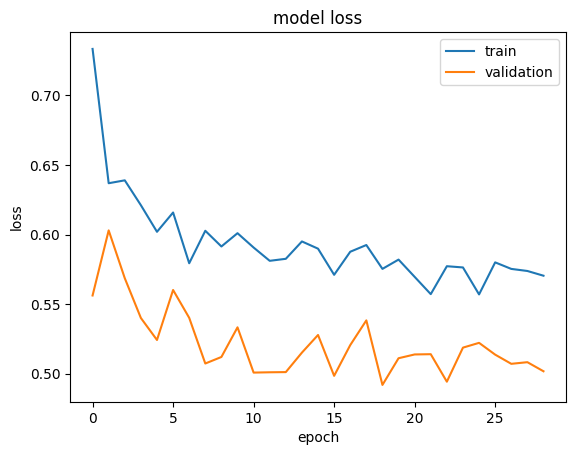

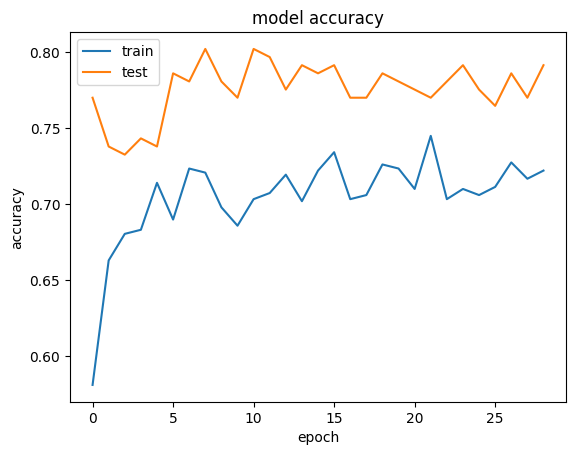

In [ ]:
_, score = model.evaluate(X_test_MissForest_upsampled, y_test_MissForest_upsampled, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confusion matrix

In [ ]:
y_pred = model.predict(X_test_MissForest_upsampled)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_MissForest_upsampled, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

6/6 [==============================] - 0s 2ms/step
Confusion Matrix:
[[68 30]
 [11 78]]


######MissForest_SMOTE

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_MissForest_SMOTE , y_train_MissForest_SMOTE,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_MissForest_SMOTE , y_test_MissForest_SMOTE),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/150
75/75 [==============================] - 3s 9ms/step - loss: 0.5980 - accuracy: 0.6966 - val_loss: 0.5413 - val_accuracy: 0.7219
Epoch 2/150
75/75 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7060 - val_loss: 0.5187 - val_accuracy: 0.7701
Epoch 3/150
75/75 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.7141 - val_loss: 0.5331 - val_accuracy: 0.7594
Epoch 4/150
75/75 [==============================] - 0s 6ms/step - loss: 0.5805 - accuracy: 0.7235 - val_loss: 0.5886 - val_accuracy: 0.7005
Epoch 5/150
75/75 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7208 - val_loss: 0.5417 - val_accuracy: 0.7166
Epoch 6/150
75/75 [==============================] - 0s 5ms/step - loss: 0.5584 - accuracy: 0.7195 - val_loss: 0.5490 - val_accuracy: 0.7219
Epoch 7/150
75/75 [==============================] - 0s 5ms/step - loss: 0.5873 - accuracy: 0.7047 - val_loss: 0.5342 - val_accuracy: 0.7273
Epoch 8/150
7

Evaluation

Accuracy:  0.7540106773376465


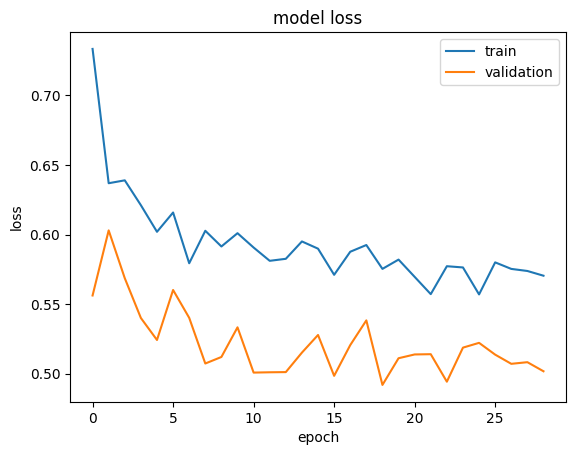

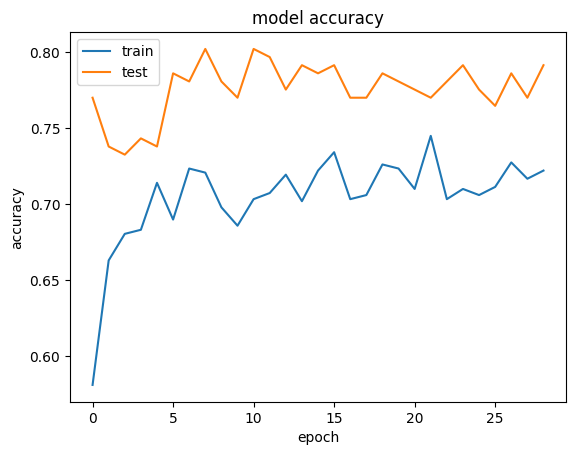

In [ ]:
_, score = model.evaluate(X_test_MissForest_SMOTE, y_test_MissForest_SMOTE, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confusion matrix

In [ ]:
y_pred = model.predict(X_test_MissForest_SMOTE)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_MissForest_SMOTE, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

6/6 [==============================] - 0s 2ms/step
Confusion Matrix:
[[63 38]
 [11 75]]


######MissForest_downsampled

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_MissForest_downsampled , y_train_MissForest_downsampled,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_MissForest_downsampled , y_test_MissForest_downsampled ),
    verbose=1,
    callbacks=[early_stopping]
)

Evaluation

In [ ]:
_, score = model.evaluate(X_test_MissForest_downsampled, y_test_MissForest_downsampled , verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confussion matrix

In [ ]:
y_pred = model.predict(X_test_MissForest_downsampled)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_MissForest_downsampled, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

######KNN_upsampled

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_knn_upsampled , y_train_knn_upsampled,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_knn_upsampled, y_test_knn_upsampled),
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)

Evaluation

In [ ]:
_, score = model.evaluate(X_test_knn_upsampled, y_test_knn_upsampled, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

cinfussion matrix

In [ ]:
y_pred = model.predict(X_test_knn_upsampled)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_knn_upsampled, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

######KNN_SMOTE

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_knn_SMOTE , y_train_knn_SMOTE,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_knn_SMOTE , y_test_knn_SMOTE),
    verbose=1,
    callbacks=[early_stopping]
)

Evaluation

In [ ]:
_, score = model.evaluate(X_test_knn_SMOTE , y_test_knn_SMOTE , verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confussion matrix

In [ ]:
y_pred = model.predict(X_test_knn_SMOTE)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_knn_SMOTE, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

######KNN_downsampled

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_knn_downsampled , y_train_knn_downsampled,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_knn_downsampled , y_test_knn_downsampled),
    verbose=1,
    callbacks=[early_stopping]
)

Evaluation

In [ ]:
_, score = model.evaluate(X_test_knn_downsampled,y_test_knn_downsampled, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confussion matrix

In [ ]:
y_pred = model.predict(X_test_knn_downsampled)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_knn_downsampled, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

######ITER_upsampled

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_iter_upsampled , y_train_iter_upsampled,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_iter_upsampled , y_test_iter_upsampled),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/150
75/75 [==============================] - 1s 17ms/step - loss: 0.5917 - accuracy: 0.7141 - val_loss: 0.5589 - val_accuracy: 0.7487
Epoch 2/150
75/75 [==============================] - 1s 13ms/step - loss: 0.5924 - accuracy: 0.7168 - val_loss: 0.5021 - val_accuracy: 0.8021
Epoch 3/150
75/75 [==============================] - 1s 13ms/step - loss: 0.5839 - accuracy: 0.7195 - val_loss: 0.5065 - val_accuracy: 0.7754
Epoch 4/150
75/75 [==============================] - 0s 6ms/step - loss: 0.5698 - accuracy: 0.7275 - val_loss: 0.5012 - val_accuracy: 0.7861
Epoch 5/150
75/75 [==============================] - 1s 7ms/step - loss: 0.5939 - accuracy: 0.6993 - val_loss: 0.5124 - val_accuracy: 0.7807
Epoch 6/150
75/75 [==============================] - 0s 6ms/step - loss: 0.5721 - accuracy: 0.7074 - val_loss: 0.5155 - val_accuracy: 0.7754
Epoch 7/150
75/75 [==============================] - 1s 7ms/step - loss: 0.6057 - accuracy: 0.6846 - val_loss: 0.4982 - val_accuracy: 0.7754
Epoch 8/15

Evaluation

Accuracy:  0.7807486653327942


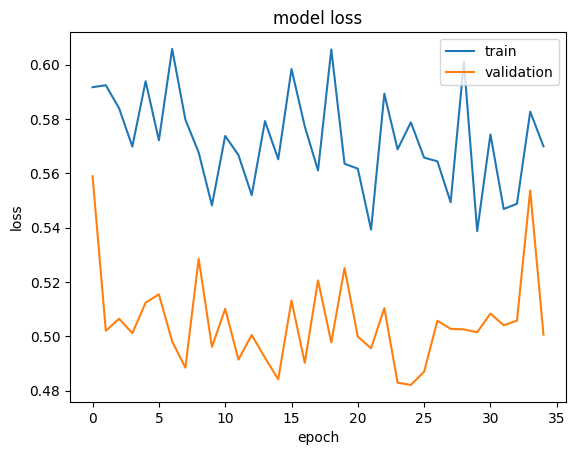

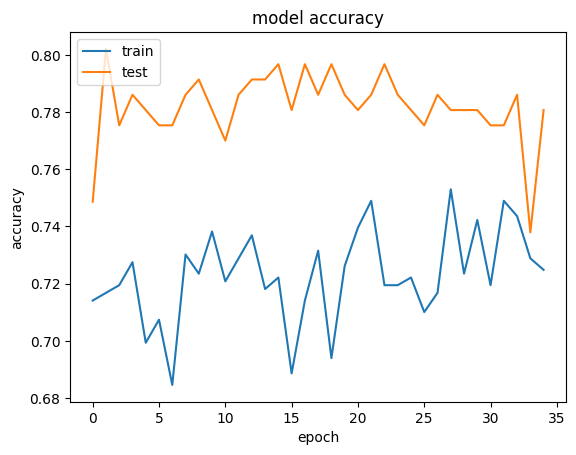

In [ ]:
_, score = model.evaluate(X_test_iter_upsampled, y_test_iter_upsampled, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confussion matrix

In [ ]:
y_pred = model.predict(X_test_iter_upsampled)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_iter_upsampled, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

6/6 [==============================] - 0s 4ms/step
Confusion Matrix:
[[68 30]
 [11 78]]


######ITER_SMOTE

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_iter_SMOTE , y_train_iter_SMOTE,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_iter_SMOTE , y_test_iter_SMOTE),
    verbose=1,
    callbacks=[early_stopping]
)

Evaluation

In [ ]:
_, score = model.evaluate(X_test_iter_SMOTE, y_test_iter_SMOTE, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confusion matrix

In [ ]:
y_pred = model.predict(X_test_iter_upsampled)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_iter_upsampled, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

6/6 [==============================] - 0s 3ms/step
Confusion Matrix:
[[68 30]
 [11 78]]


######ITER_downsampled

In [ ]:
# fit the keras model on the dataset
hist = model.fit(
    X_train_iter_downsampled , y_train_iter_downsampled,
    epochs=150,
    batch_size=10,
    validation_data=(X_test_iter_downsampled , y_test_iter_downsampled),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/150
38/38 [==============================] - 0s 4ms/step - loss: 0.5919 - accuracy: 0.7035 - val_loss: 0.5222 - val_accuracy: 0.7527
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7143 - val_loss: 0.5103 - val_accuracy: 0.7634
Epoch 3/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.6927 - val_loss: 0.5031 - val_accuracy: 0.7634
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7170 - val_loss: 0.5274 - val_accuracy: 0.7527
Epoch 5/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7305 - val_loss: 0.5273 - val_accuracy: 0.7527
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7251 - val_loss: 0.5100 - val_accuracy: 0.7527
Epoch 7/150
38/38 [==============================] - 0s 5ms/step - loss: 0.5428 - accuracy: 0.7385 - val_loss: 0.5209 - val_accuracy: 0.7527
Epoch 8/150
3

Evaluation

Accuracy:  0.7634408473968506


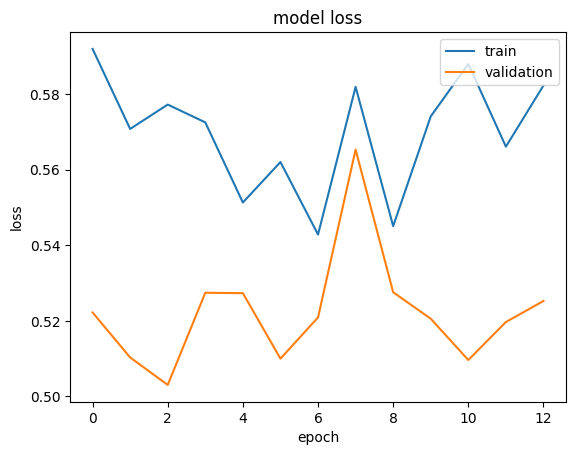

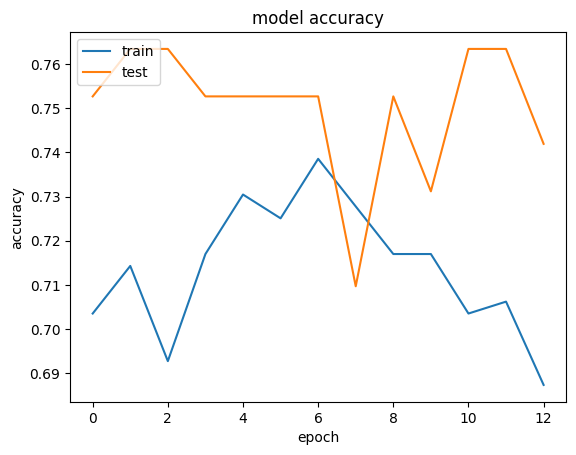

In [ ]:
_, score = model.evaluate(X_test_iter_downsampled, y_test_iter_downsampled, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

confussion matrix

In [ ]:
y_pred = model.predict(X_test_iter_downsampled)
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test_iter_downsampled, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

3/3 [==============================] - 0s 5ms/step
Confusion Matrix:
[[30 17]
 [ 5 41]]
